In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
os.chdir('..')

import warnings
warnings.filterwarnings('ignore', '', UserWarning)

import torch
import torchvision

torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [2]:
dataset_params = {
    'dataset': 'dsprites',
    'batch_size': 32,
    'cuda': True,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading dsprites dataset...
Done!



In [48]:
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-4,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

from src.models.conv_vsc import ConvolutionalVariationalSparseCoding
convvsc = ConvolutionalVariationalSparseCoding(**model_params)

In [31]:
width, height, channels

(64, 64, 1)

In [20]:
len(train_loader)

18750

In [47]:
images[0].shape

torch.Size([1, 64, 64])

In [32]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 2,
    'report_interval': 2,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4211.089355
Train Epoch: 1 [160000/600000 (27%)]	Loss: 199.580811
Train Epoch: 1 [320000/600000 (53%)]	Loss: 60.877342
Train Epoch: 1 [480000/600000 (80%)]	Loss: 33.127655
====> Epoch: 1 Average loss: 121.1381
====> Test set loss: 12.0634 - VLB-VSC : 386.0289
Train Epoch: 2 [0/600000 (0%)]	Loss: 12.206225
Train Epoch: 2 [160000/600000 (27%)]	Loss: 5.220592
Train Epoch: 2 [320000/600000 (53%)]	Loss: 4.670348
Train Epoch: 2 [480000/600000 (80%)]	Loss: 4.796397
====> Epoch: 2 Average loss: 6.7604
====> Test set loss: 5.0519 - VLB-VSC : 161.6610
CPU times: user 6min 39s, sys: 32 s, total: 7min 11s
Wall time: 6min 6s


In [49]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-4,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4944.705078
Train Epoch: 1 [160000/600000 (27%)]	Loss: 144.631393
Train Epoch: 1 [320000/600000 (53%)]	Loss: 33.579712
Train Epoch: 1 [480000/600000 (80%)]	Loss: 32.941223
====> Epoch: 1 Average loss: 85.9283
====> Test set loss: 33.6818 - VLB-ConvVSC : 1077.8170
Train Epoch: 2 [0/600000 (0%)]	Loss: 33.298946
Train Epoch: 2 [160000/600000 (27%)]	Loss: 33.830929
Train Epoch: 2 [320000/600000 (53%)]	Loss: 33.470573
Train Epoch: 2 [480000/600000 (80%)]	Loss: 33.940788
====> Epoch: 2 Average loss: 33.6843
====> Test set loss: 33.6740 - VLB-ConvVSC : 1077.5681
CPU times: user 4min 54s, sys: 20.4 s, total: 5min 14s
Wall time: 4min 38s


In [52]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-1,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 2961.439209
Train Epoch: 1 [160000/600000 (27%)]	Loss: 112.361862
Train Epoch: 1 [320000/600000 (53%)]	Loss: 63.511871
Train Epoch: 1 [480000/600000 (80%)]	Loss: 36.808315
====> Epoch: 1 Average loss: 66.1559
====> Test set loss: 35.9991 - VLB-ConvVSC : 1151.9717
Train Epoch: 2 [0/600000 (0%)]	Loss: 36.827927
Train Epoch: 2 [160000/600000 (27%)]	Loss: 36.170170
Train Epoch: 2 [320000/600000 (53%)]	Loss: 35.623882
Train Epoch: 2 [480000/600000 (80%)]	Loss: 36.258492
====> Epoch: 2 Average loss: 35.9899
====> Test set loss: 35.9733 - VLB-ConvVSC : 1151.1455
CPU times: user 5min 6s, sys: 20.5 s, total: 5min 26s
Wall time: 4min 49s


In [ ]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-4,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

In [53]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-5,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5429.226562
Train Epoch: 1 [160000/600000 (27%)]	Loss: 374.972412
Train Epoch: 1 [320000/600000 (53%)]	Loss: 109.276566
Train Epoch: 1 [480000/600000 (80%)]	Loss: 75.331497
====> Epoch: 1 Average loss: 216.4288
====> Test set loss: 75.1211 - VLB-ConvVSC : 2403.8763
Train Epoch: 2 [0/600000 (0%)]	Loss: 75.622459
Train Epoch: 2 [160000/600000 (27%)]	Loss: 28.097084
Train Epoch: 2 [320000/600000 (53%)]	Loss: 16.709173
Train Epoch: 2 [480000/600000 (80%)]	Loss: 16.763636
====> Epoch: 2 Average loss: 29.5167
====> Test set loss: 16.3863 - VLB-ConvVSC : 524.3609
CPU times: user 5min 3s, sys: 20.5 s, total: 5min 23s
Wall time: 4min 45s


In [64]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-6,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5197.377930
Train Epoch: 1 [160000/600000 (27%)]	Loss: 274.038574
Train Epoch: 1 [320000/600000 (53%)]	Loss: 144.474487
Train Epoch: 1 [480000/600000 (80%)]	Loss: 74.750526
====> Epoch: 1 Average loss: 212.3811
====> Test set loss: 75.1194 - VLB-ConvVSC : 2403.8215
Train Epoch: 2 [0/600000 (0%)]	Loss: 74.893814
Train Epoch: 2 [160000/600000 (27%)]	Loss: 47.784168
Train Epoch: 2 [320000/600000 (53%)]	Loss: 47.767960
Train Epoch: 2 [480000/600000 (80%)]	Loss: 5.263370
====> Epoch: 2 Average loss: 37.9965
====> Test set loss: 4.9491 - VLB-ConvVSC : 158.3708
CPU times: user 5min 4s, sys: 18 s, total: 5min 22s
Wall time: 4min 45s


In [66]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 1,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4.301465
Train Epoch: 1 [160000/600000 (27%)]	Loss: 4.889323
Train Epoch: 1 [320000/600000 (53%)]	Loss: 4.595411
Train Epoch: 1 [480000/600000 (80%)]	Loss: 4.676974
====> Epoch: 1 Average loss: 4.8906
====> Test set loss: 4.8442 - VLB-ConvVSC : 155.0158
CPU times: user 2min 43s, sys: 9.04 s, total: 2min 52s
Wall time: 2min 33s


In [69]:
torch.save(convvsc.model.state_dict(), 
           'dsprites_model_3e.pth')

In [70]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 1,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4.006836
Train Epoch: 1 [160000/600000 (27%)]	Loss: 5.061543
Train Epoch: 1 [320000/600000 (53%)]	Loss: 5.582115
Train Epoch: 1 [480000/600000 (80%)]	Loss: 4.888348
====> Epoch: 1 Average loss: 4.8390
====> Test set loss: 4.8177 - VLB-ConvVSC : 154.1663
CPU times: user 2min 43s, sys: 9.22 s, total: 2min 52s
Wall time: 2min 33s


In [71]:
torch.save(convvsc.model.state_dict(), 
           'dsprites_model_4e.pth')

In [ ]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 1,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, ax, title):
    ax.imshow(np.transpose(img, (1,2,0)) * 255, interpolation='nearest')
    ax.set_title(title, fontsize=20)
    
def to_numpy(image, vsc):
    return torchvision.utils.make_grid(
        image.view(1, vsc.channels, vsc.height, vsc.width)
    ).cpu().detach().numpy()
    
def plot_encoding(image, vsc, latent_sz, alpha, width=1/7):
    image = vsc.transform(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.inverse_transform(vsc.model.decode(z))
    z = z.cpu().detach().numpy()[0]
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
    
    plot_image(to_numpy(image, vsc), ax0, 'Input Image')
    
    ax1.bar(np.arange(latent_sz), height=z, width=width, align='center')
    ax1.scatter(np.arange(latent_sz), z, color='blue')
    ax1.set_title(r"Latent Dimension %d - $\alpha$ = %.2f " % \
                  (latent_sz, alpha), fontsize=20)
    
    plot_image(to_numpy(img, vsc), ax2, 'Decoded Image')
    plt.subplots_adjust(hspace=0.5)

In [50]:
images[0].max() * 255

tensor(1.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


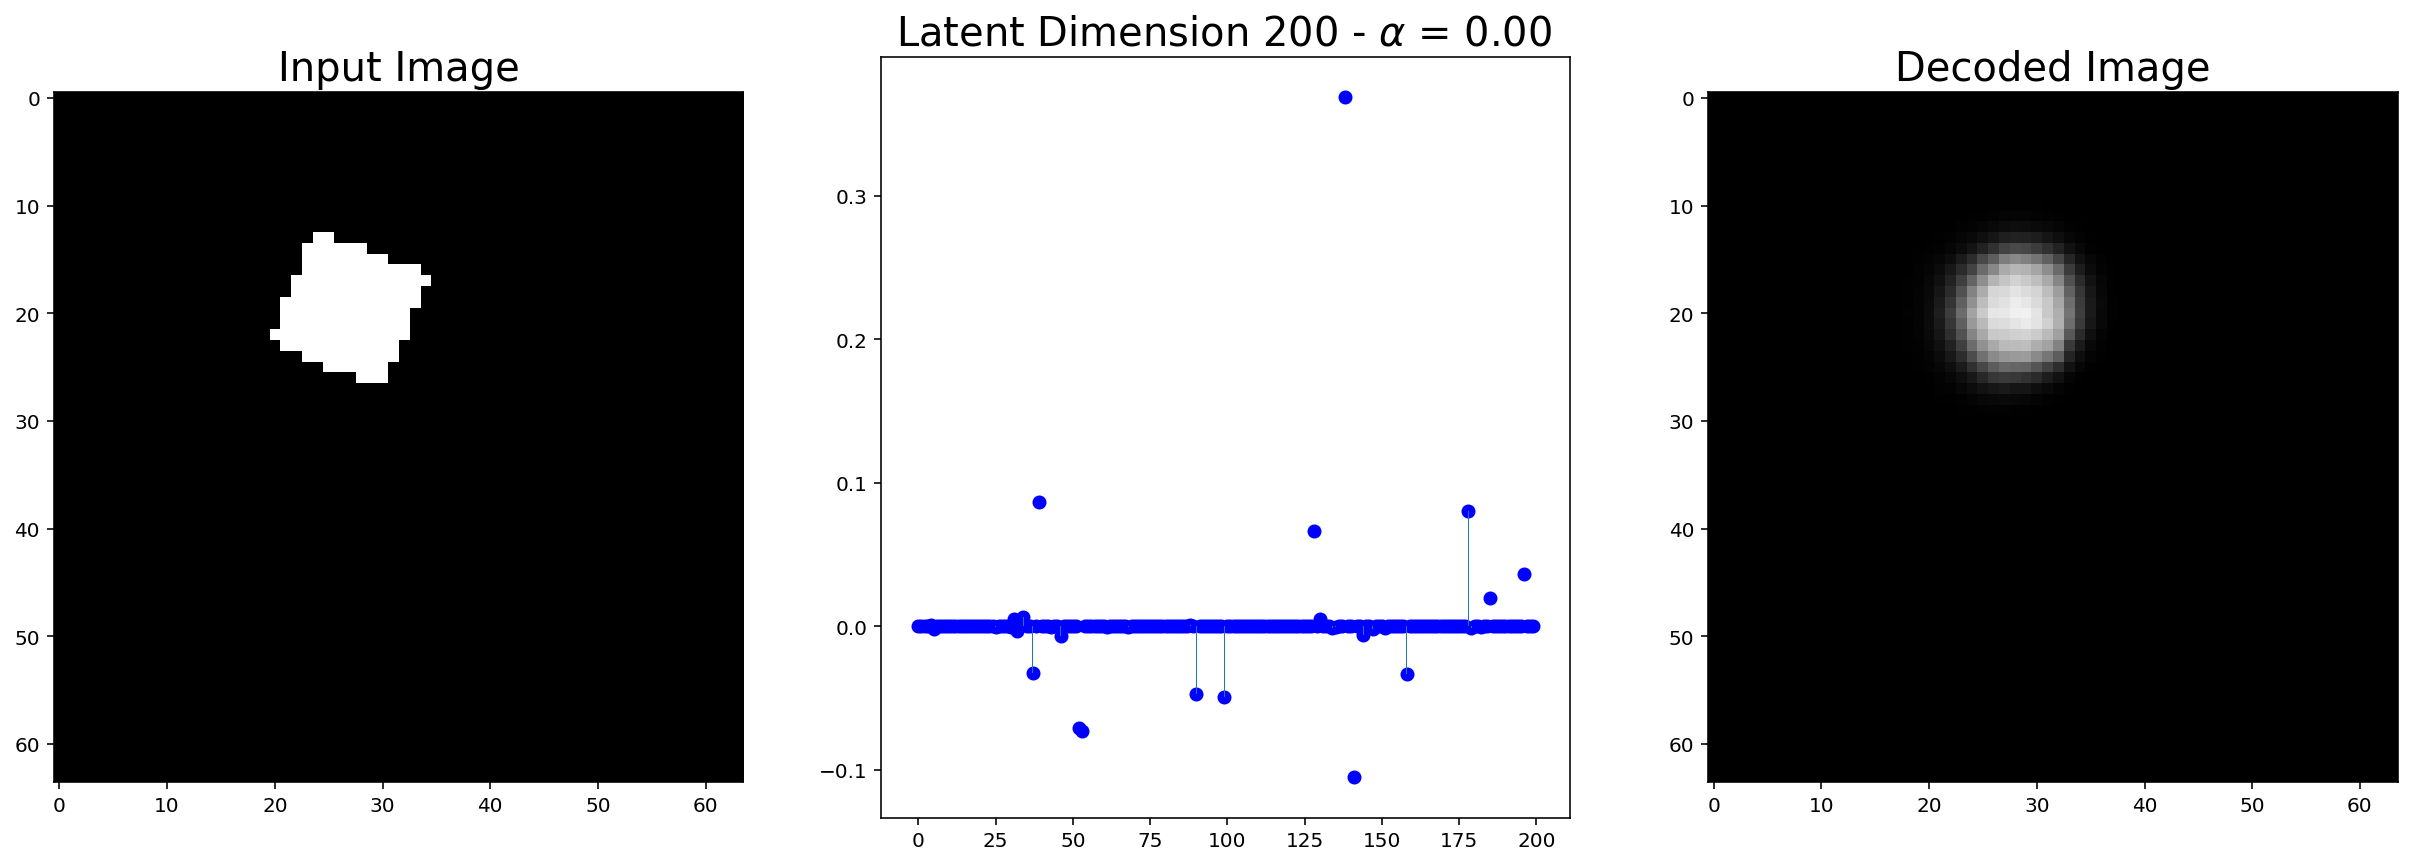

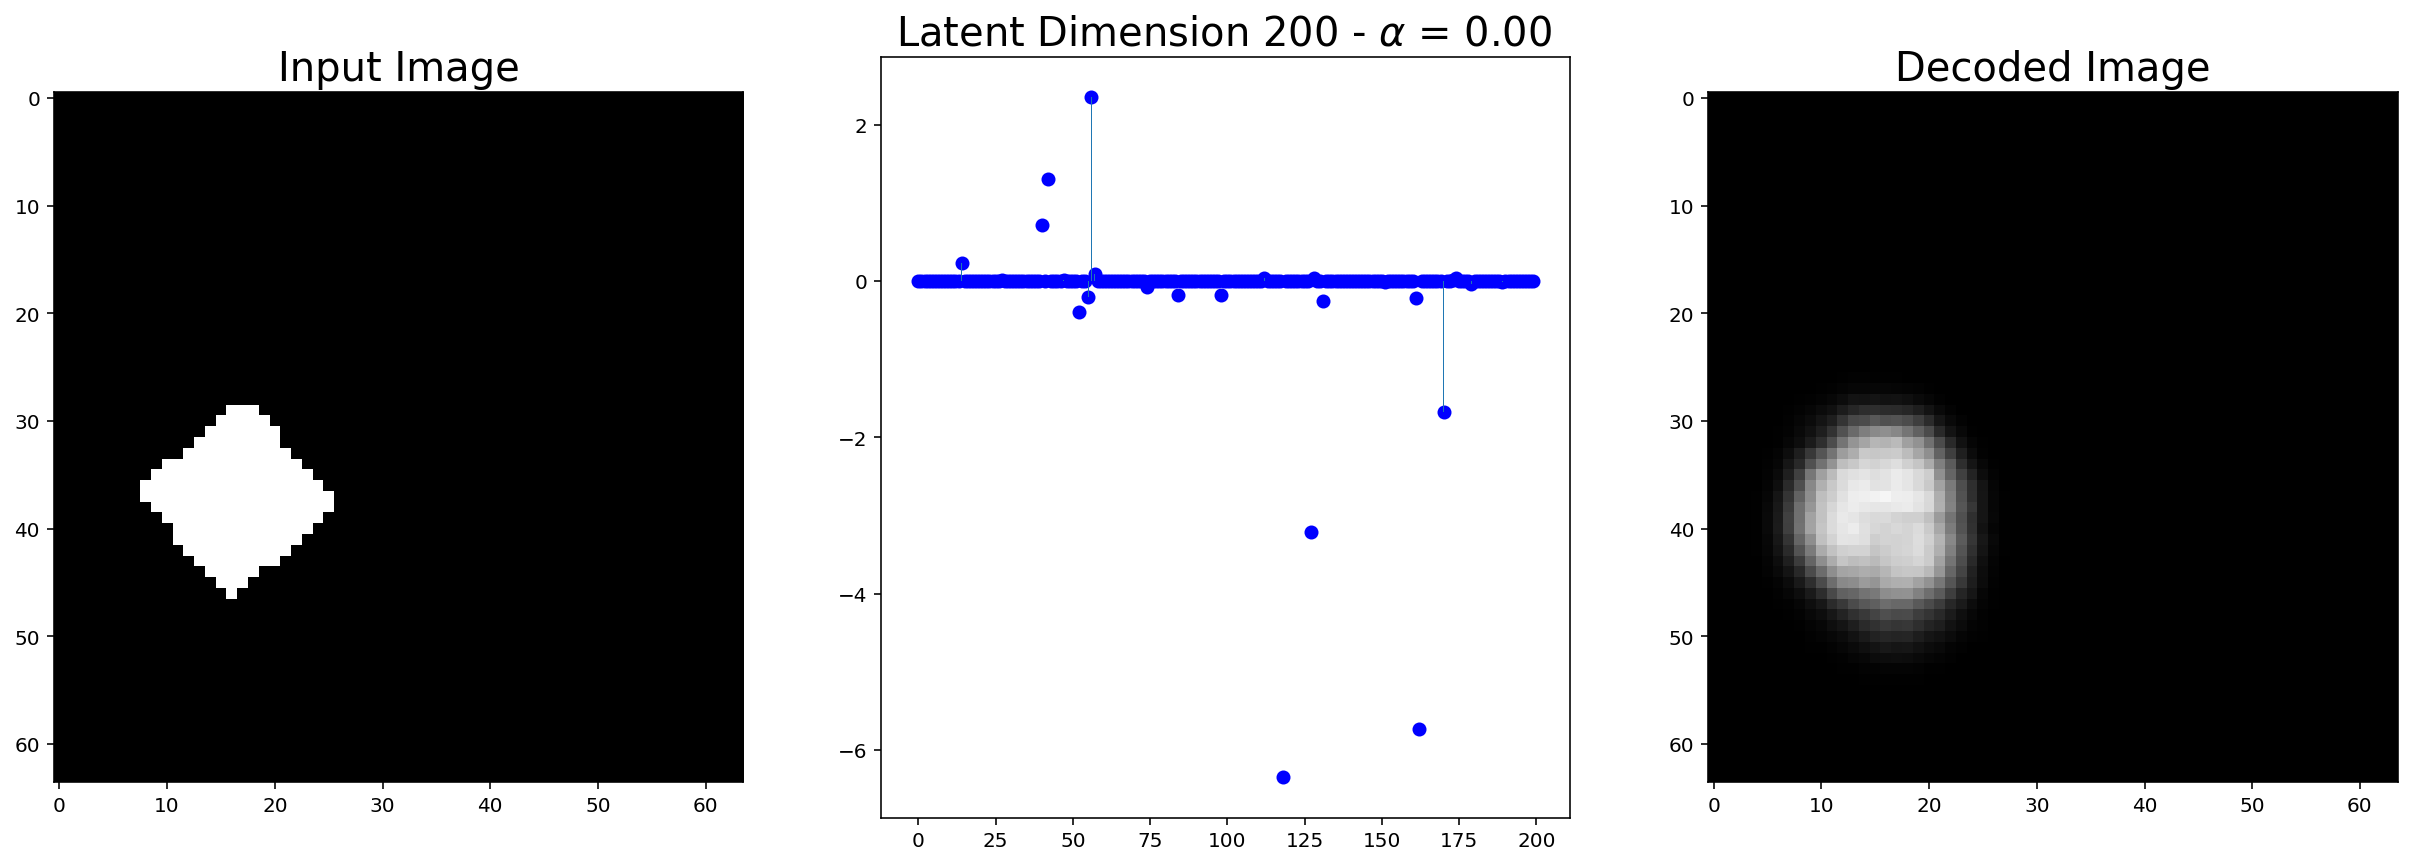

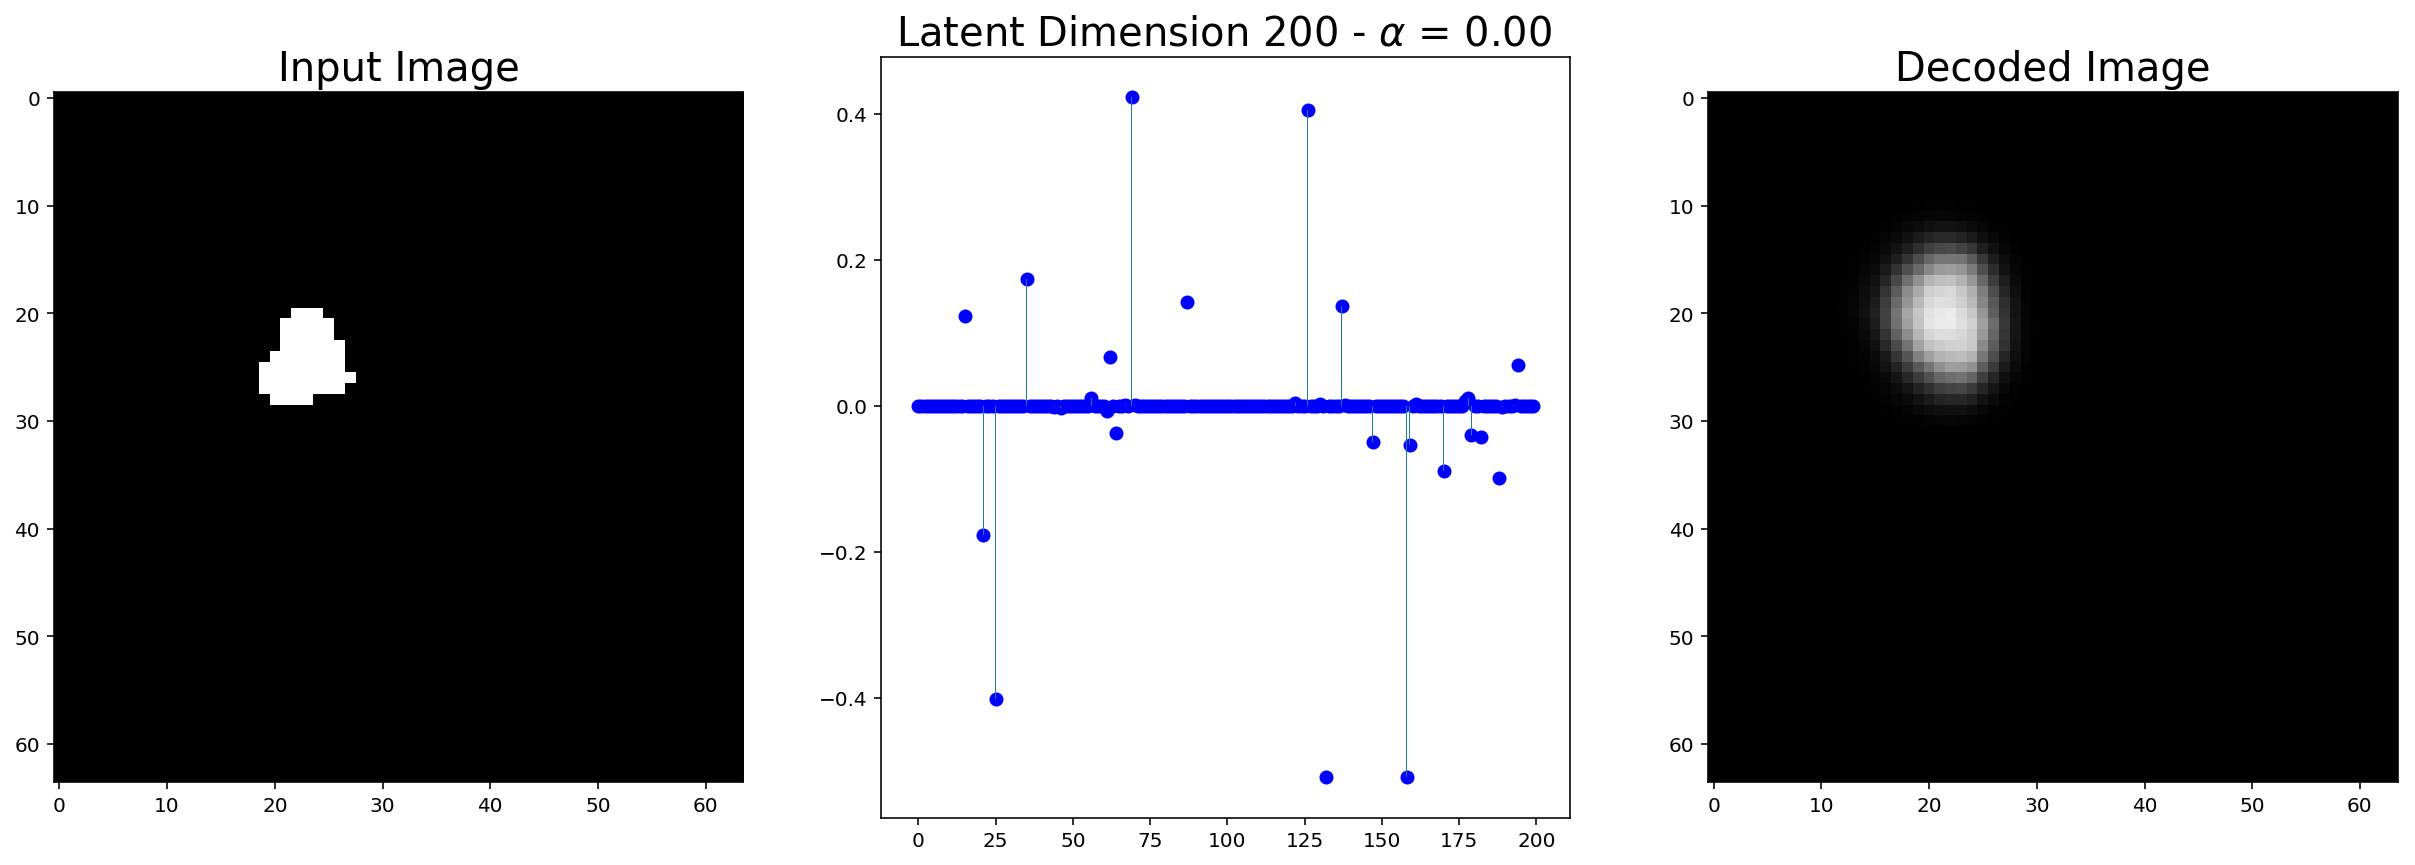

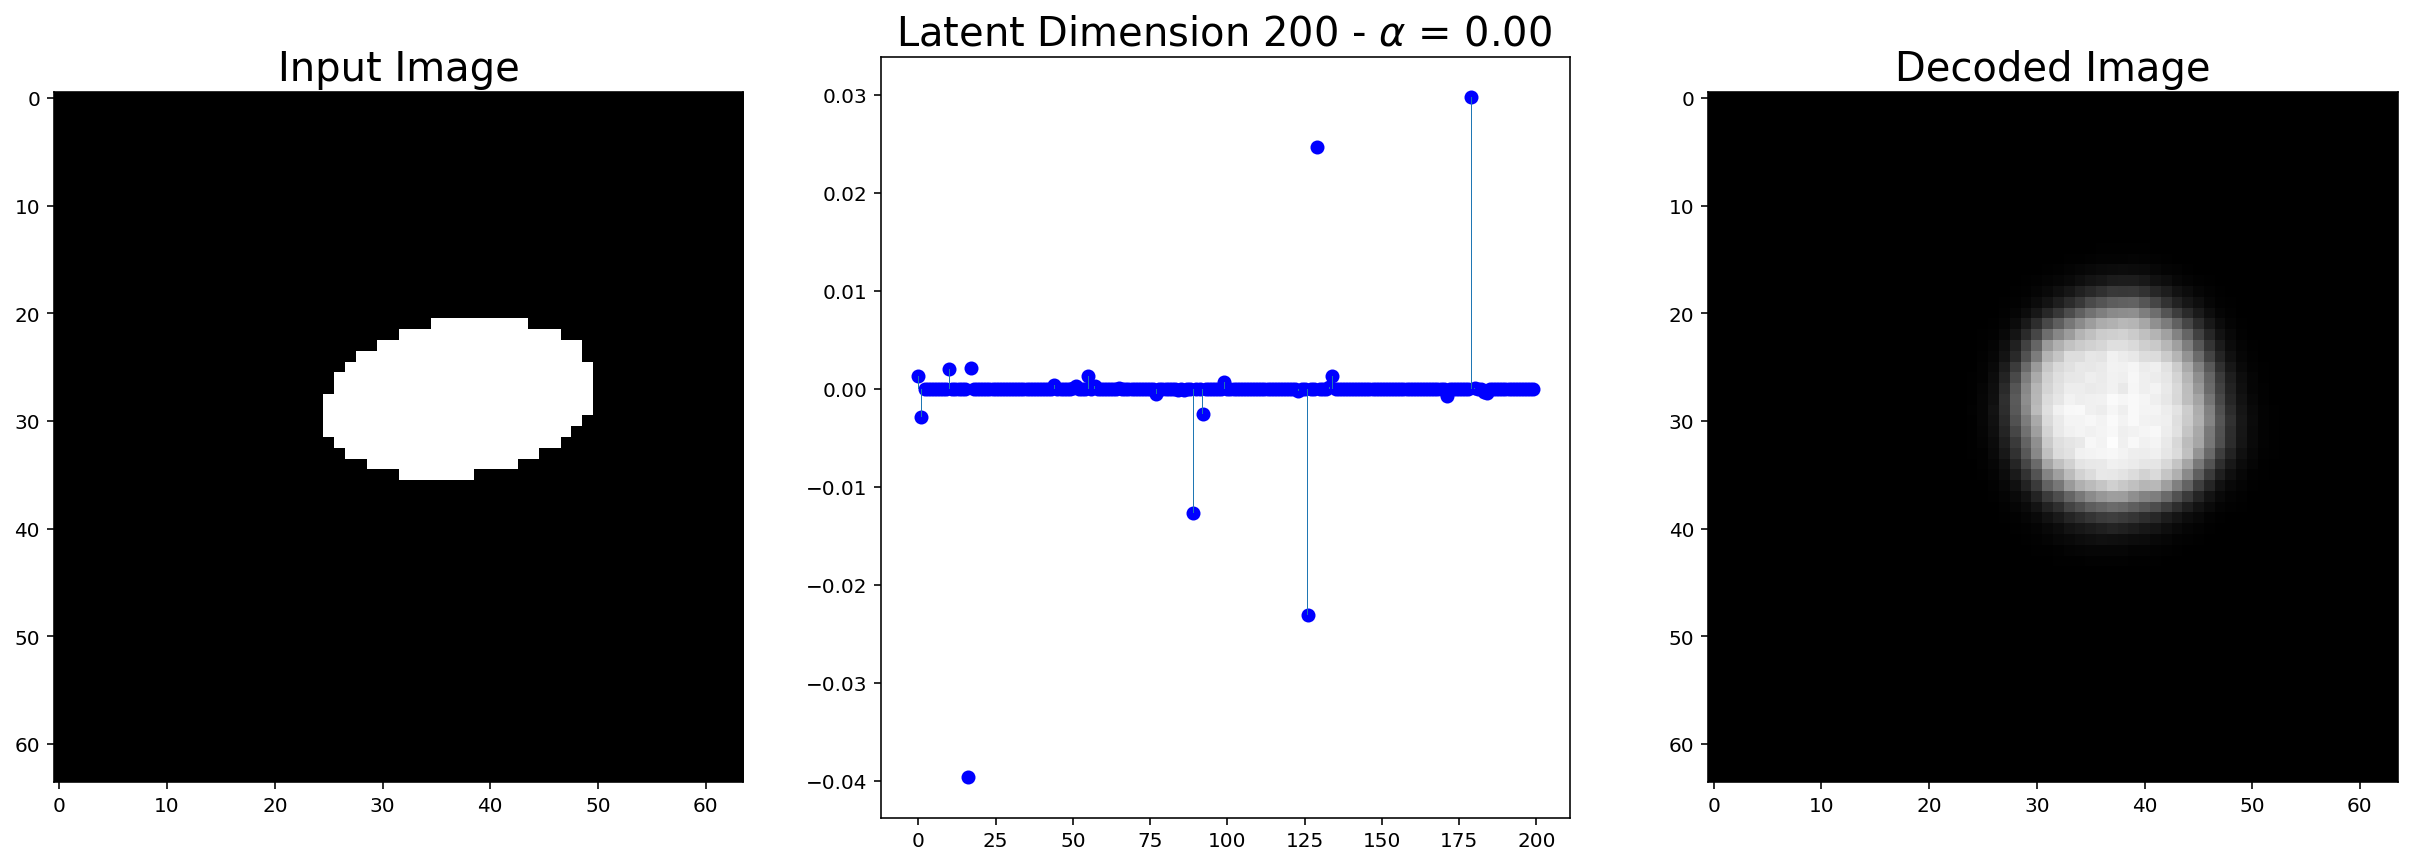

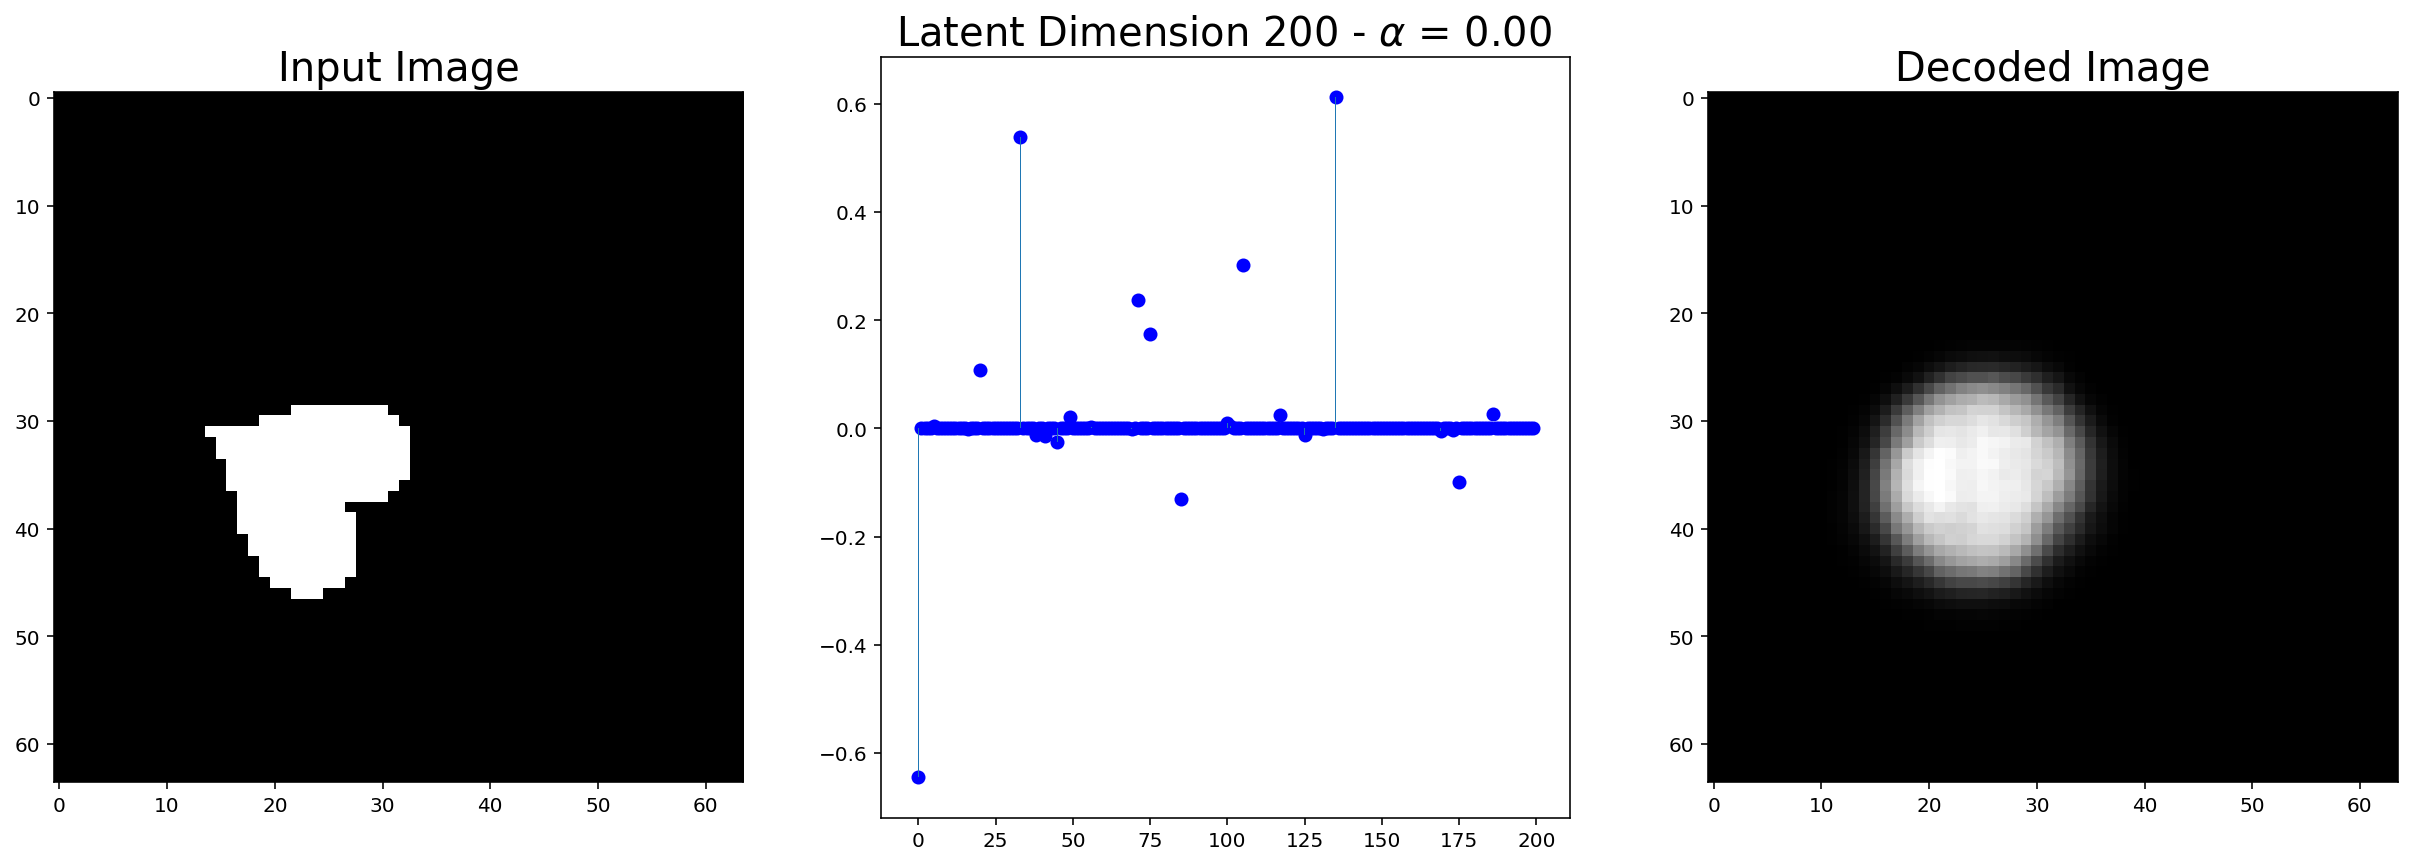

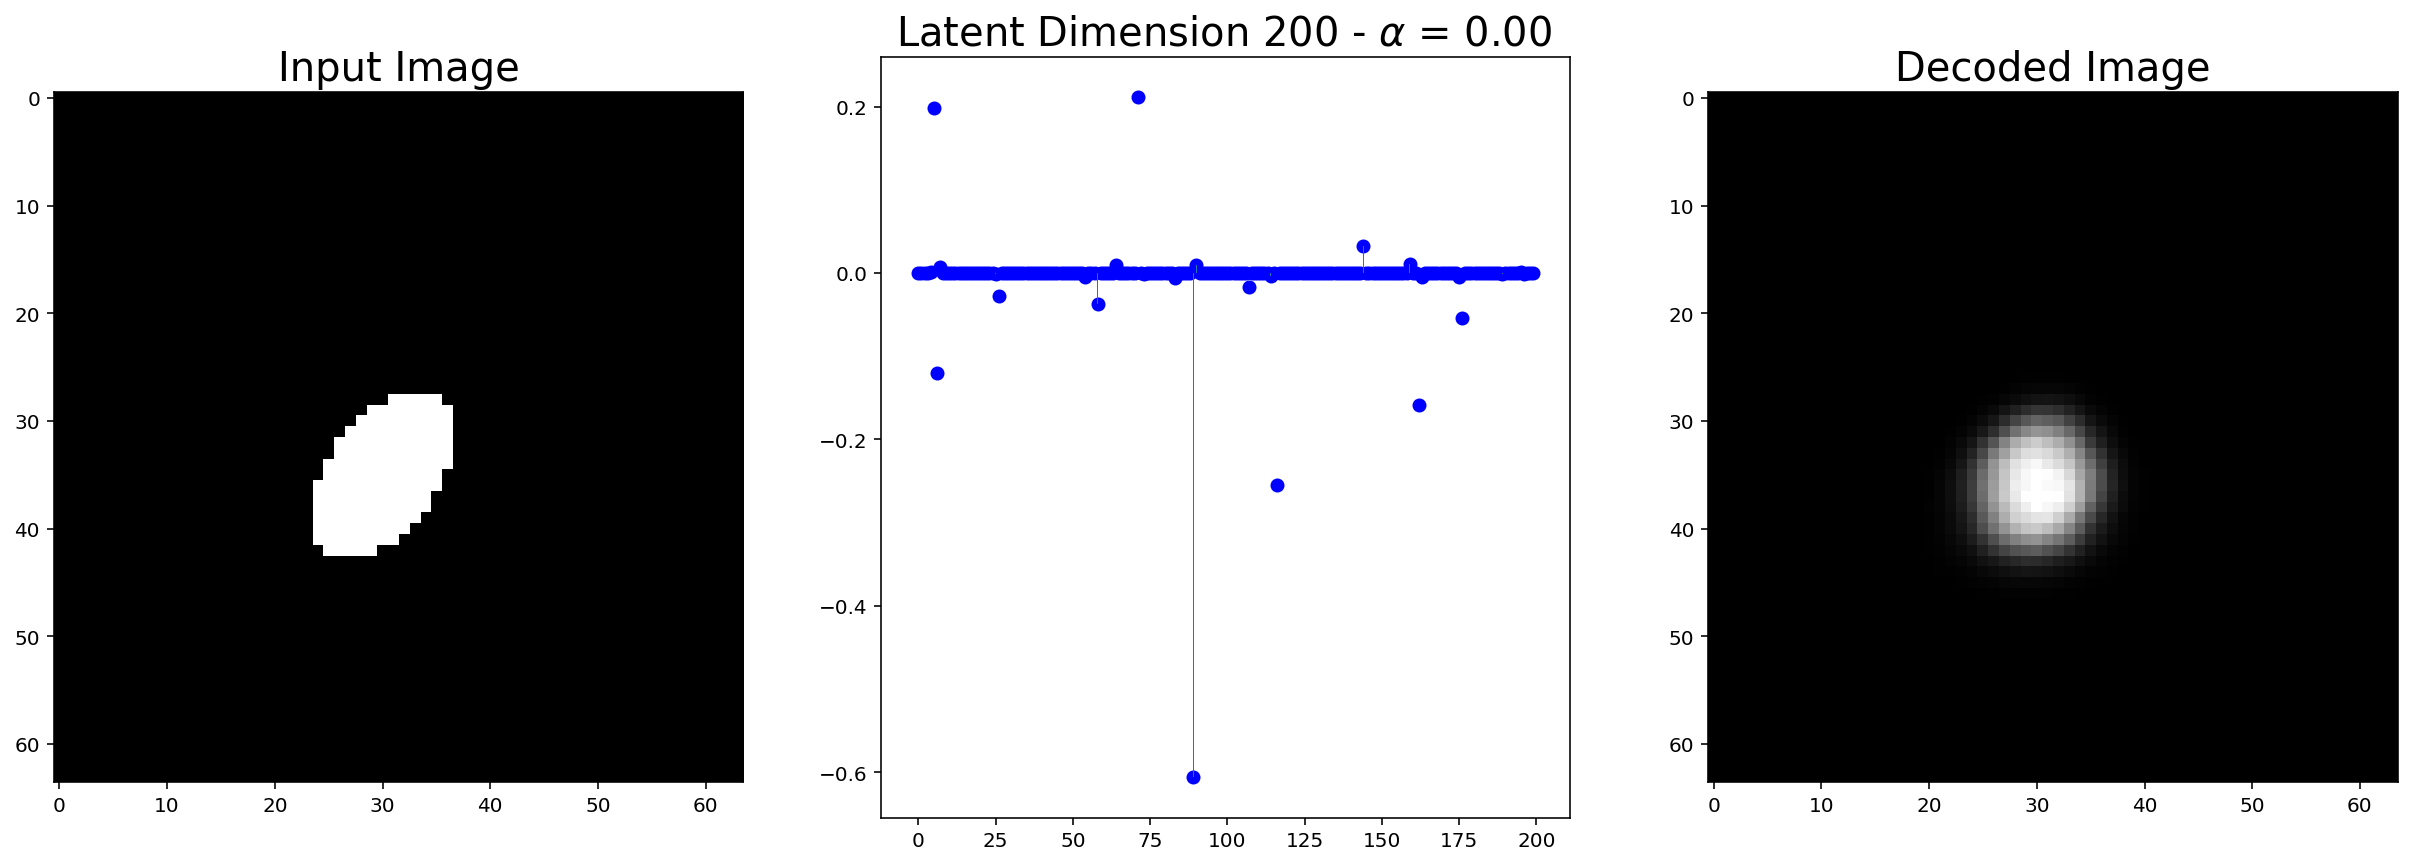

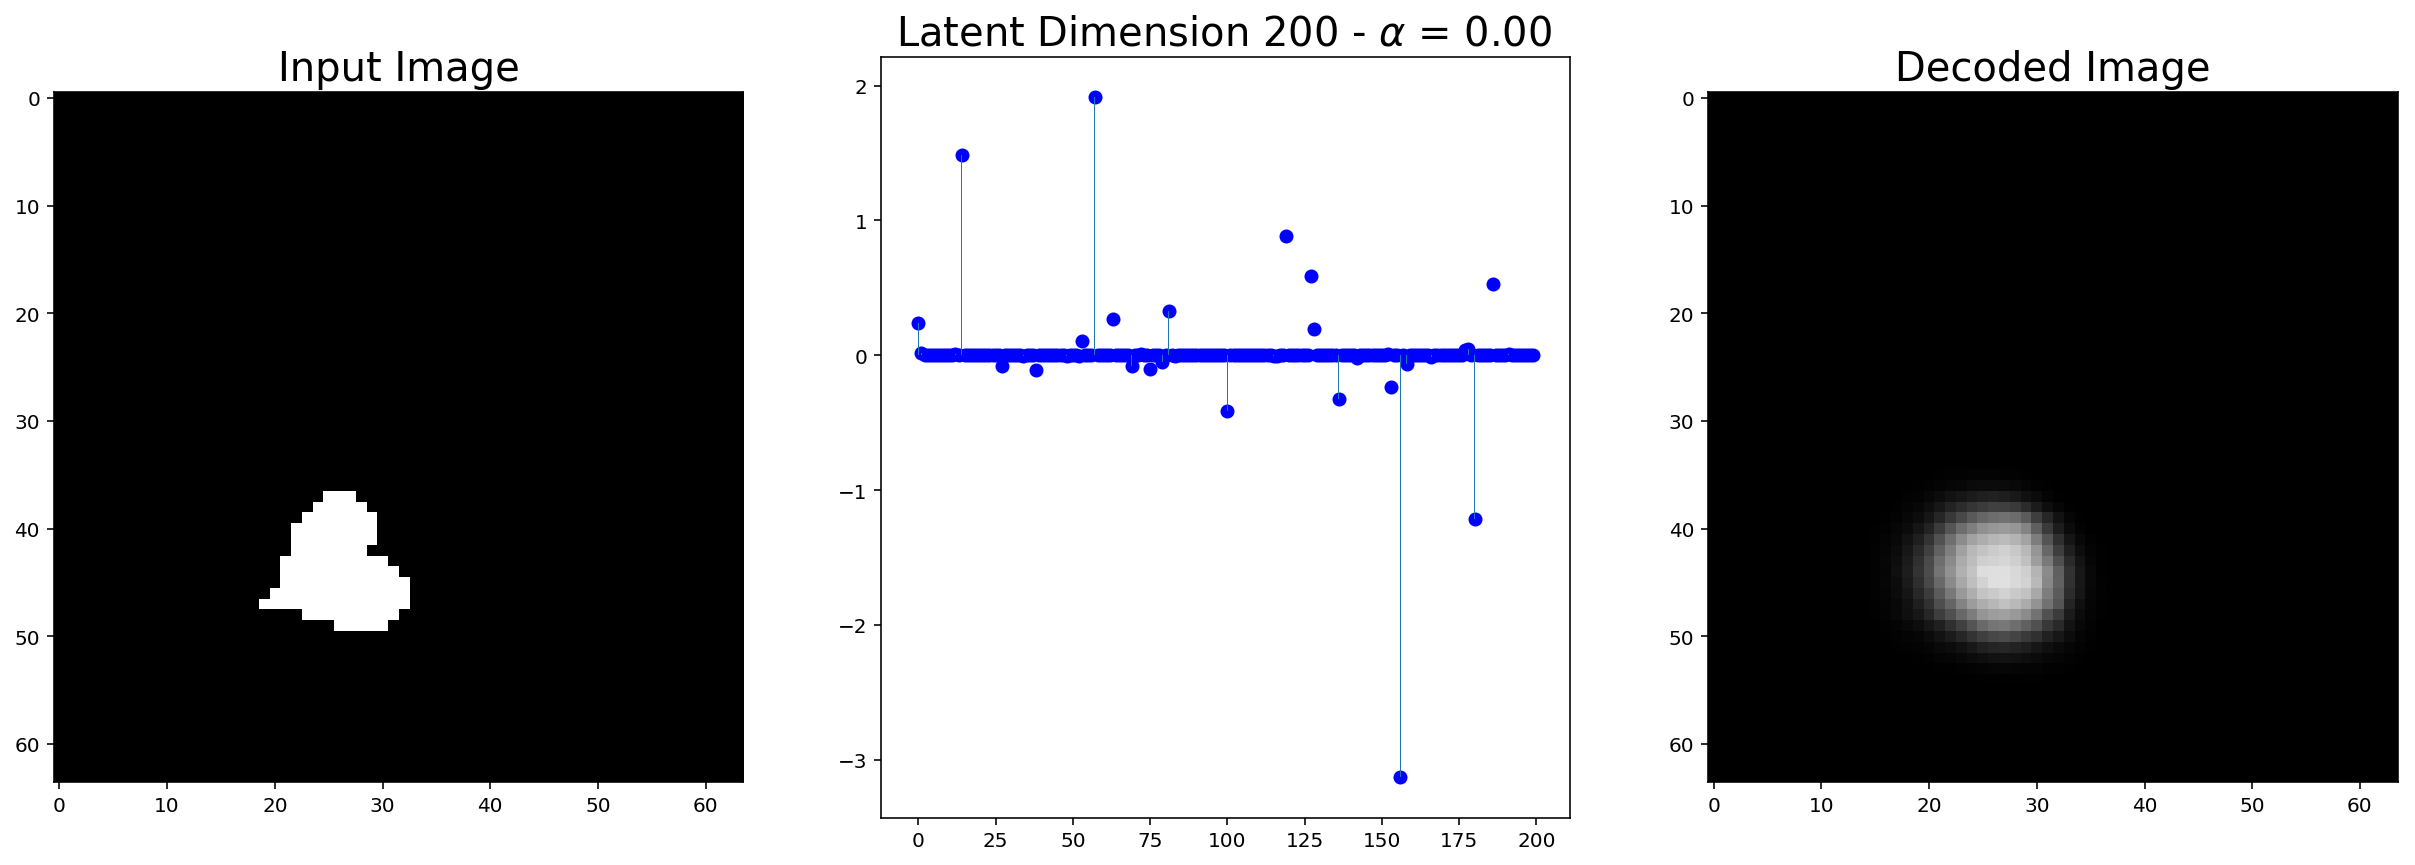

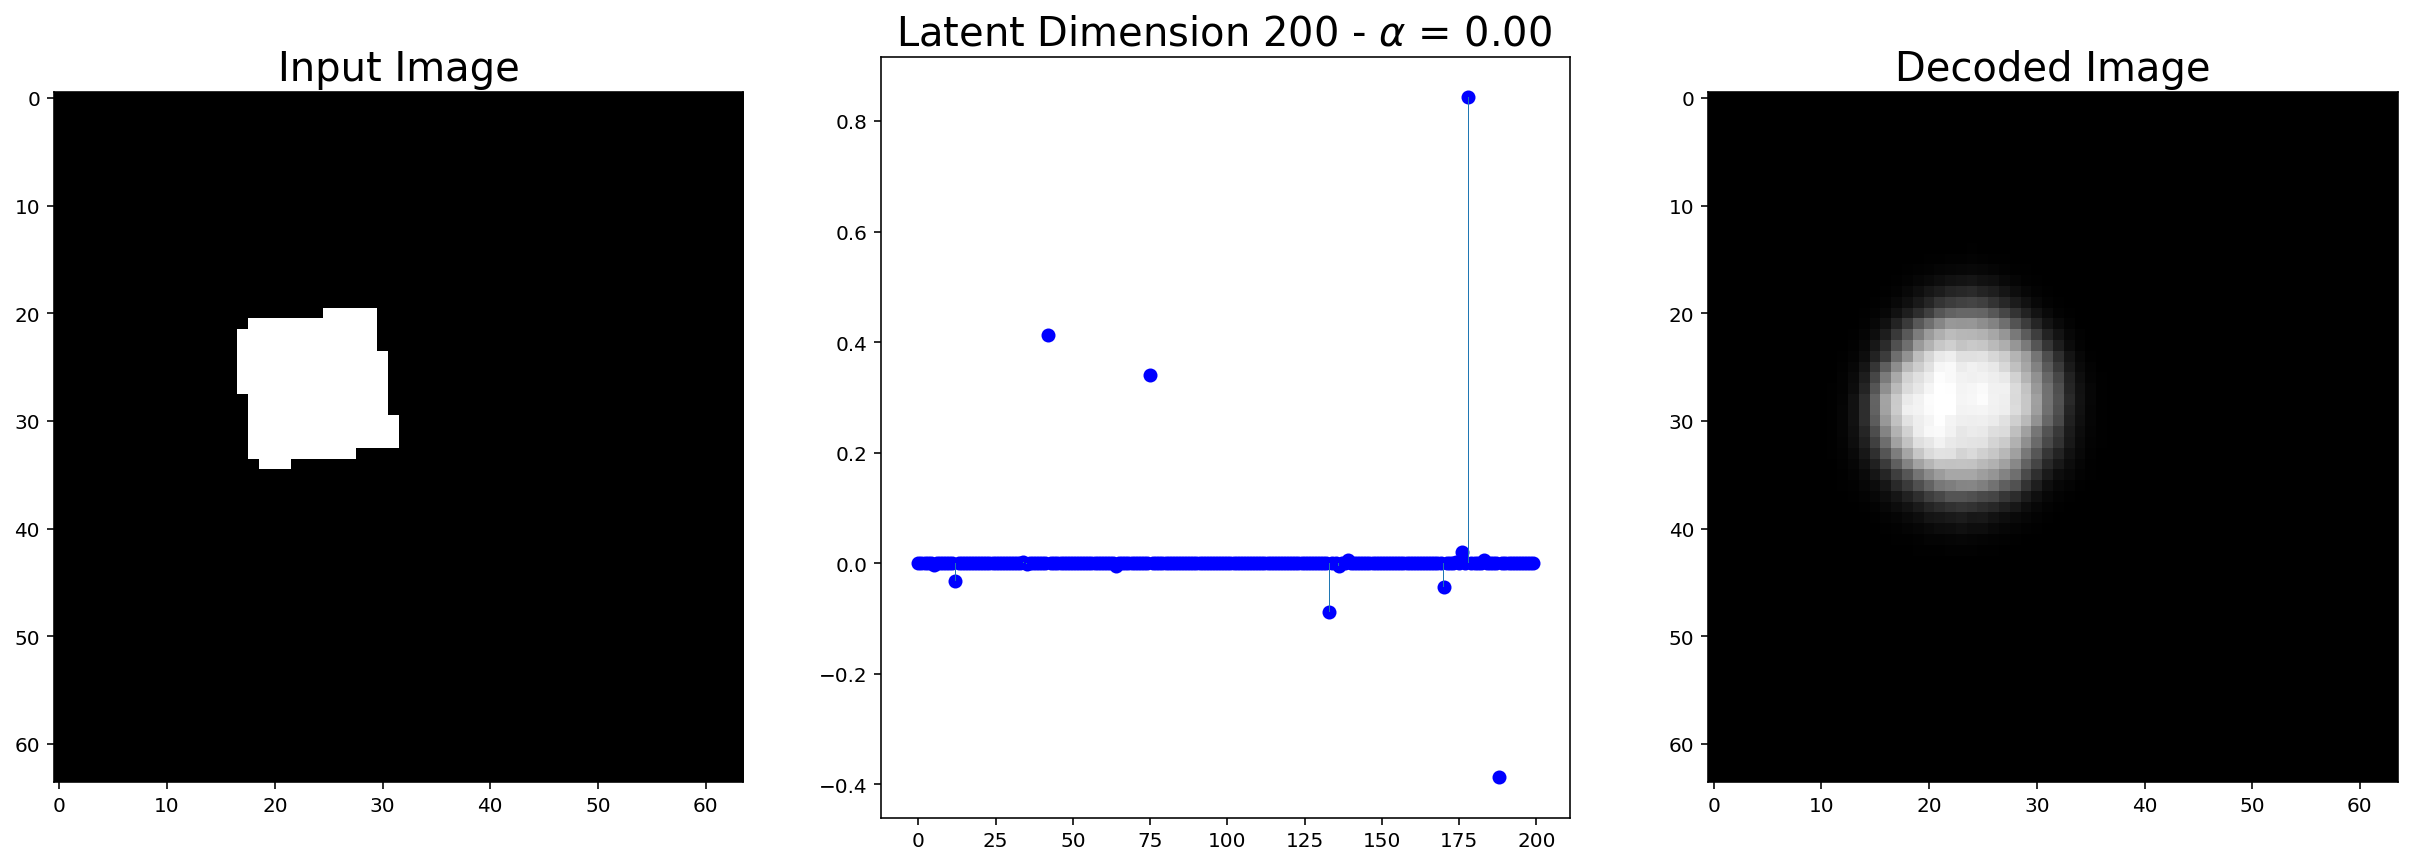

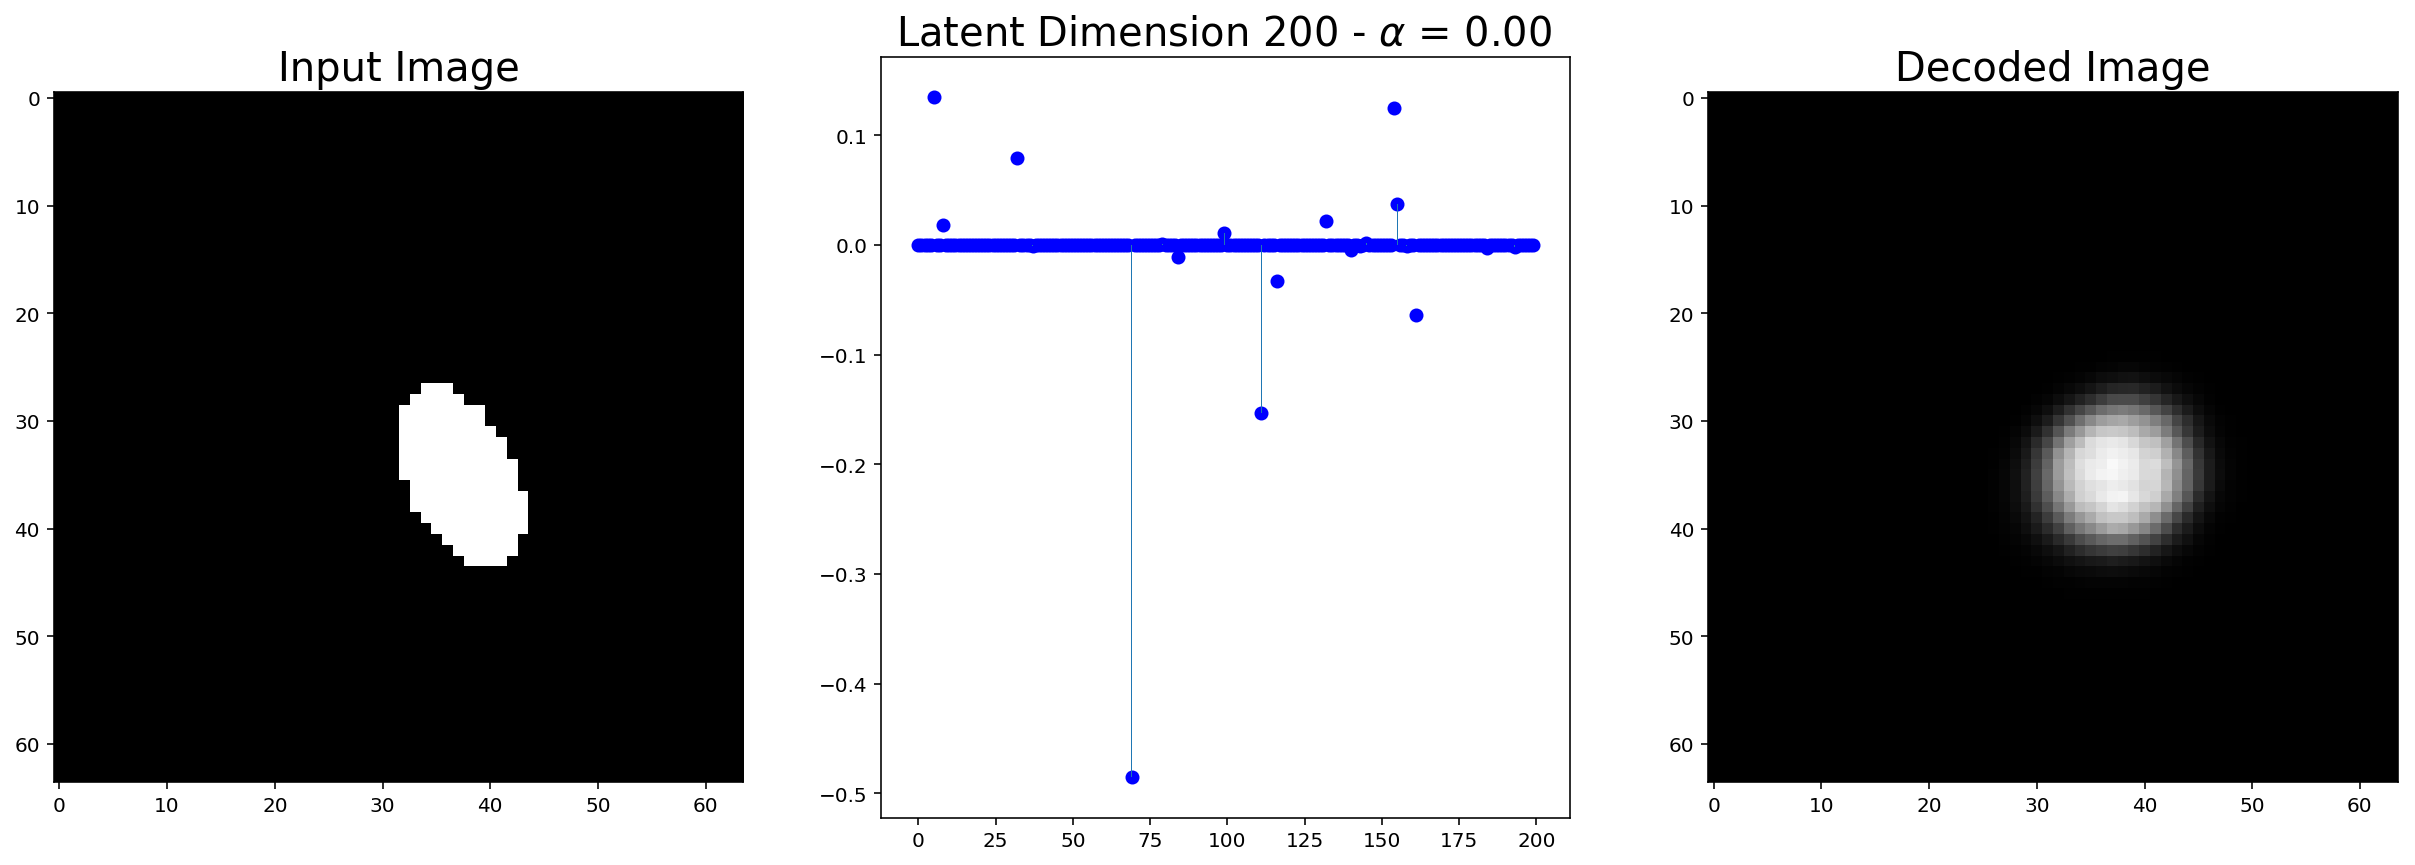

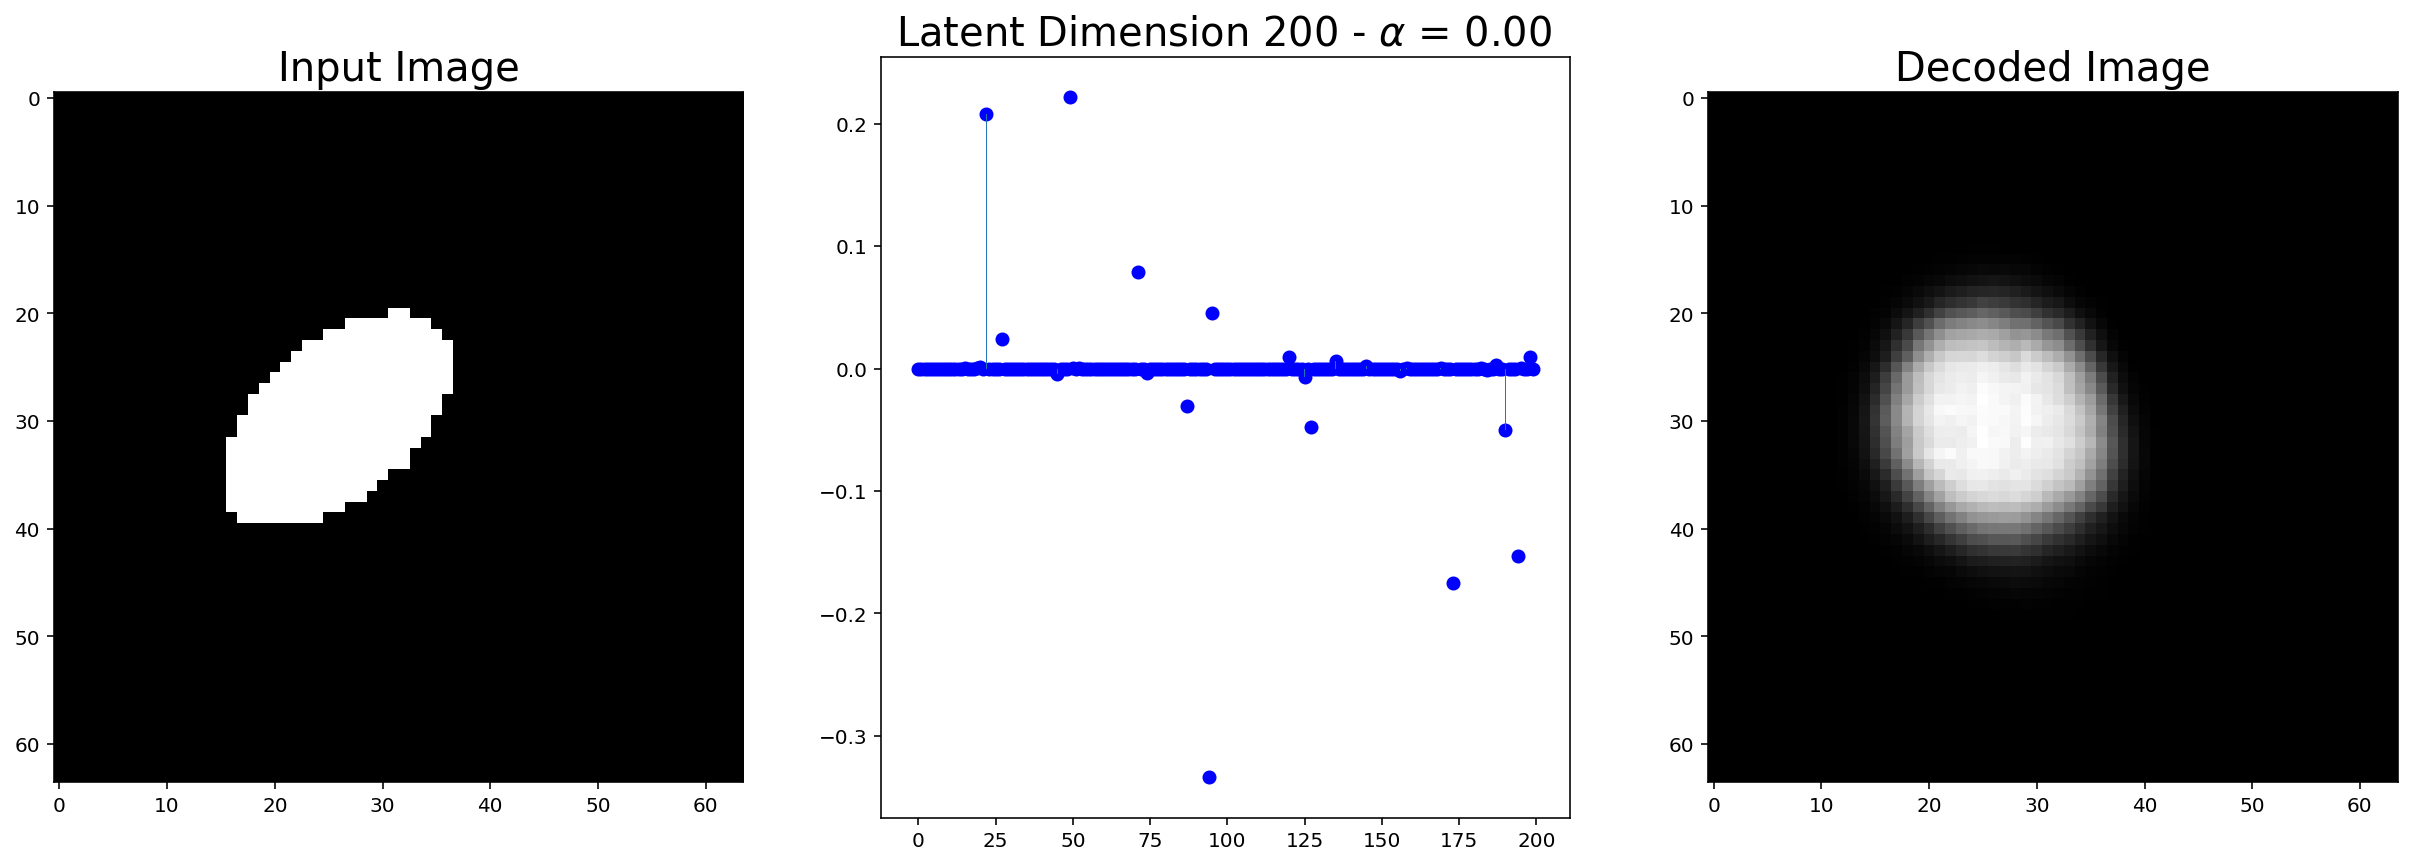

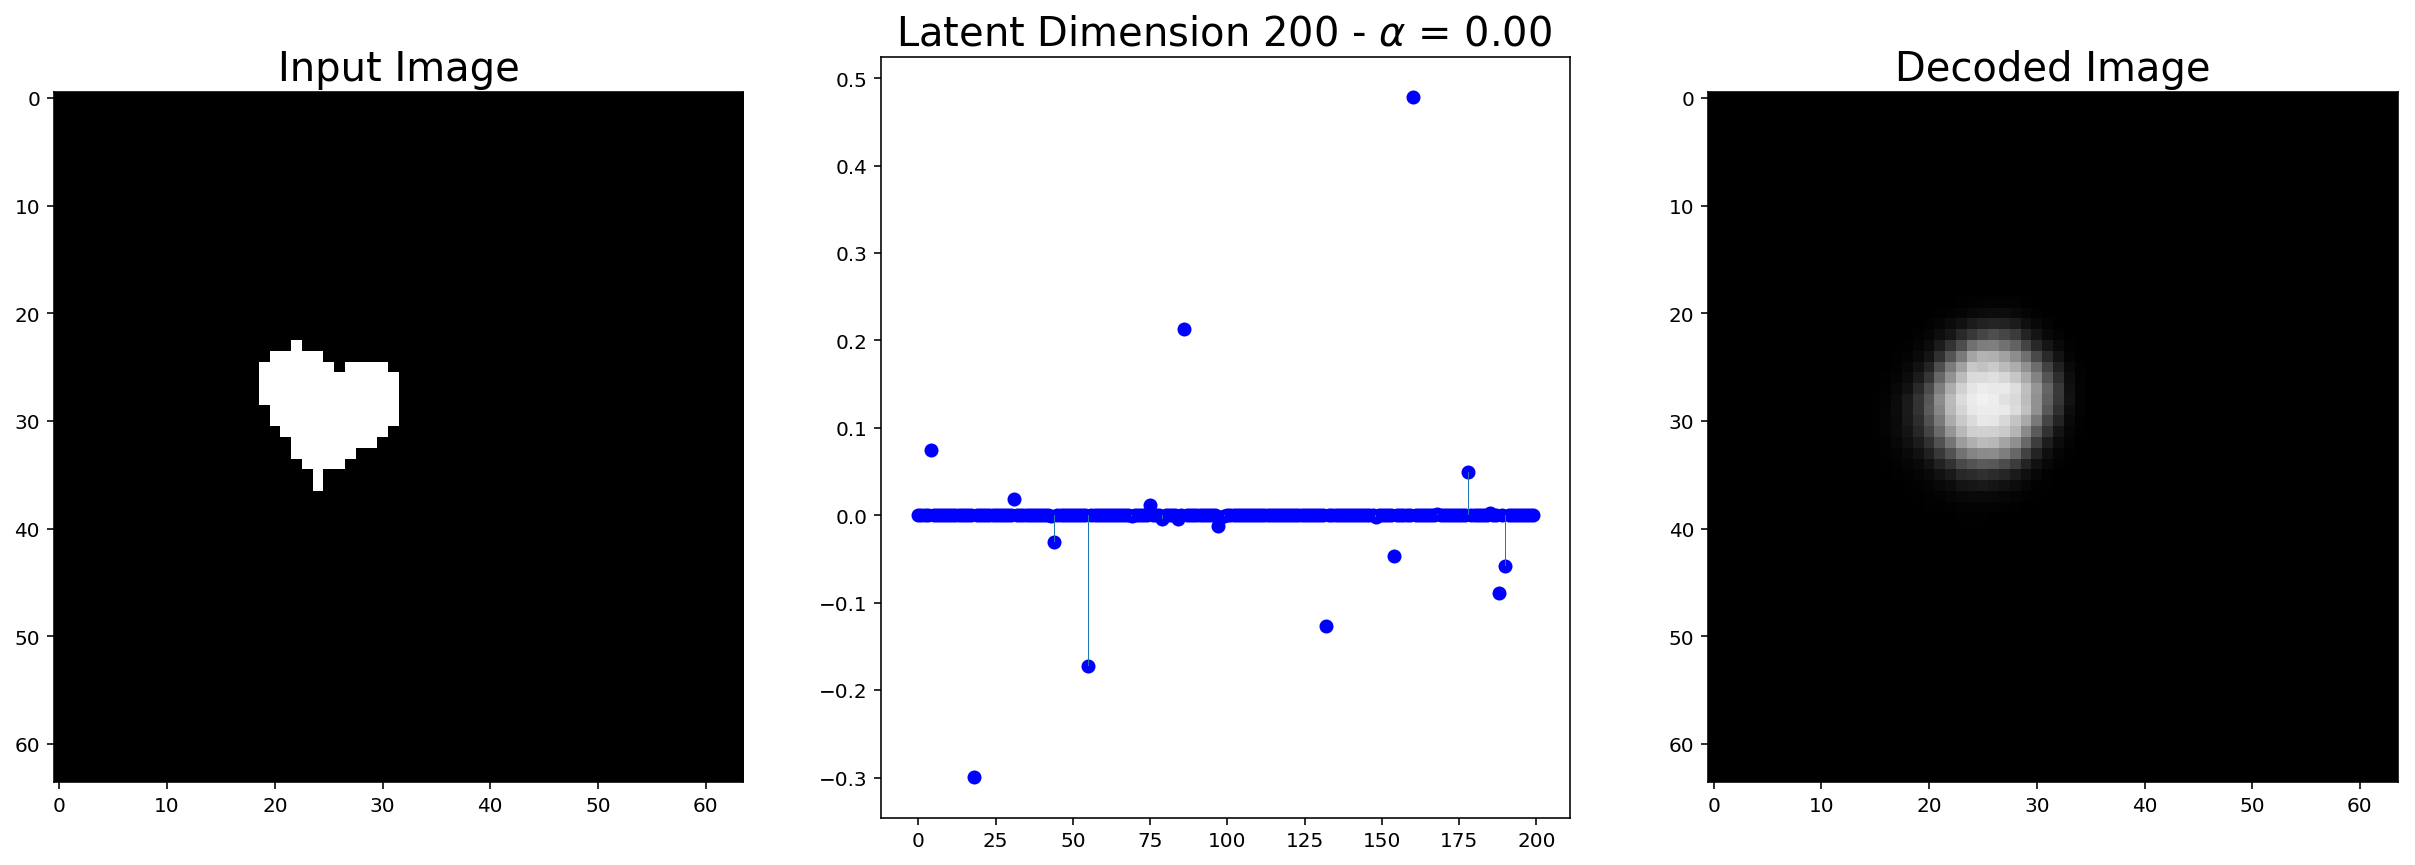

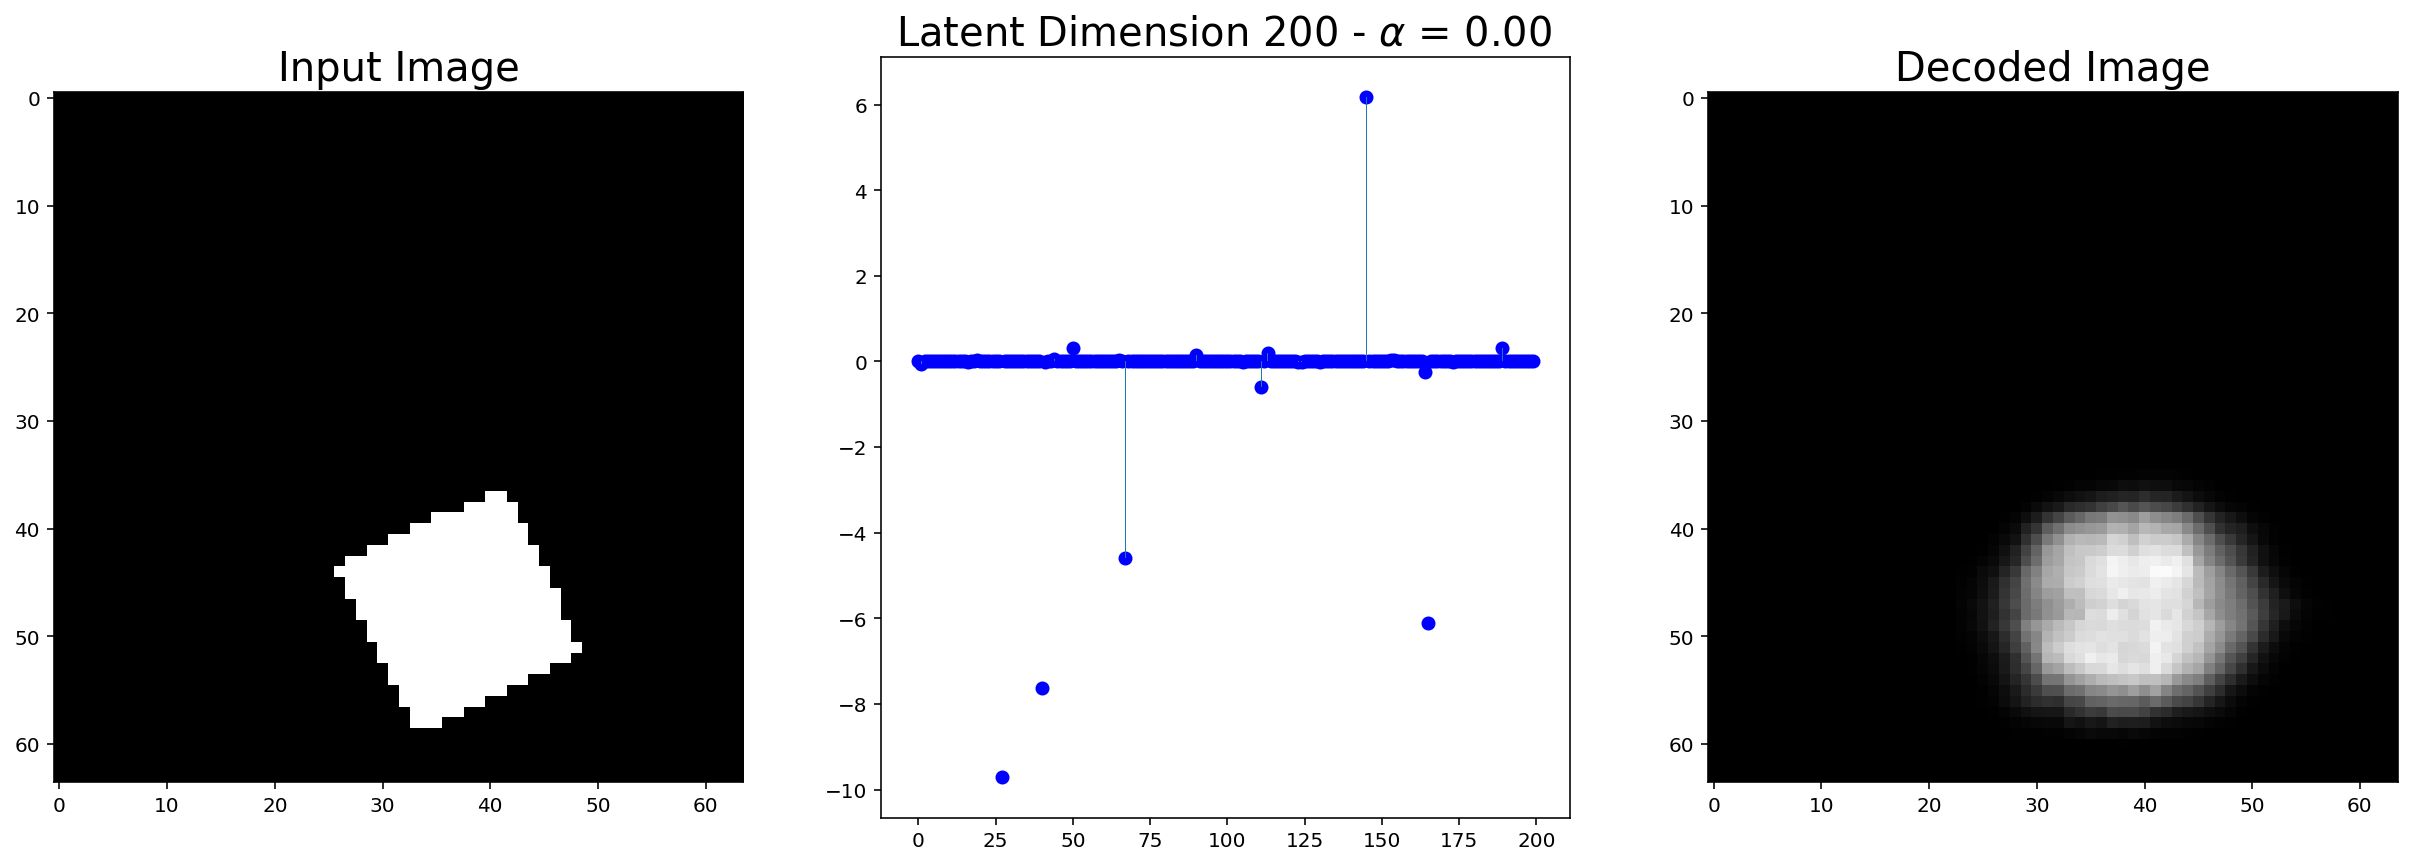

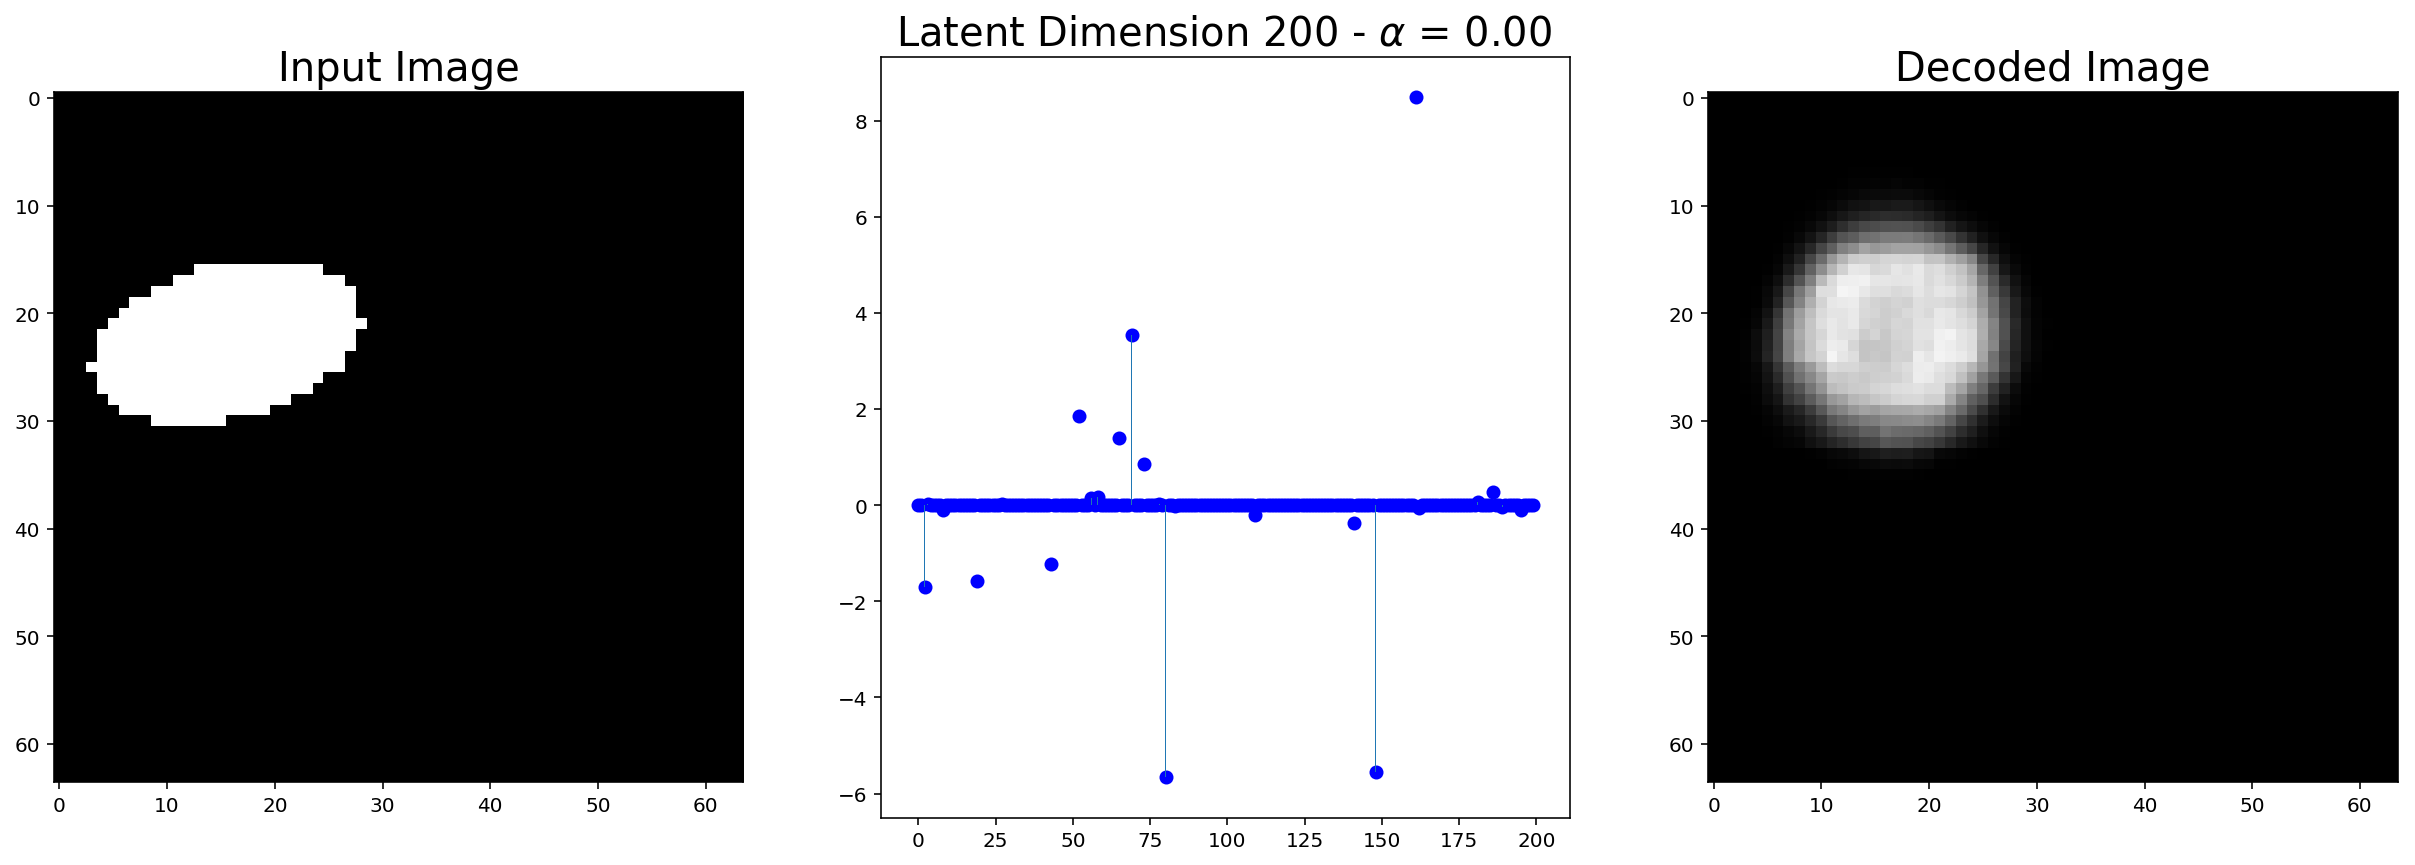

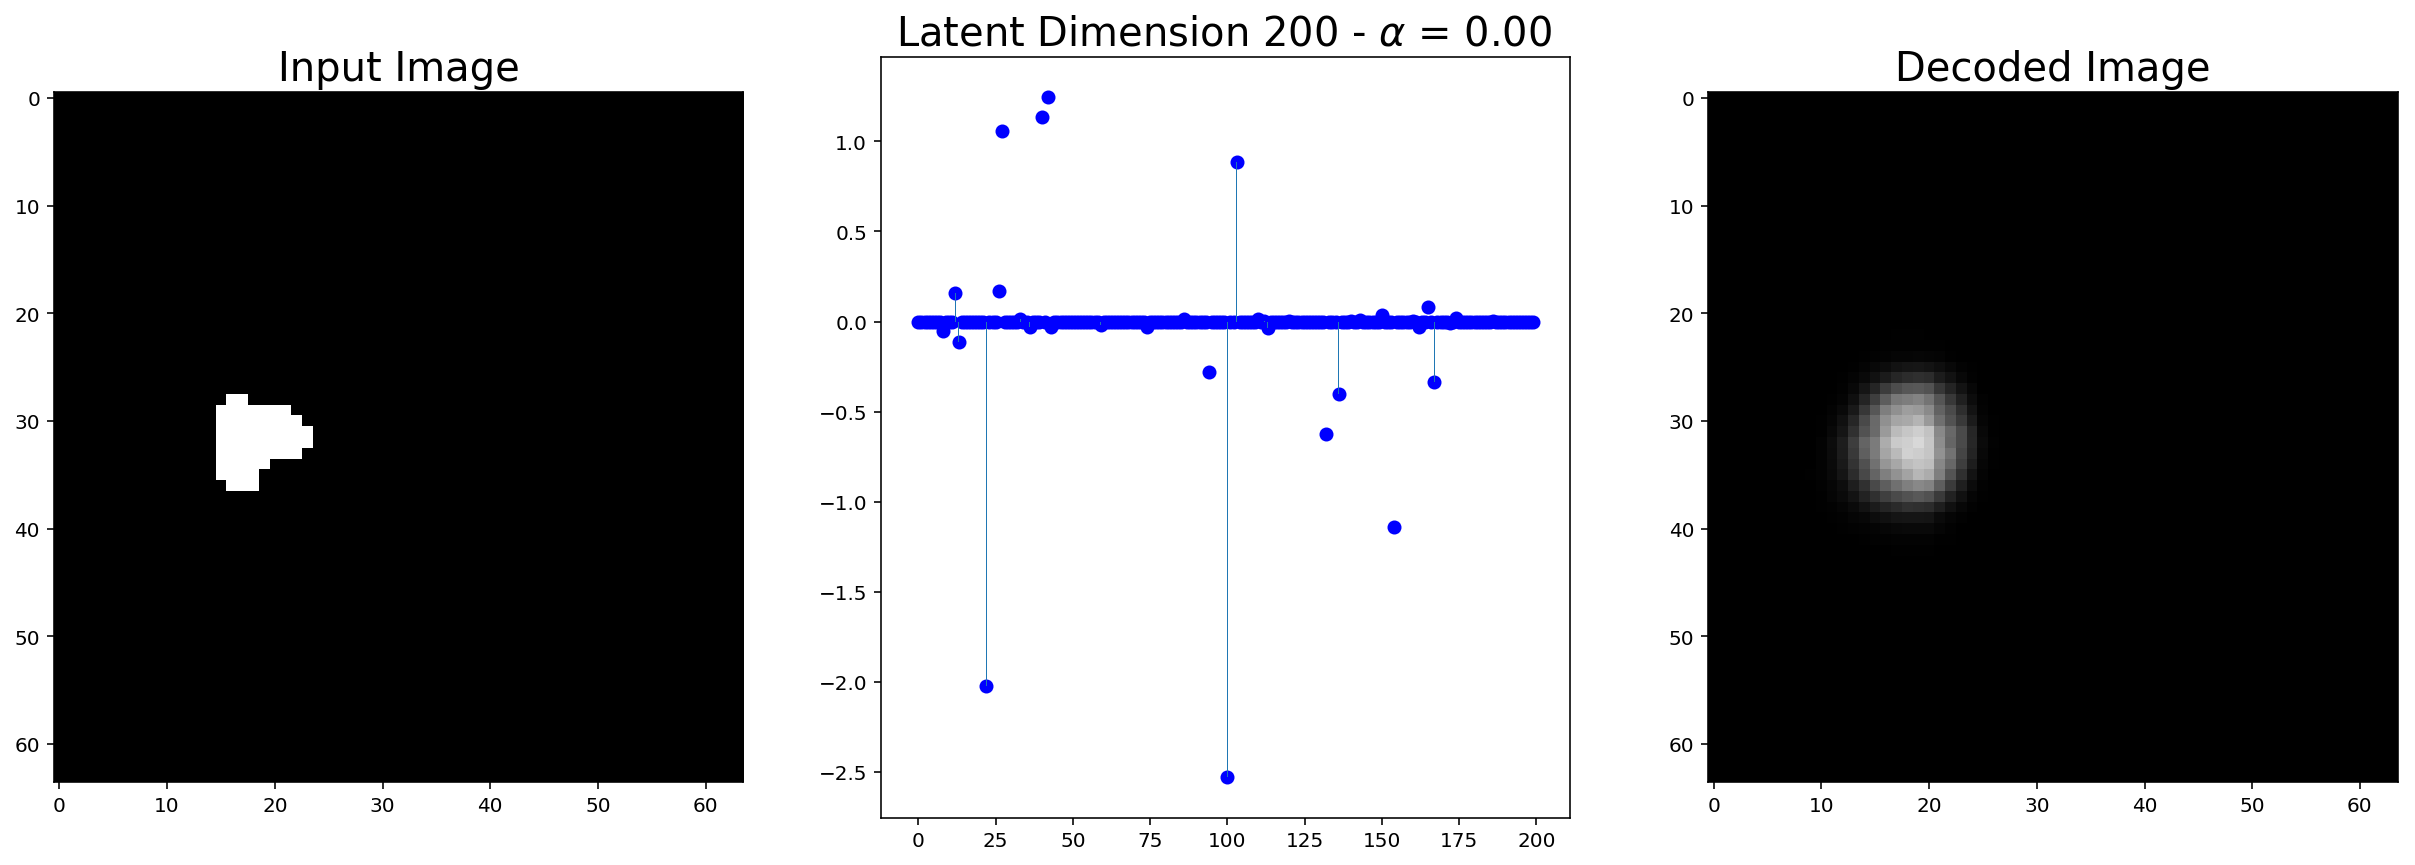

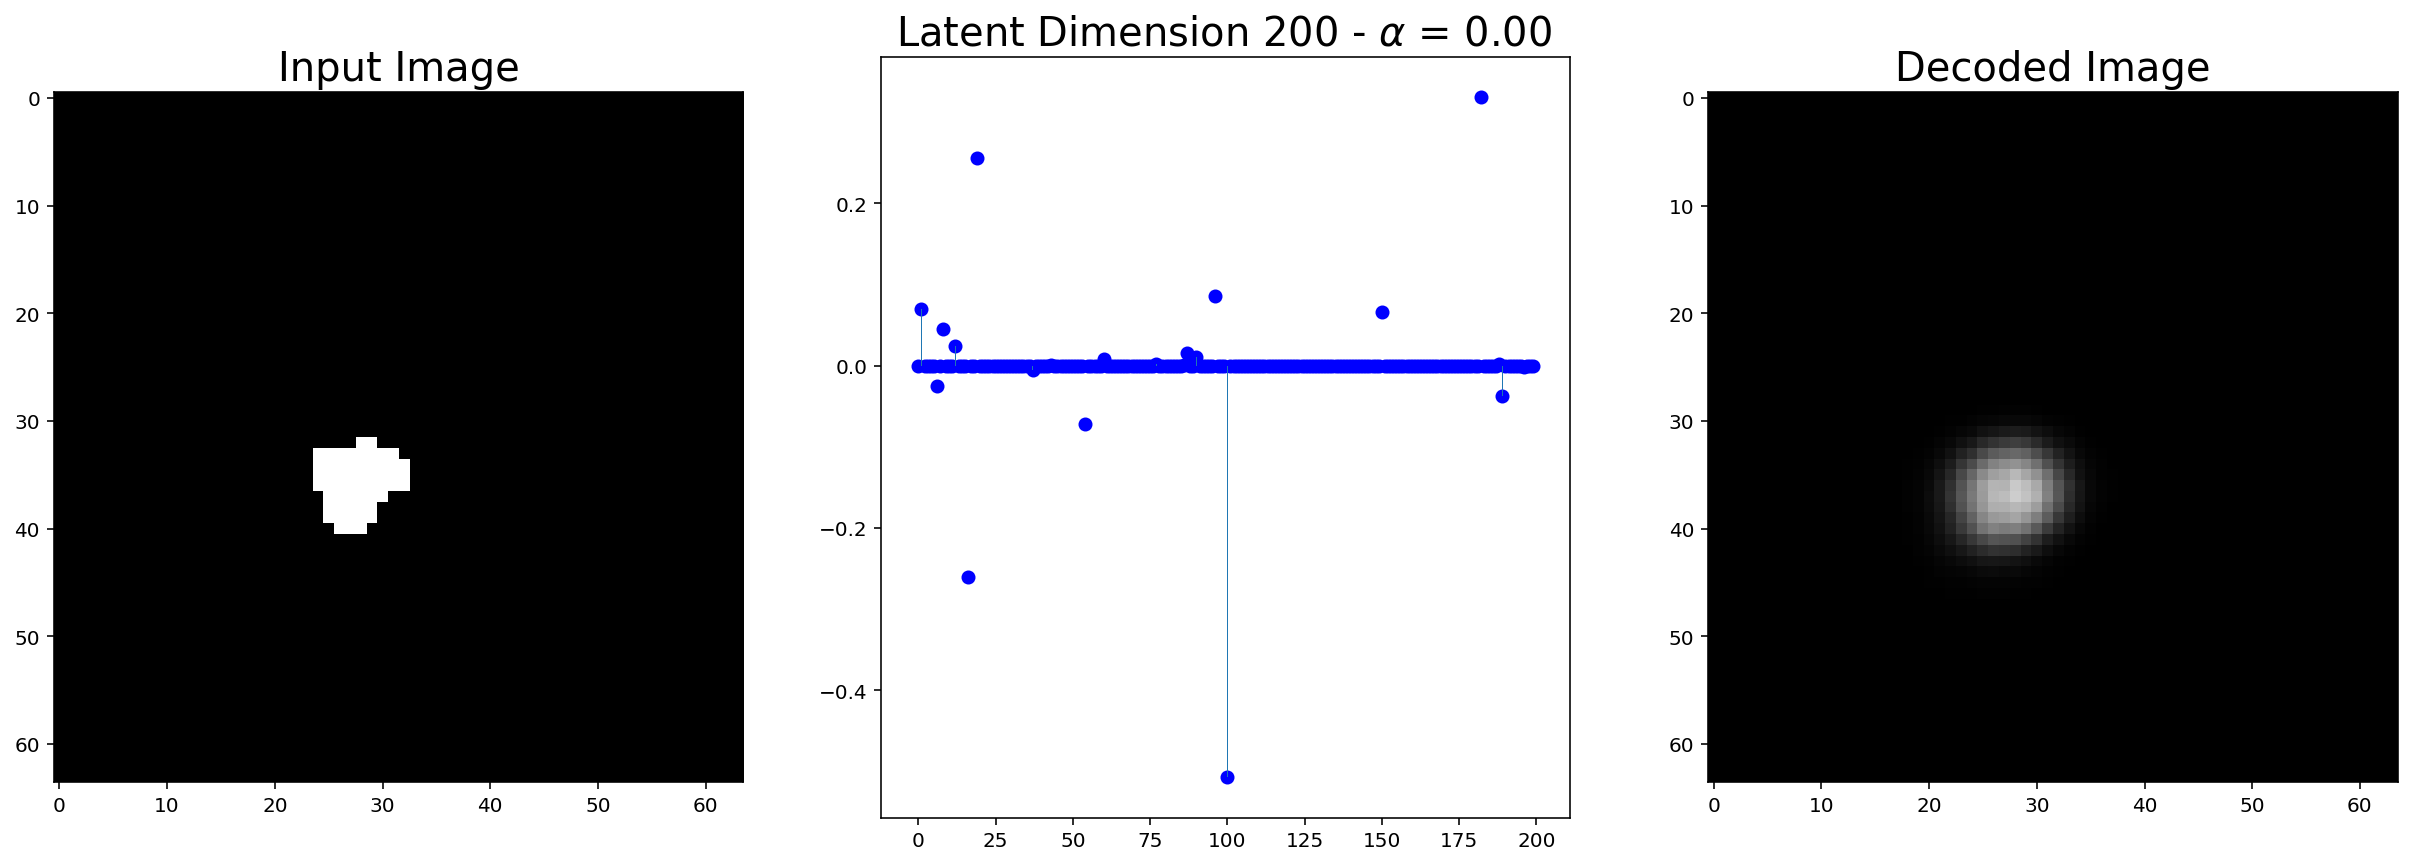

In [72]:
for i in range(15):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

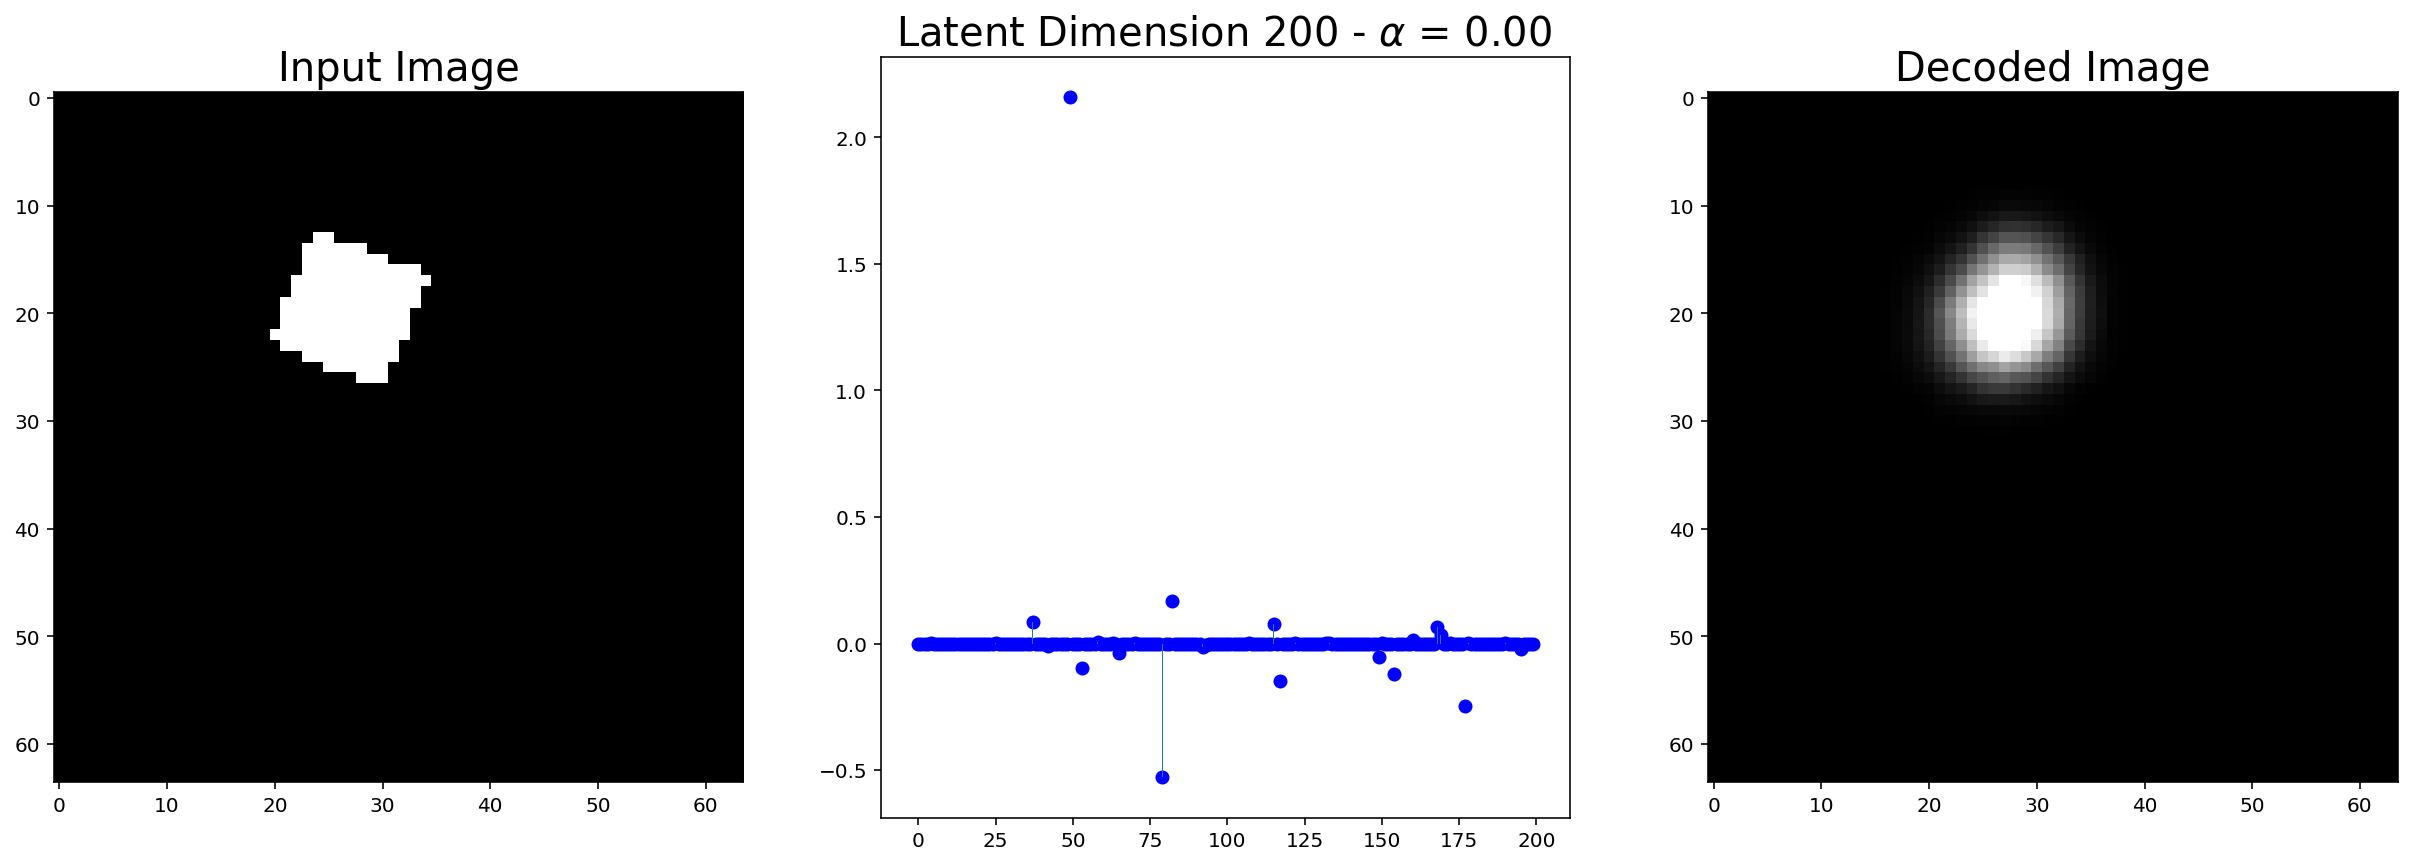

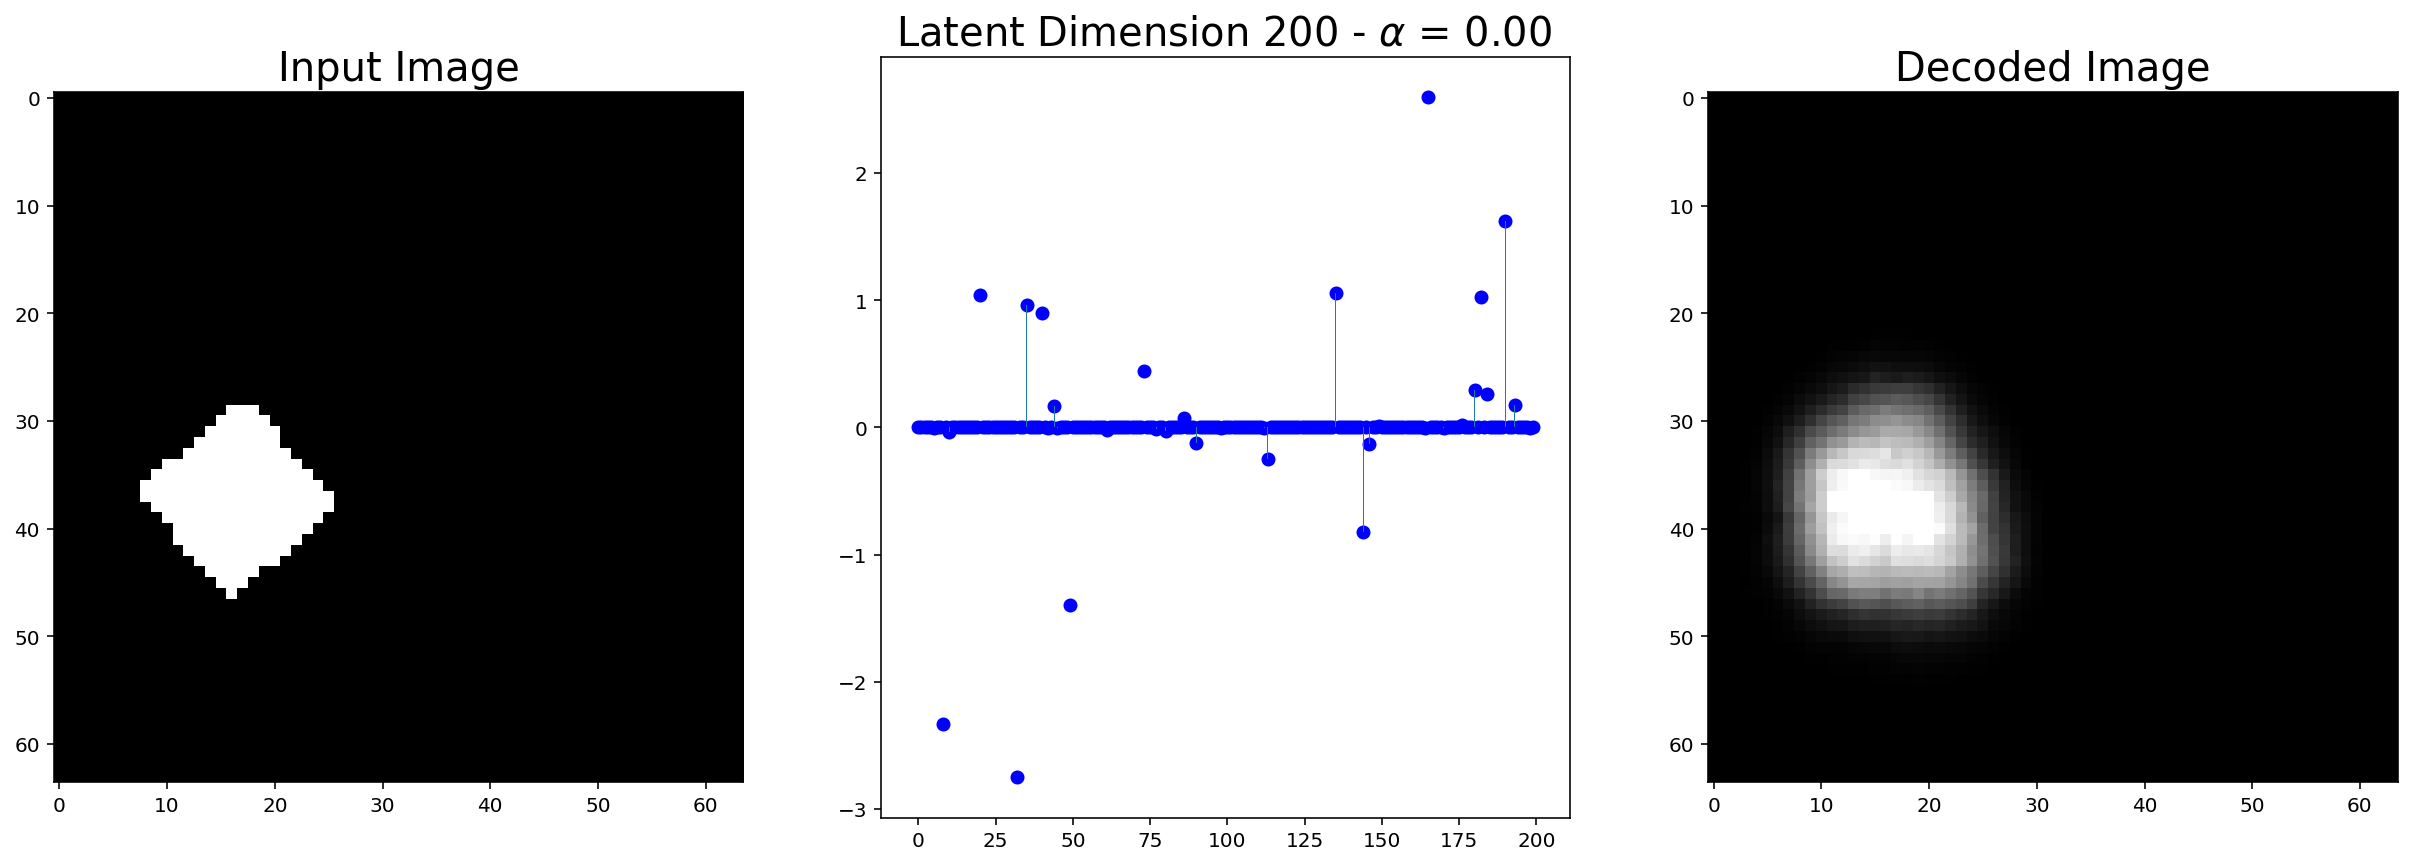

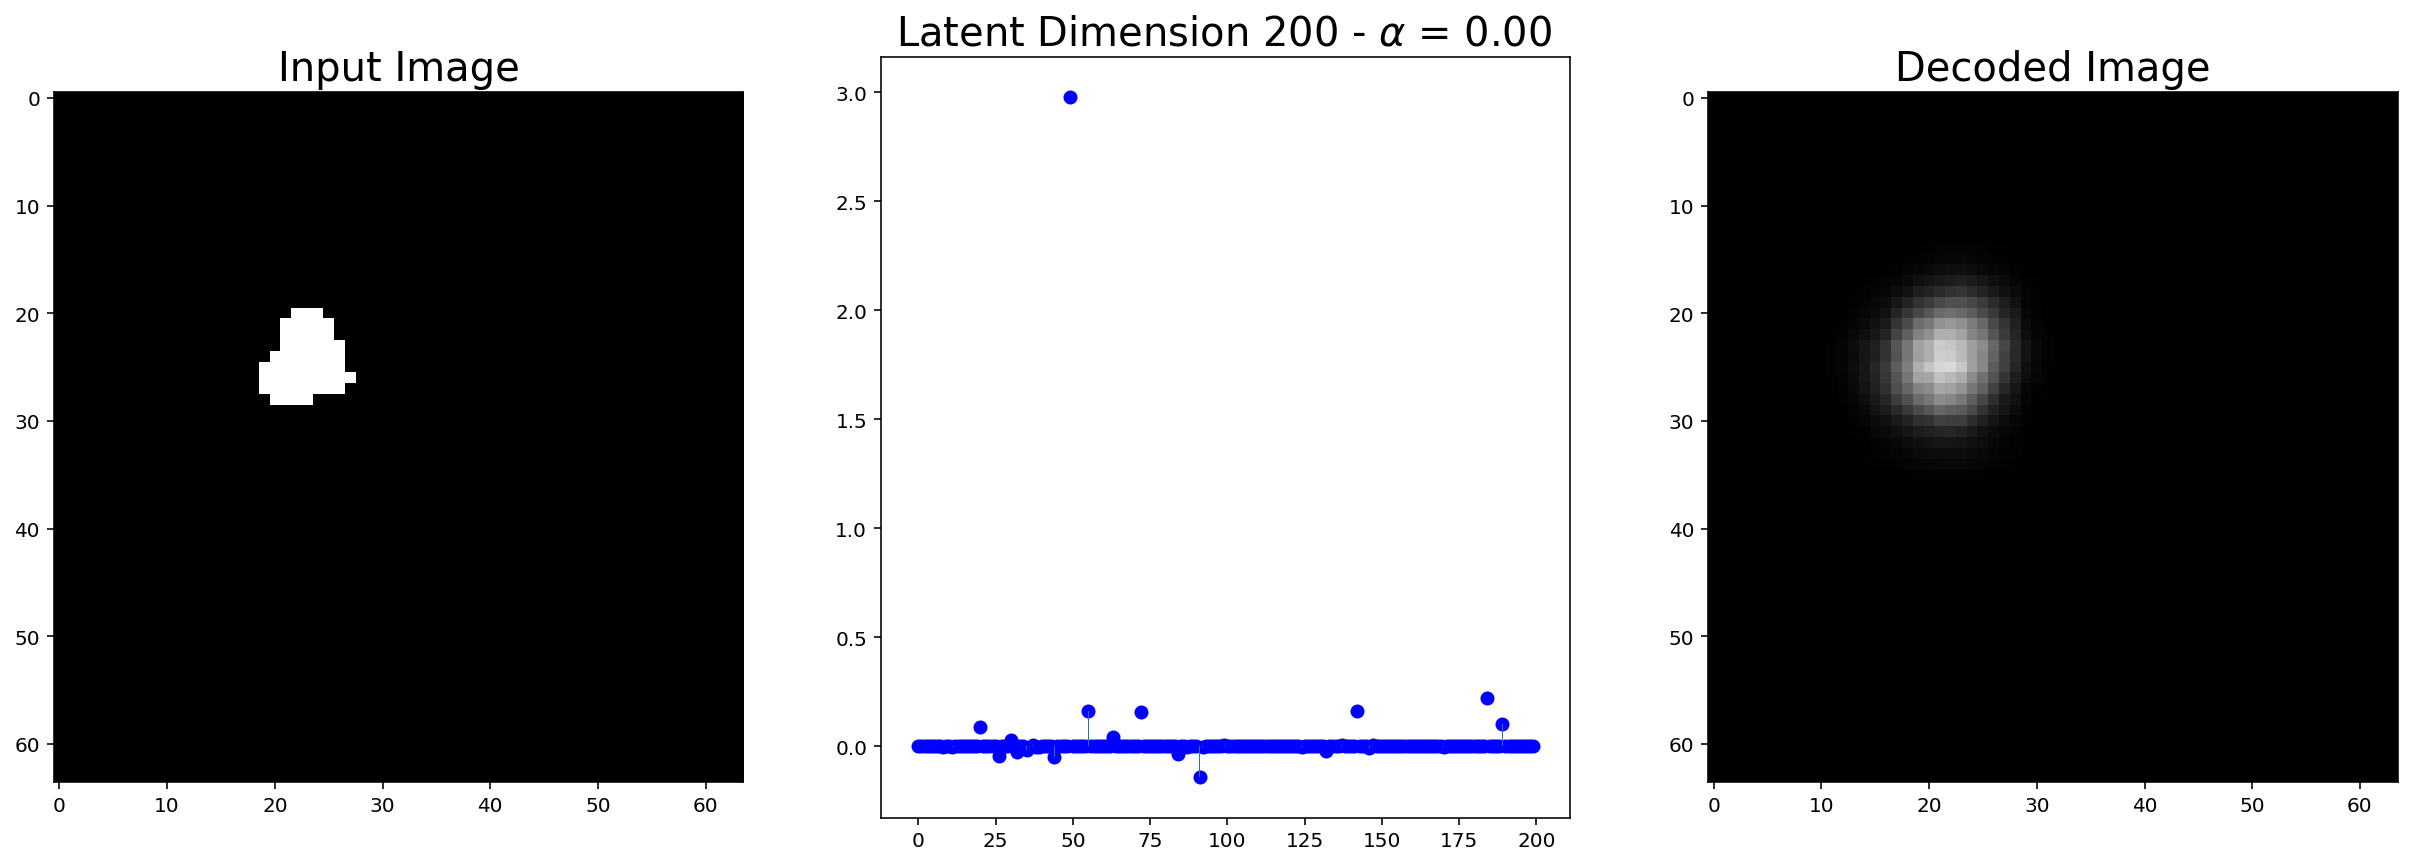

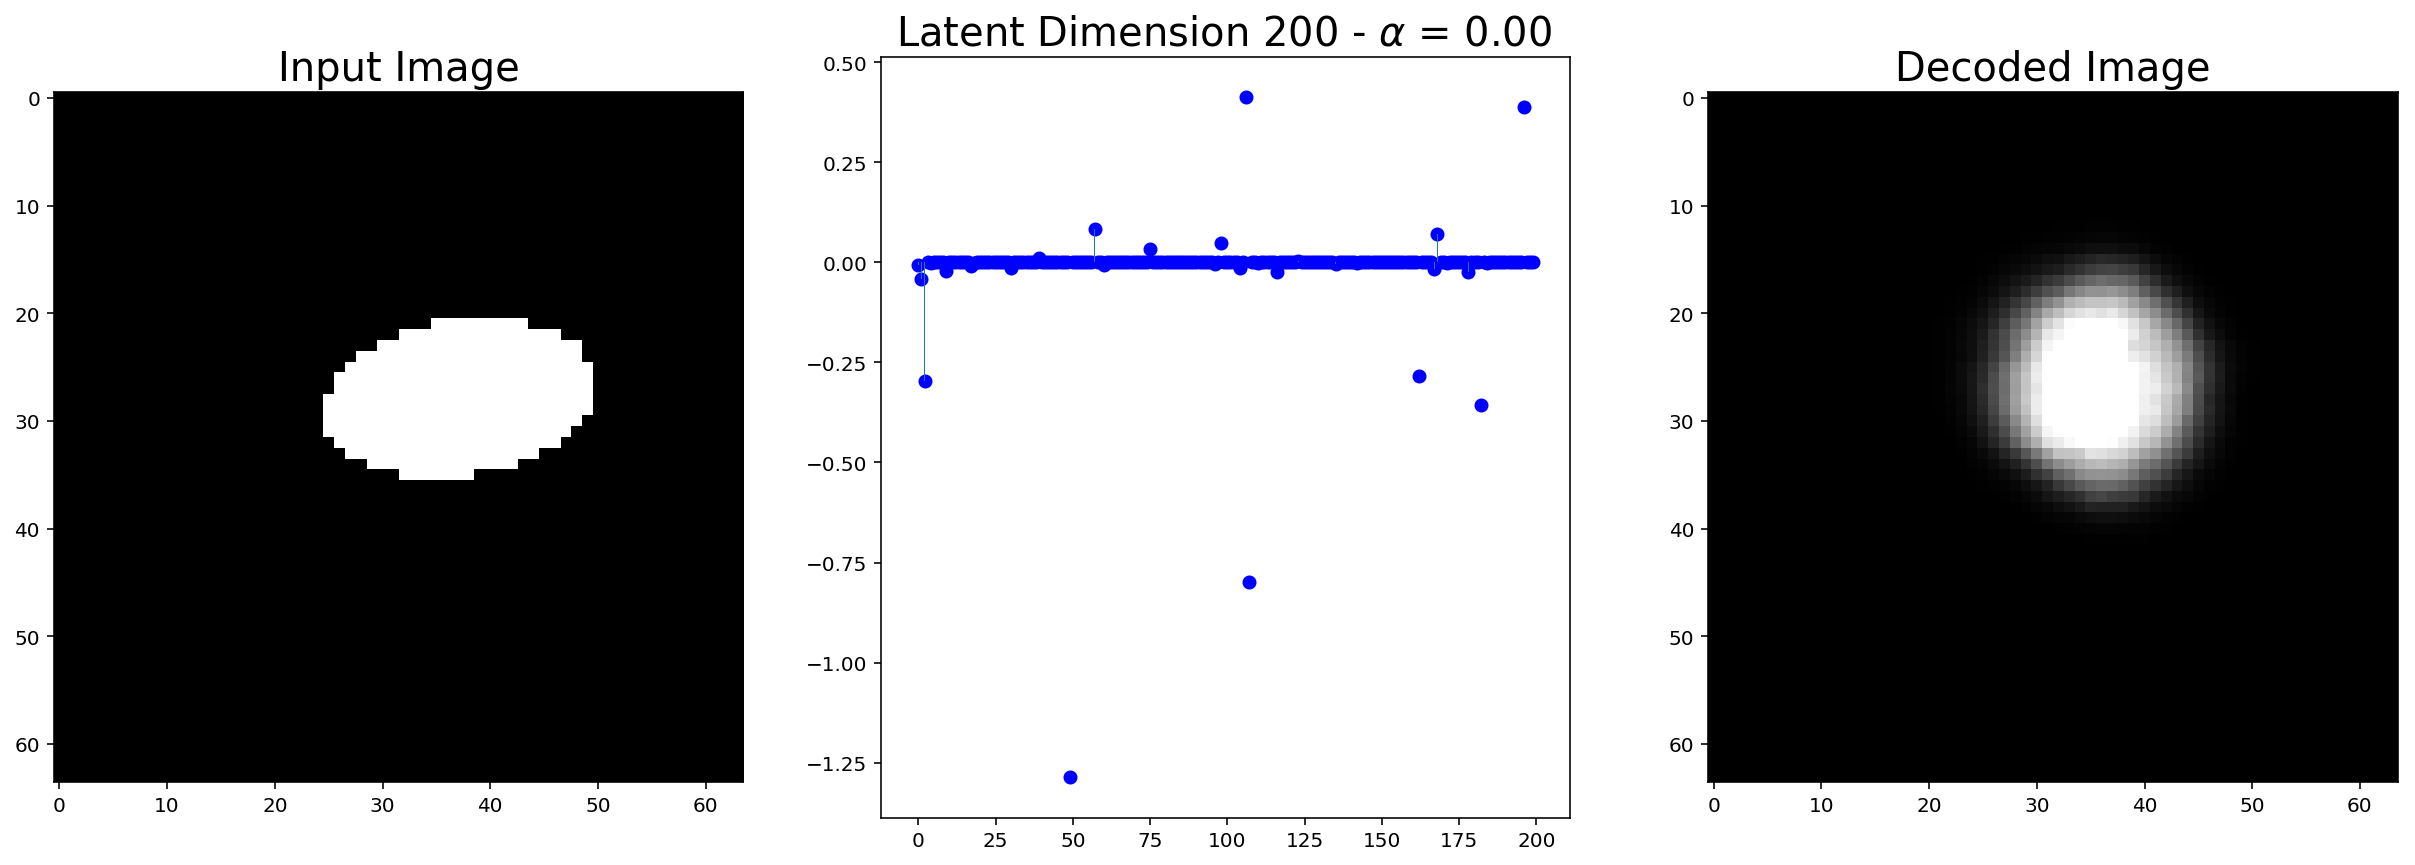

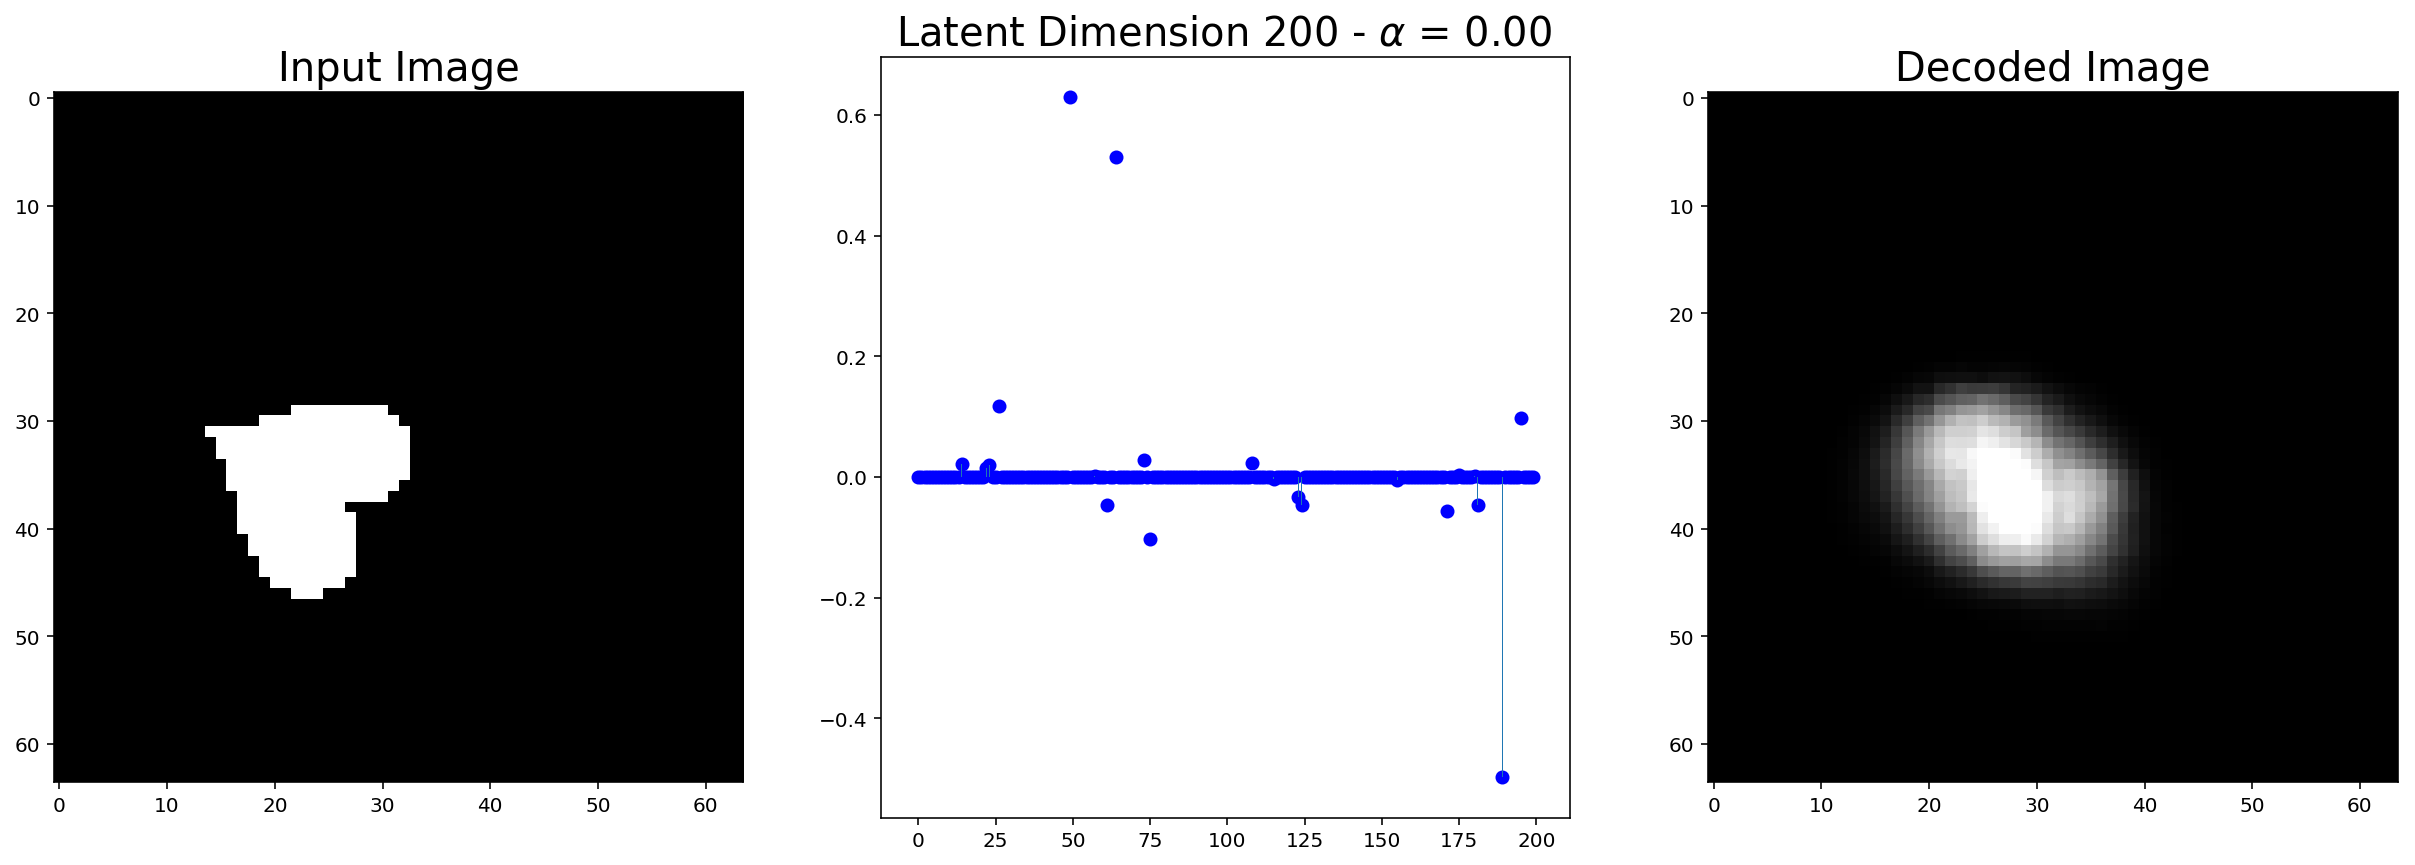

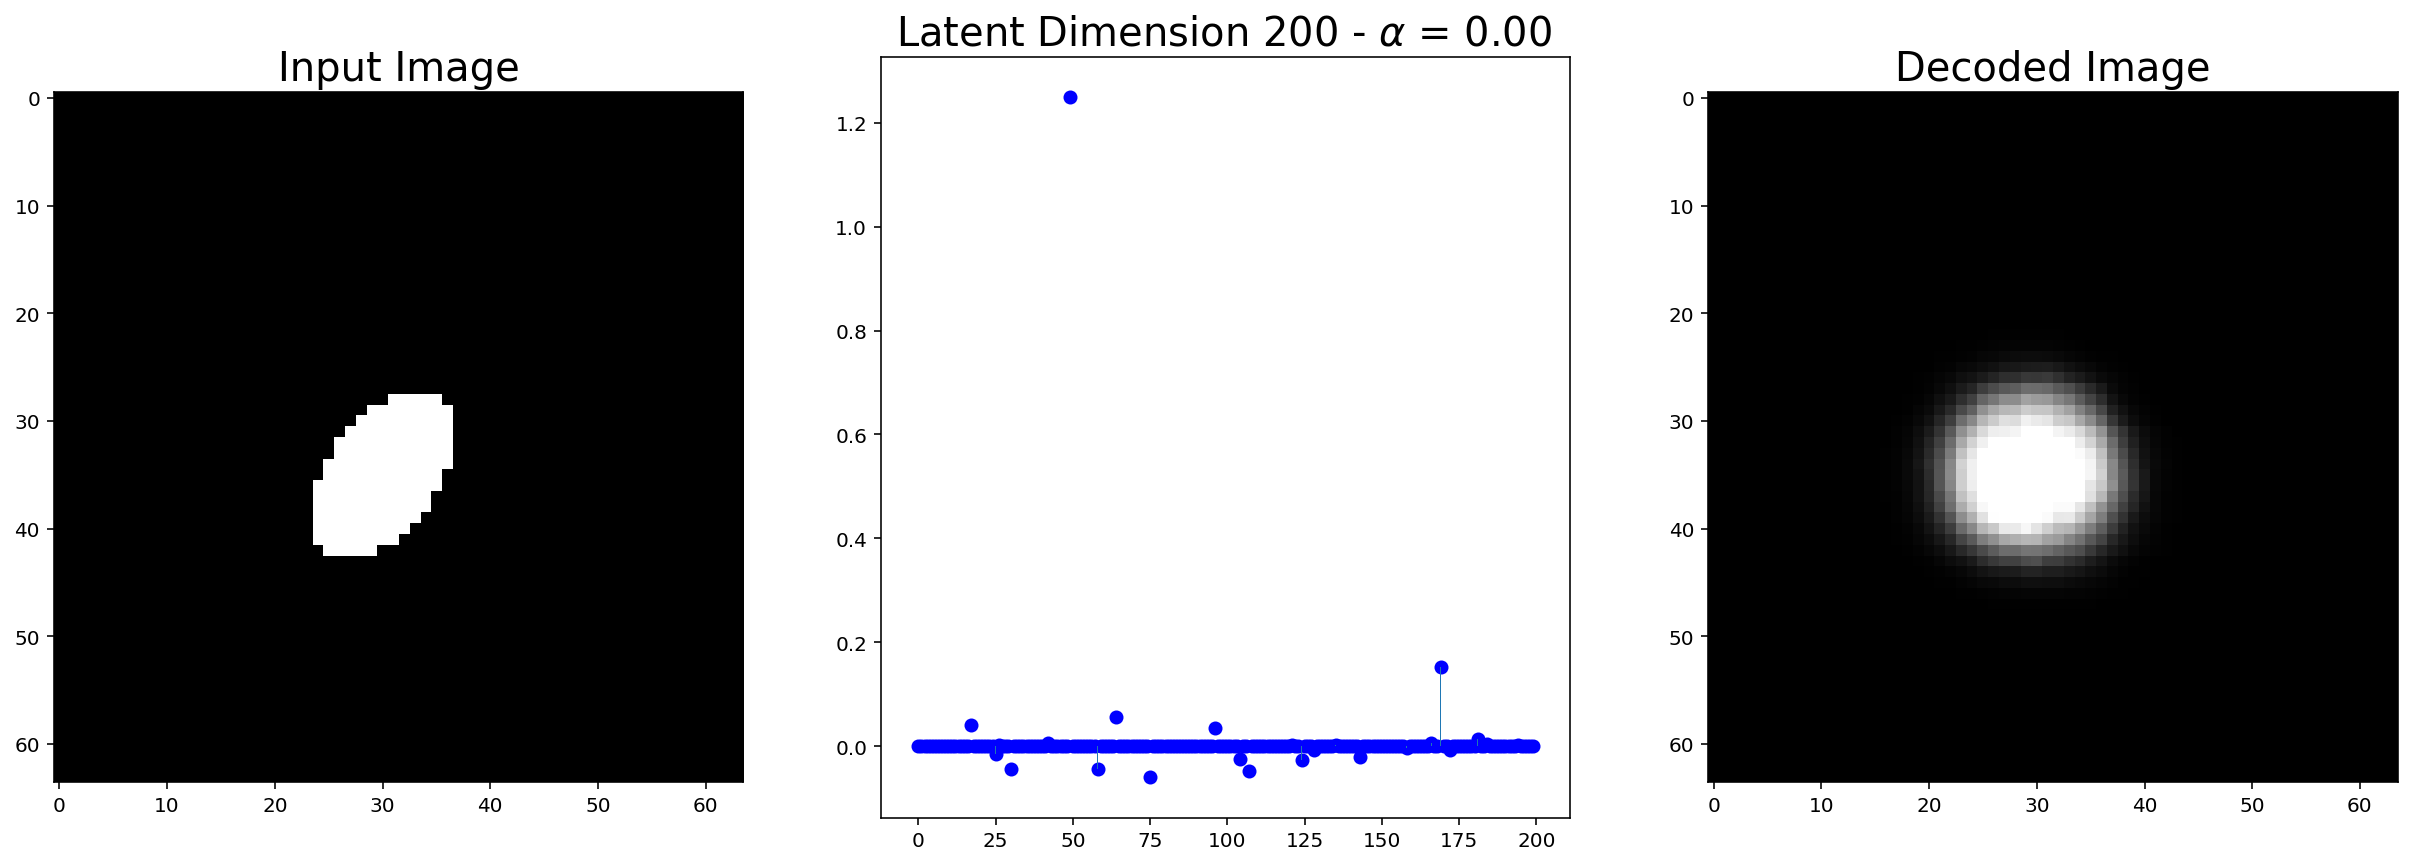

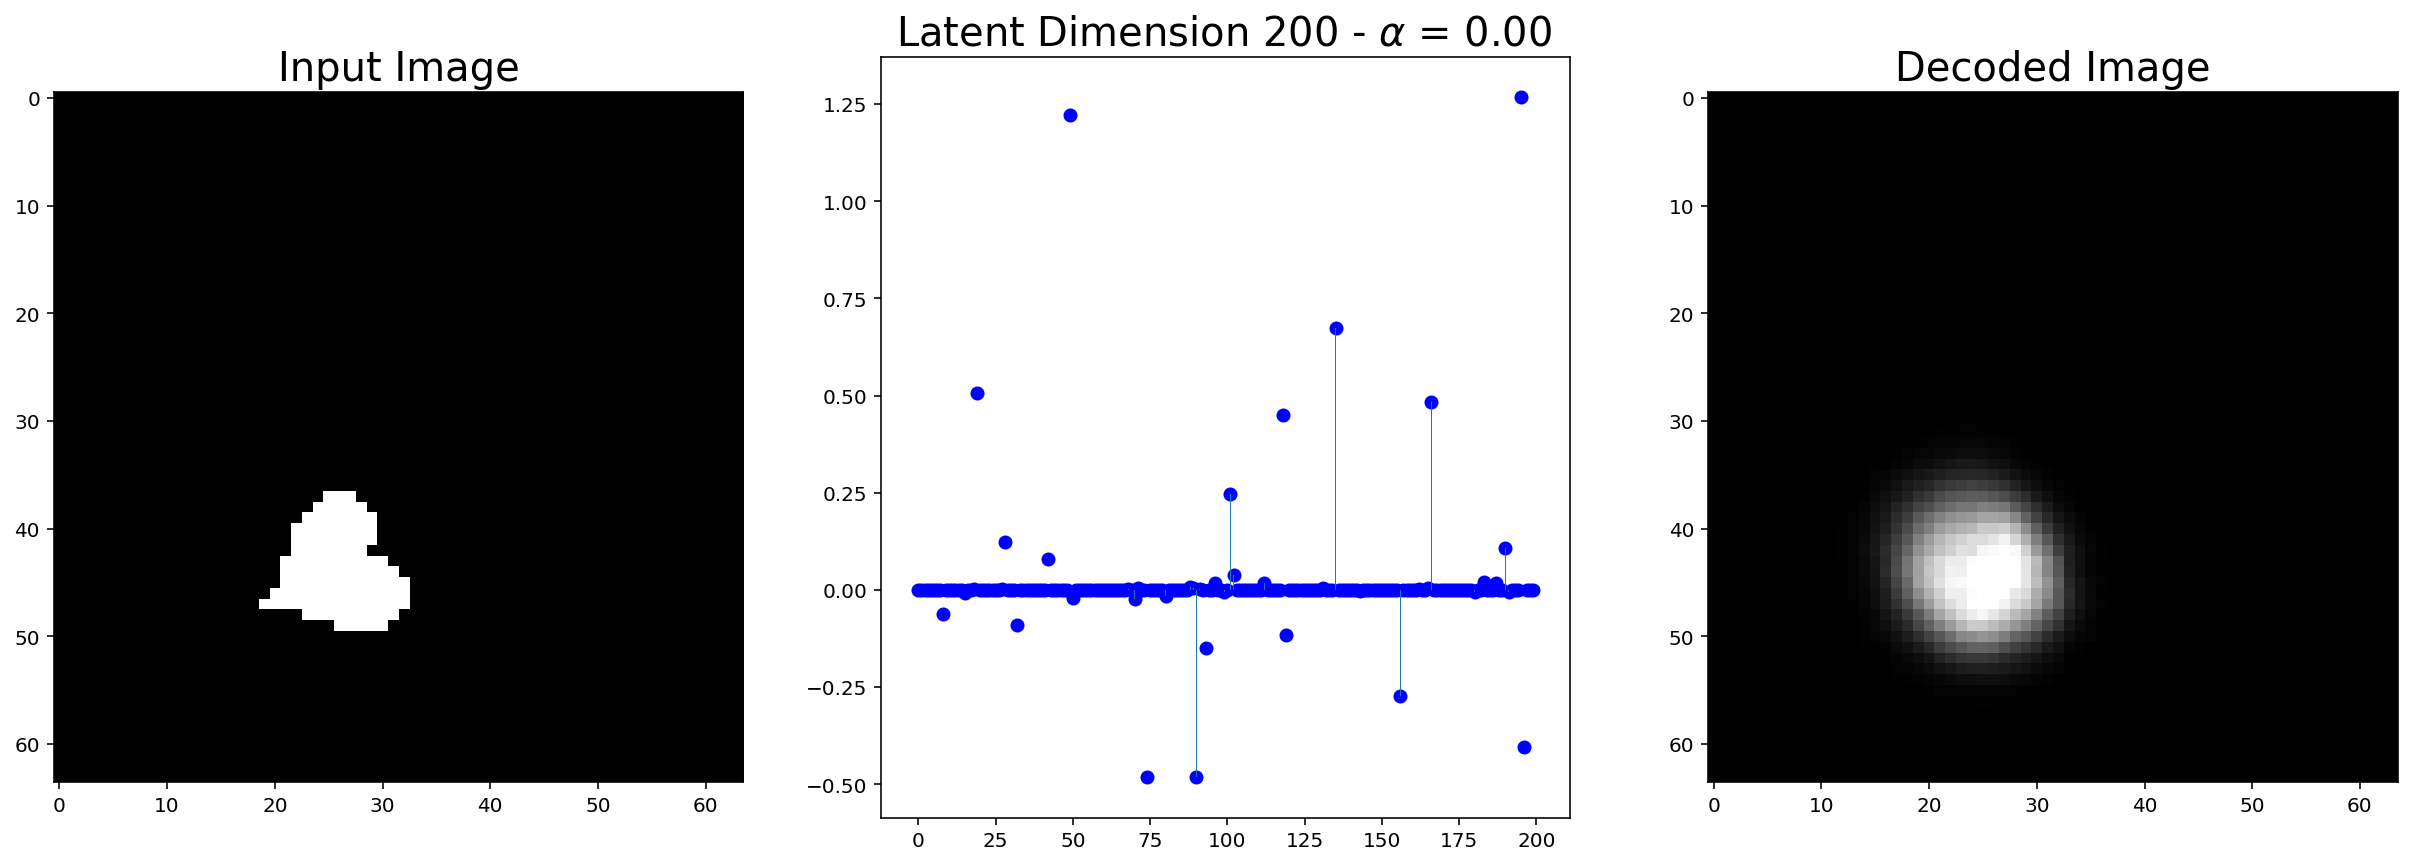

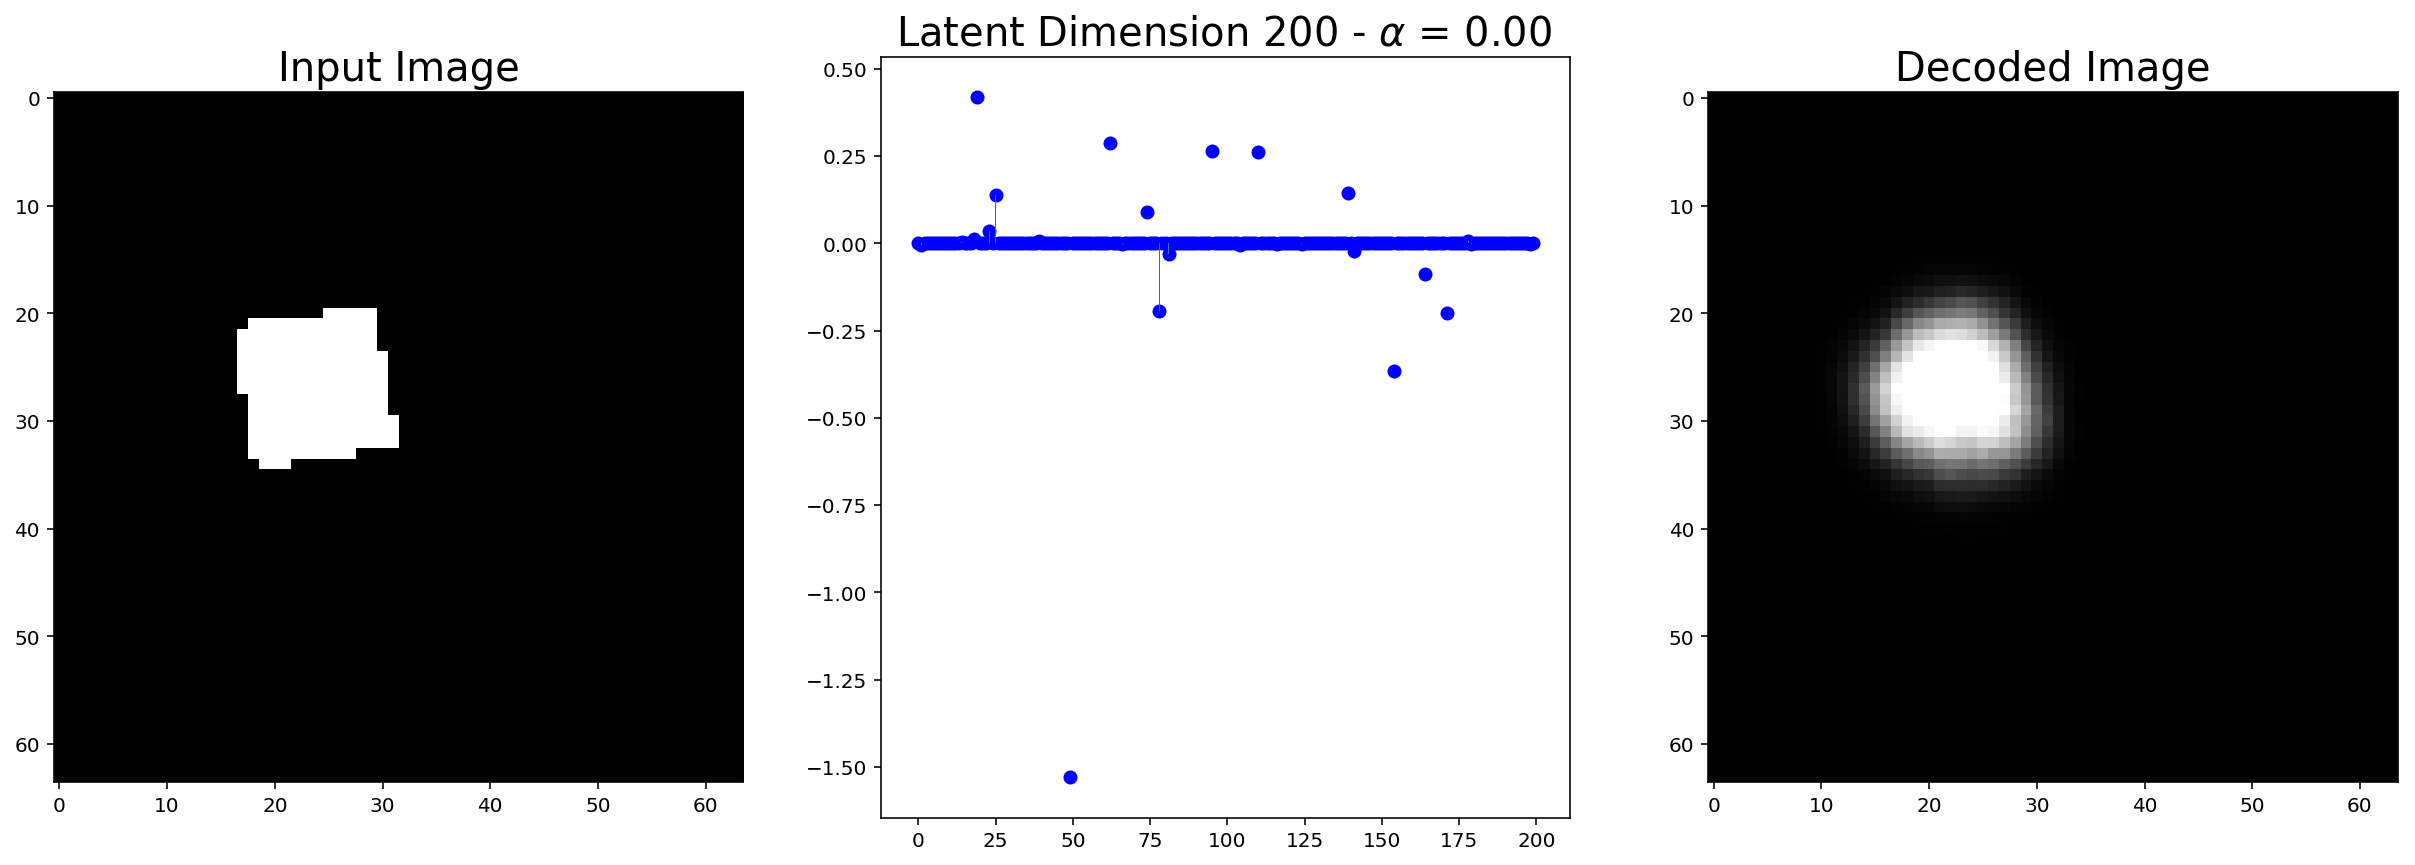

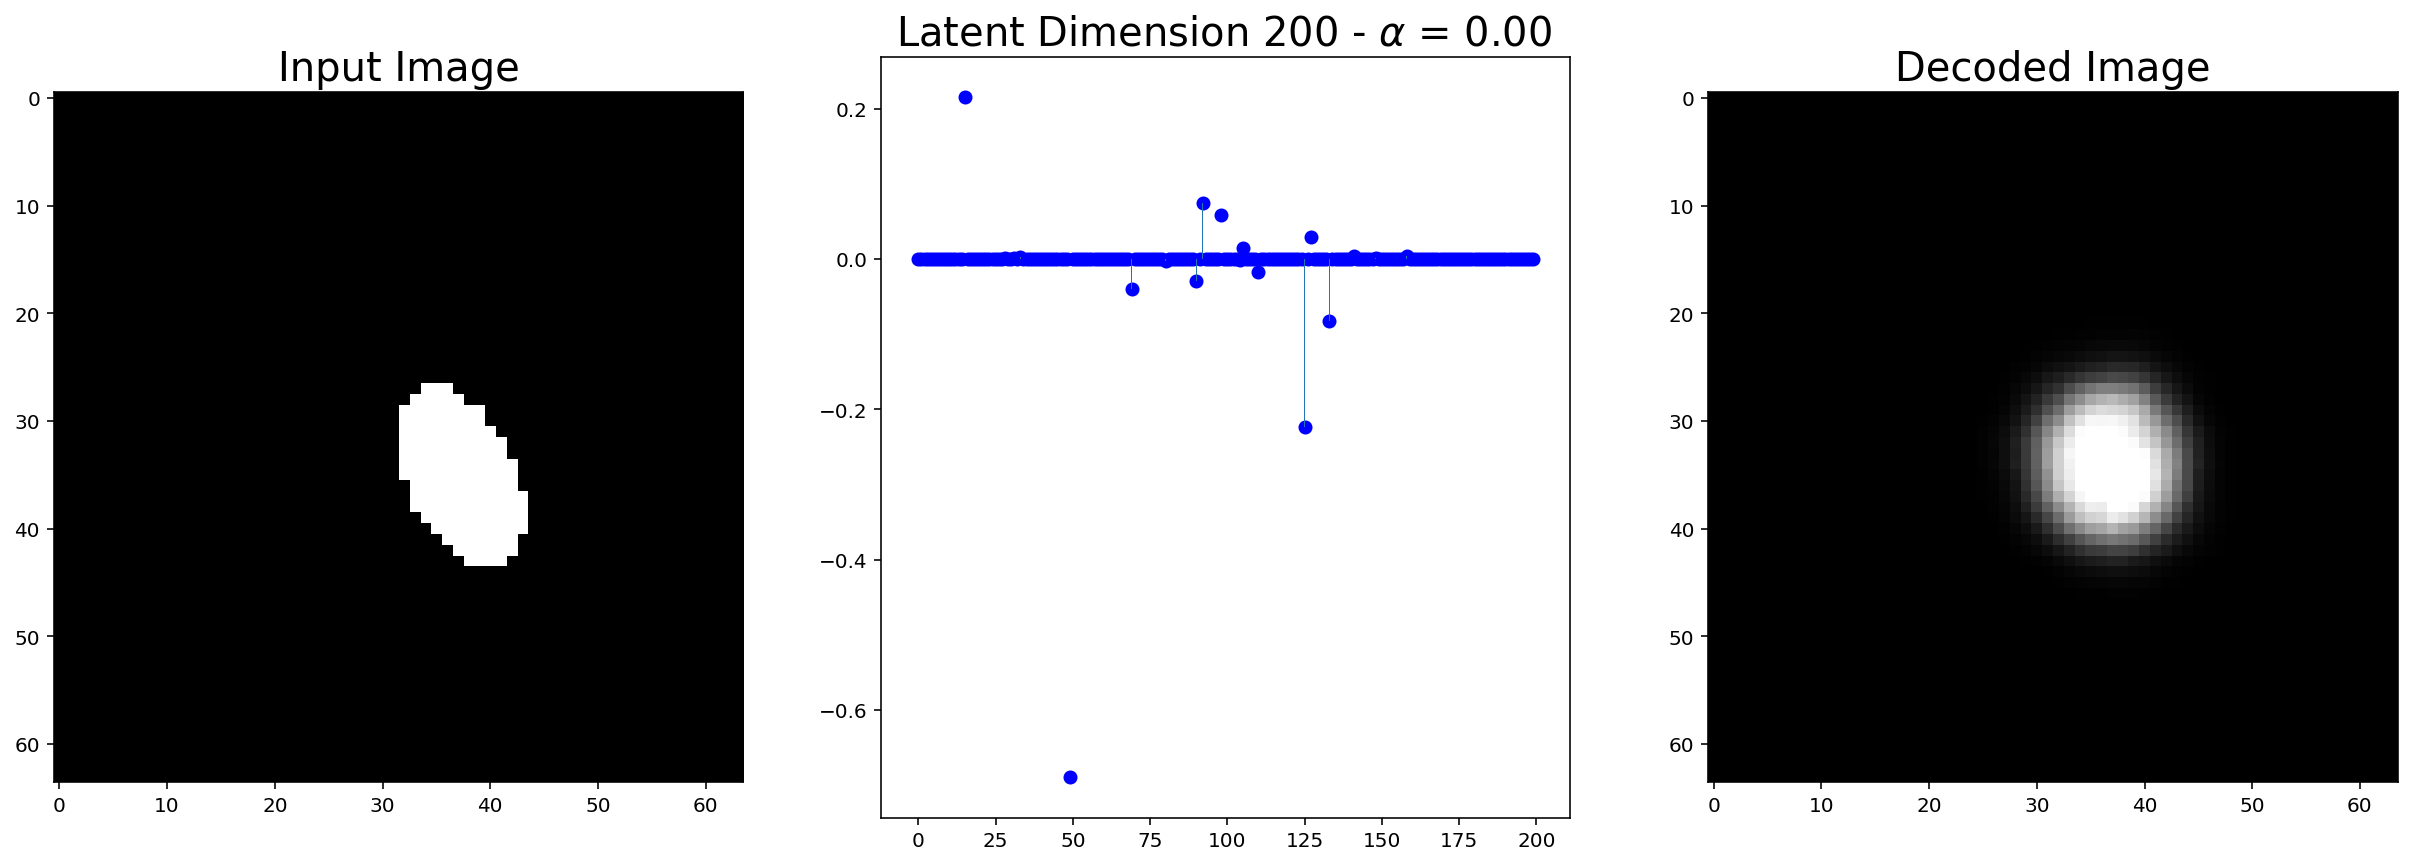

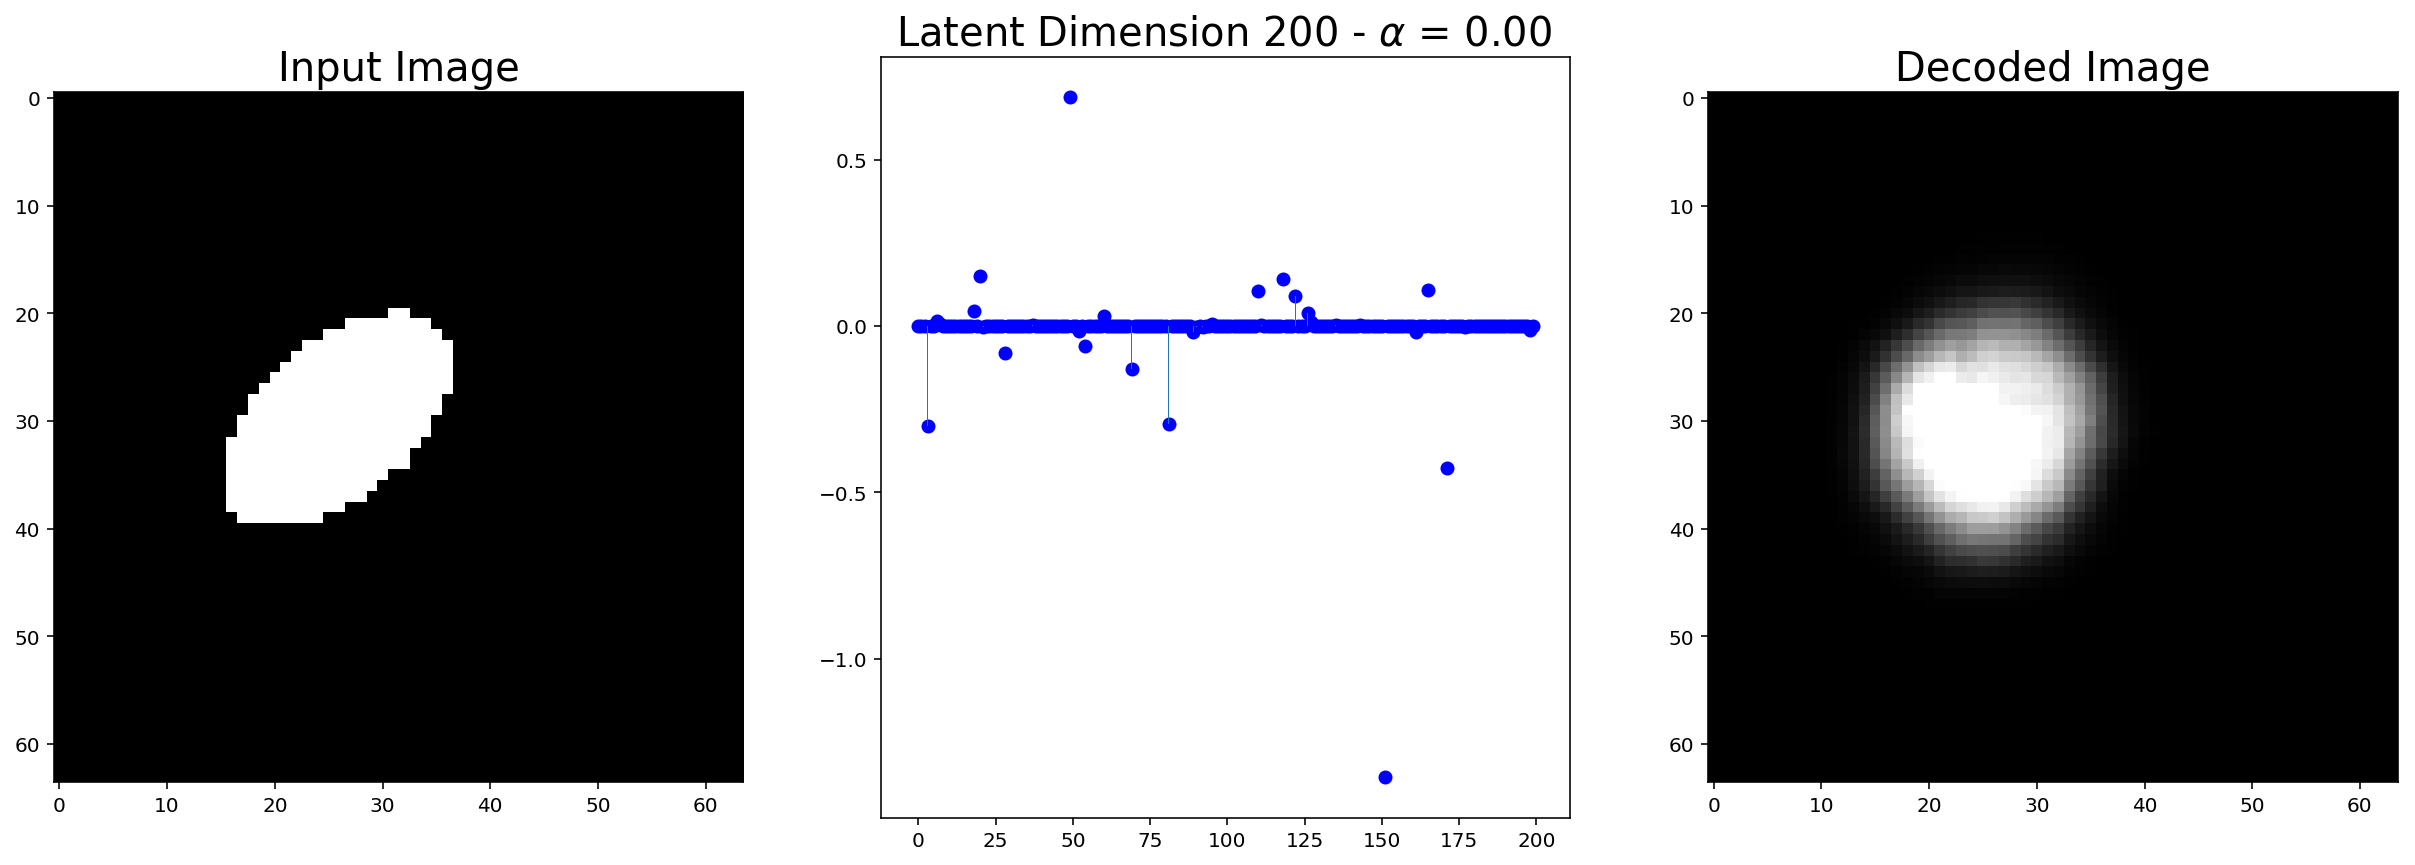

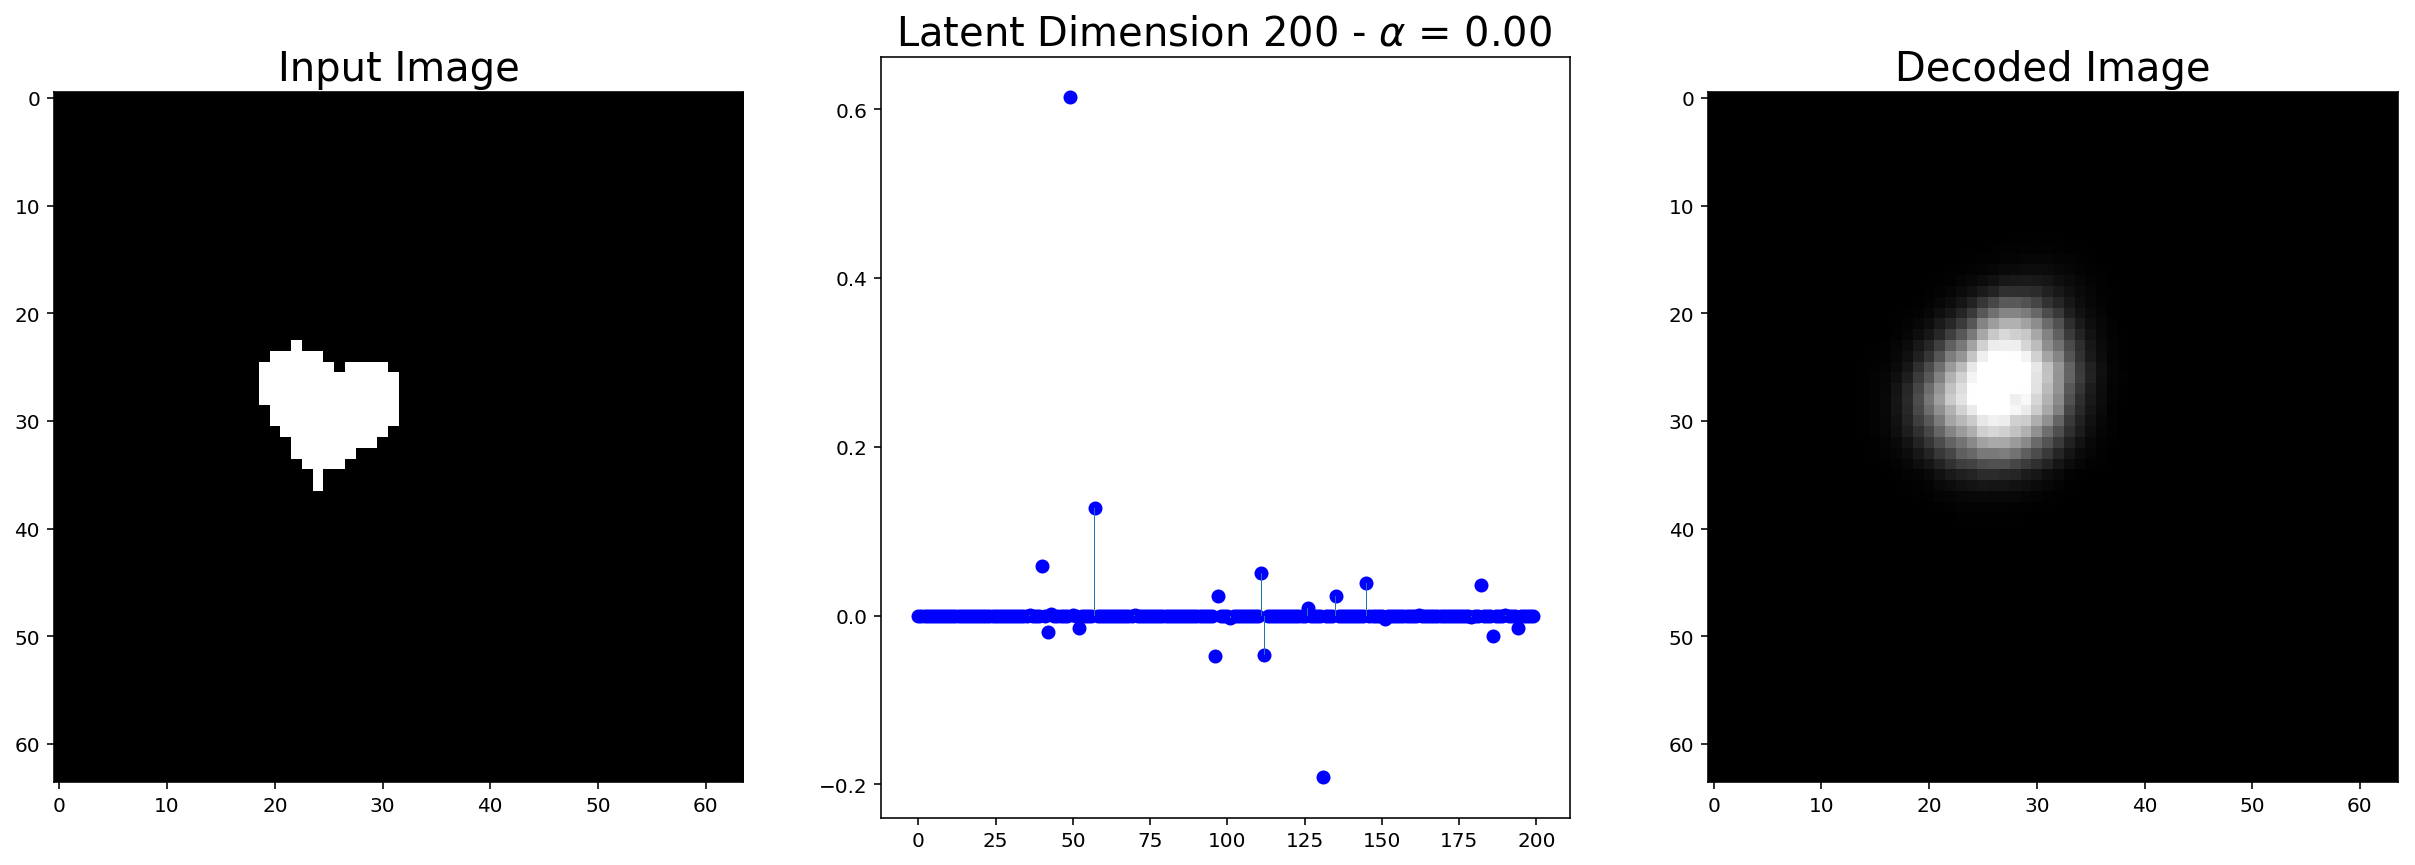

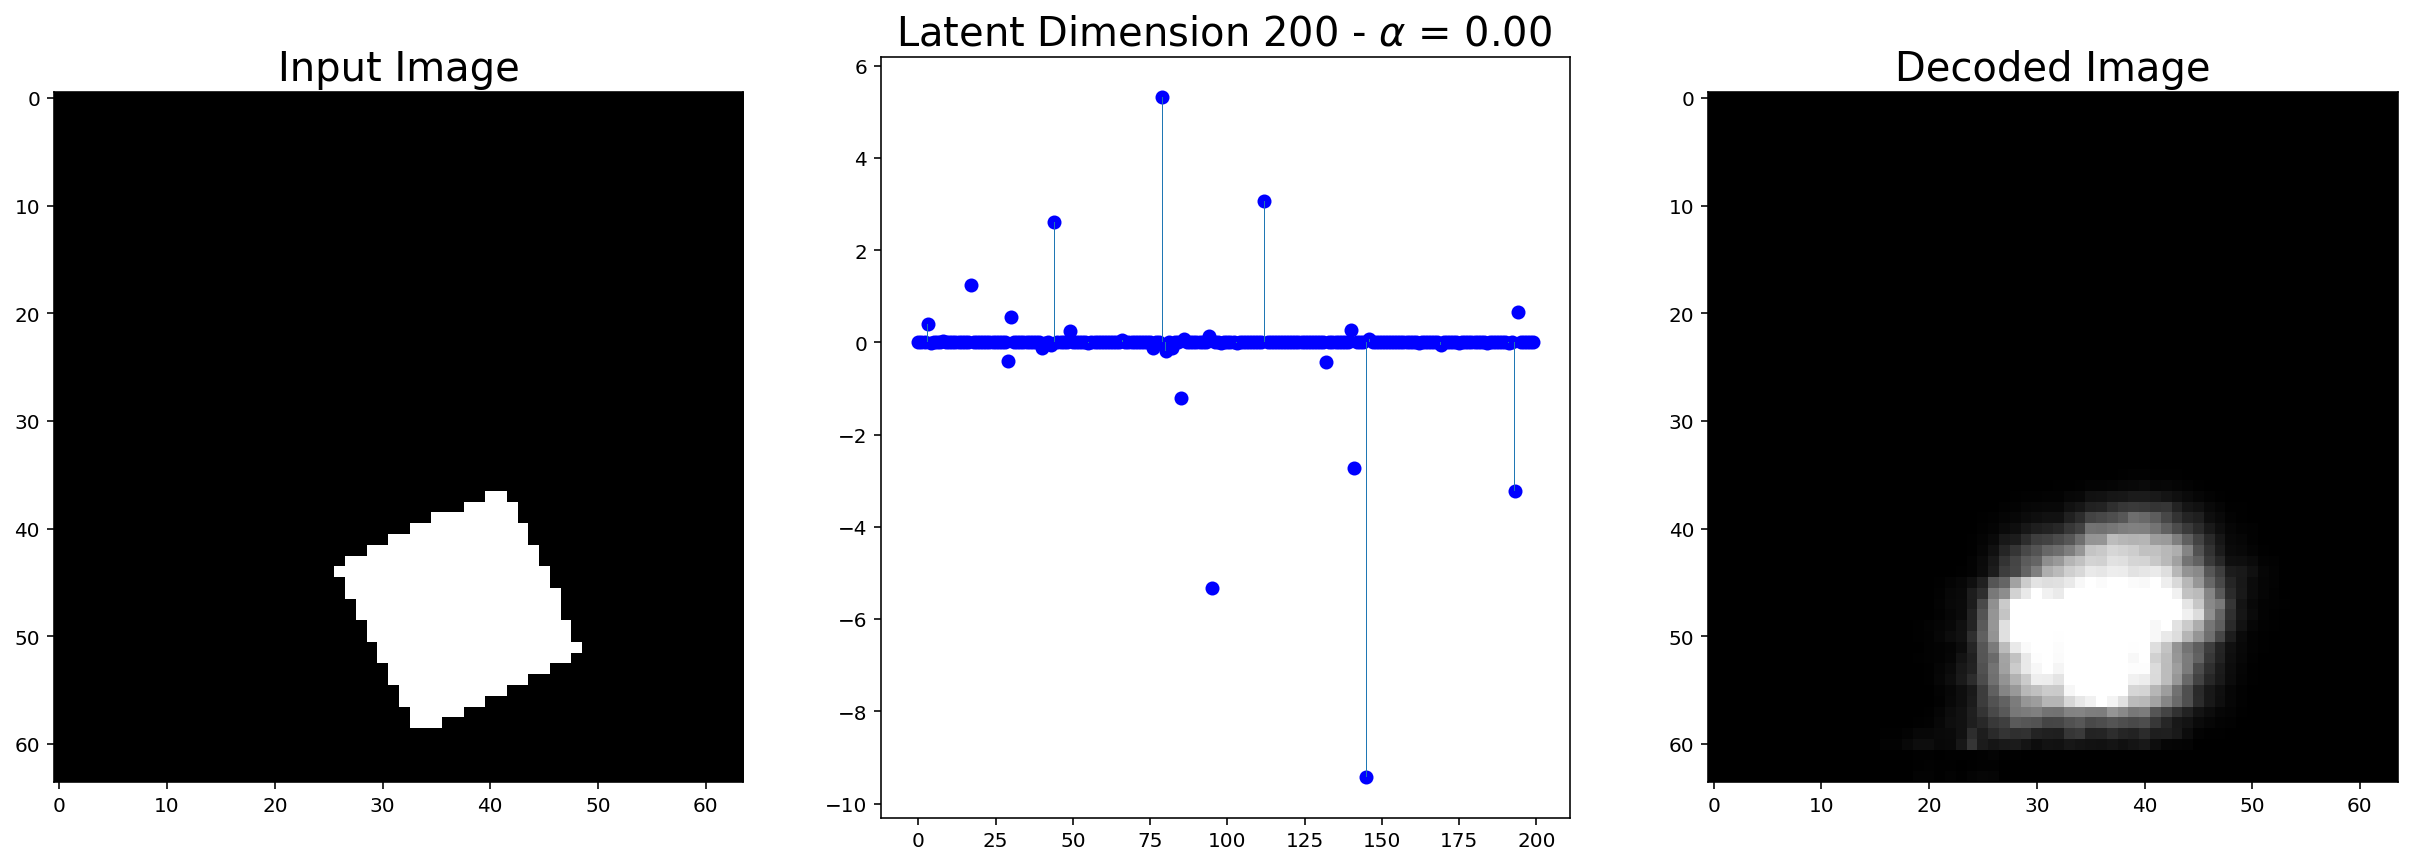

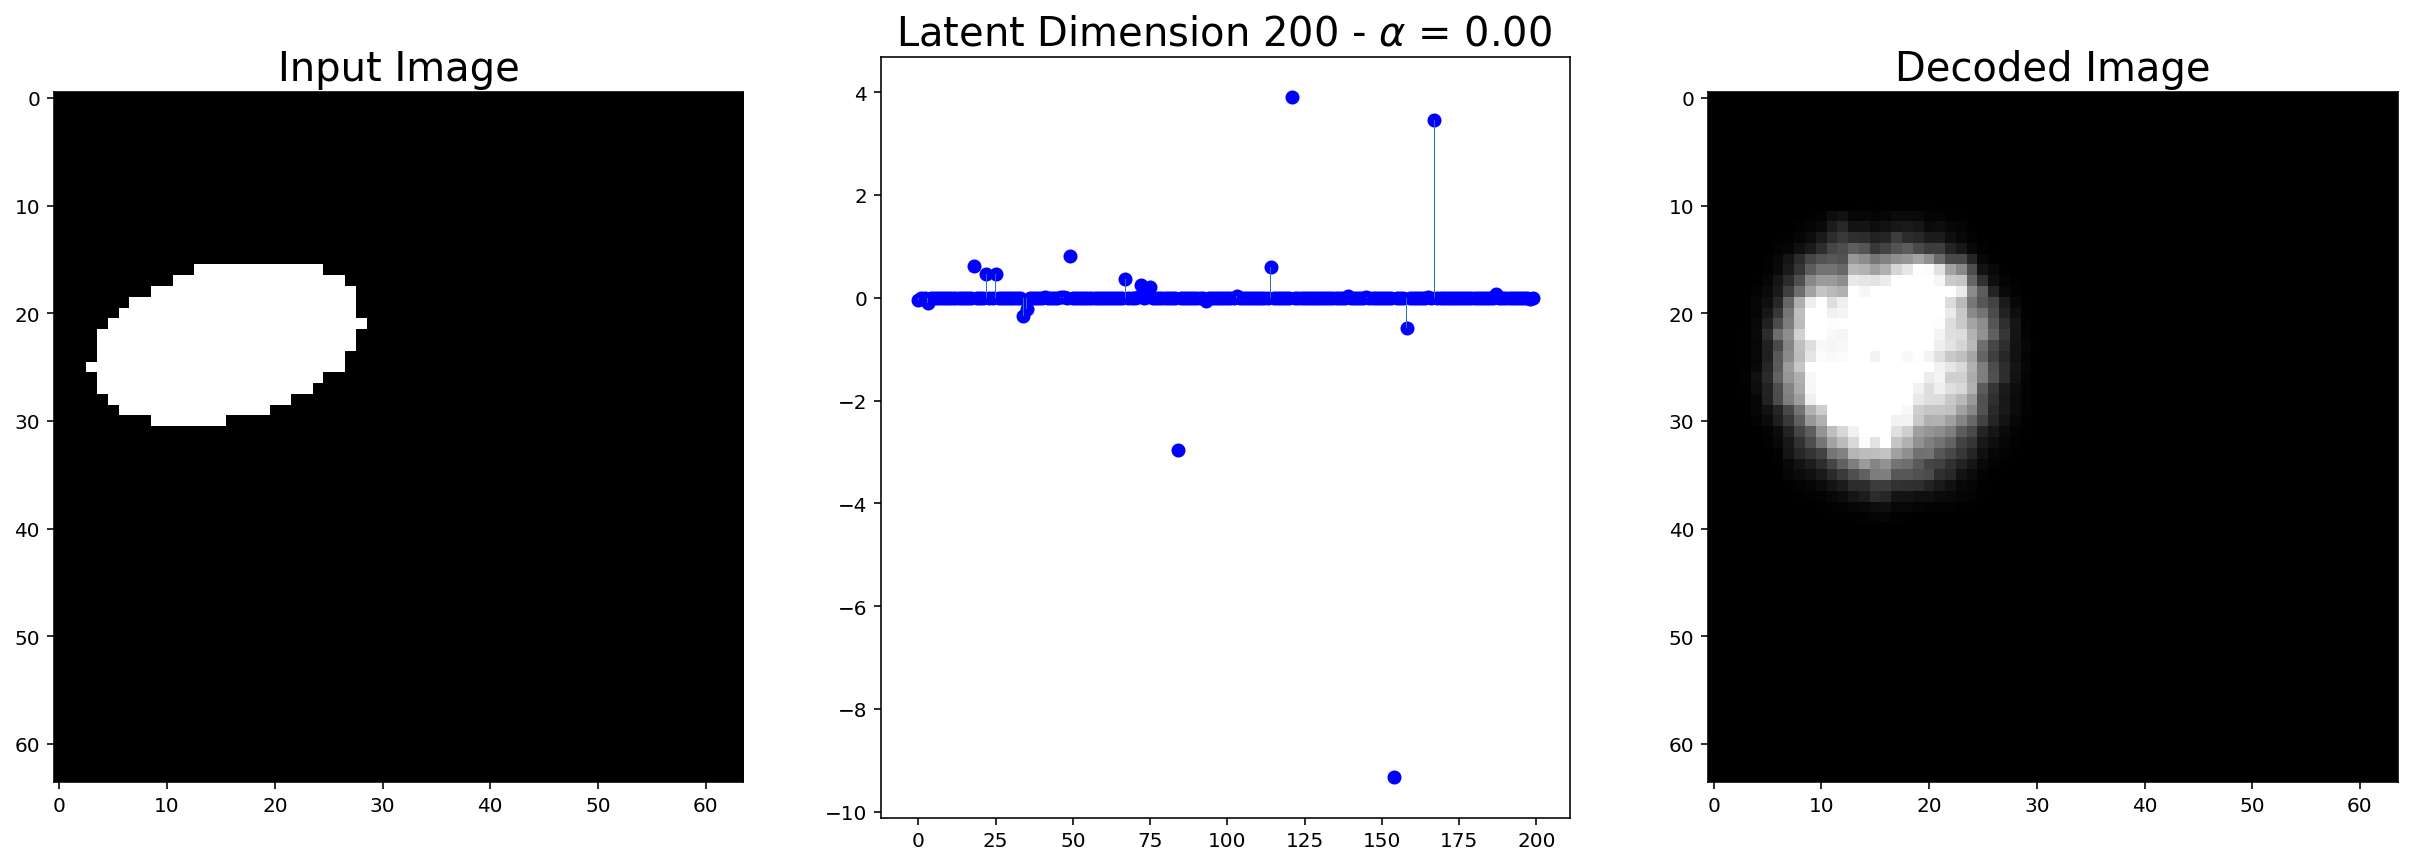

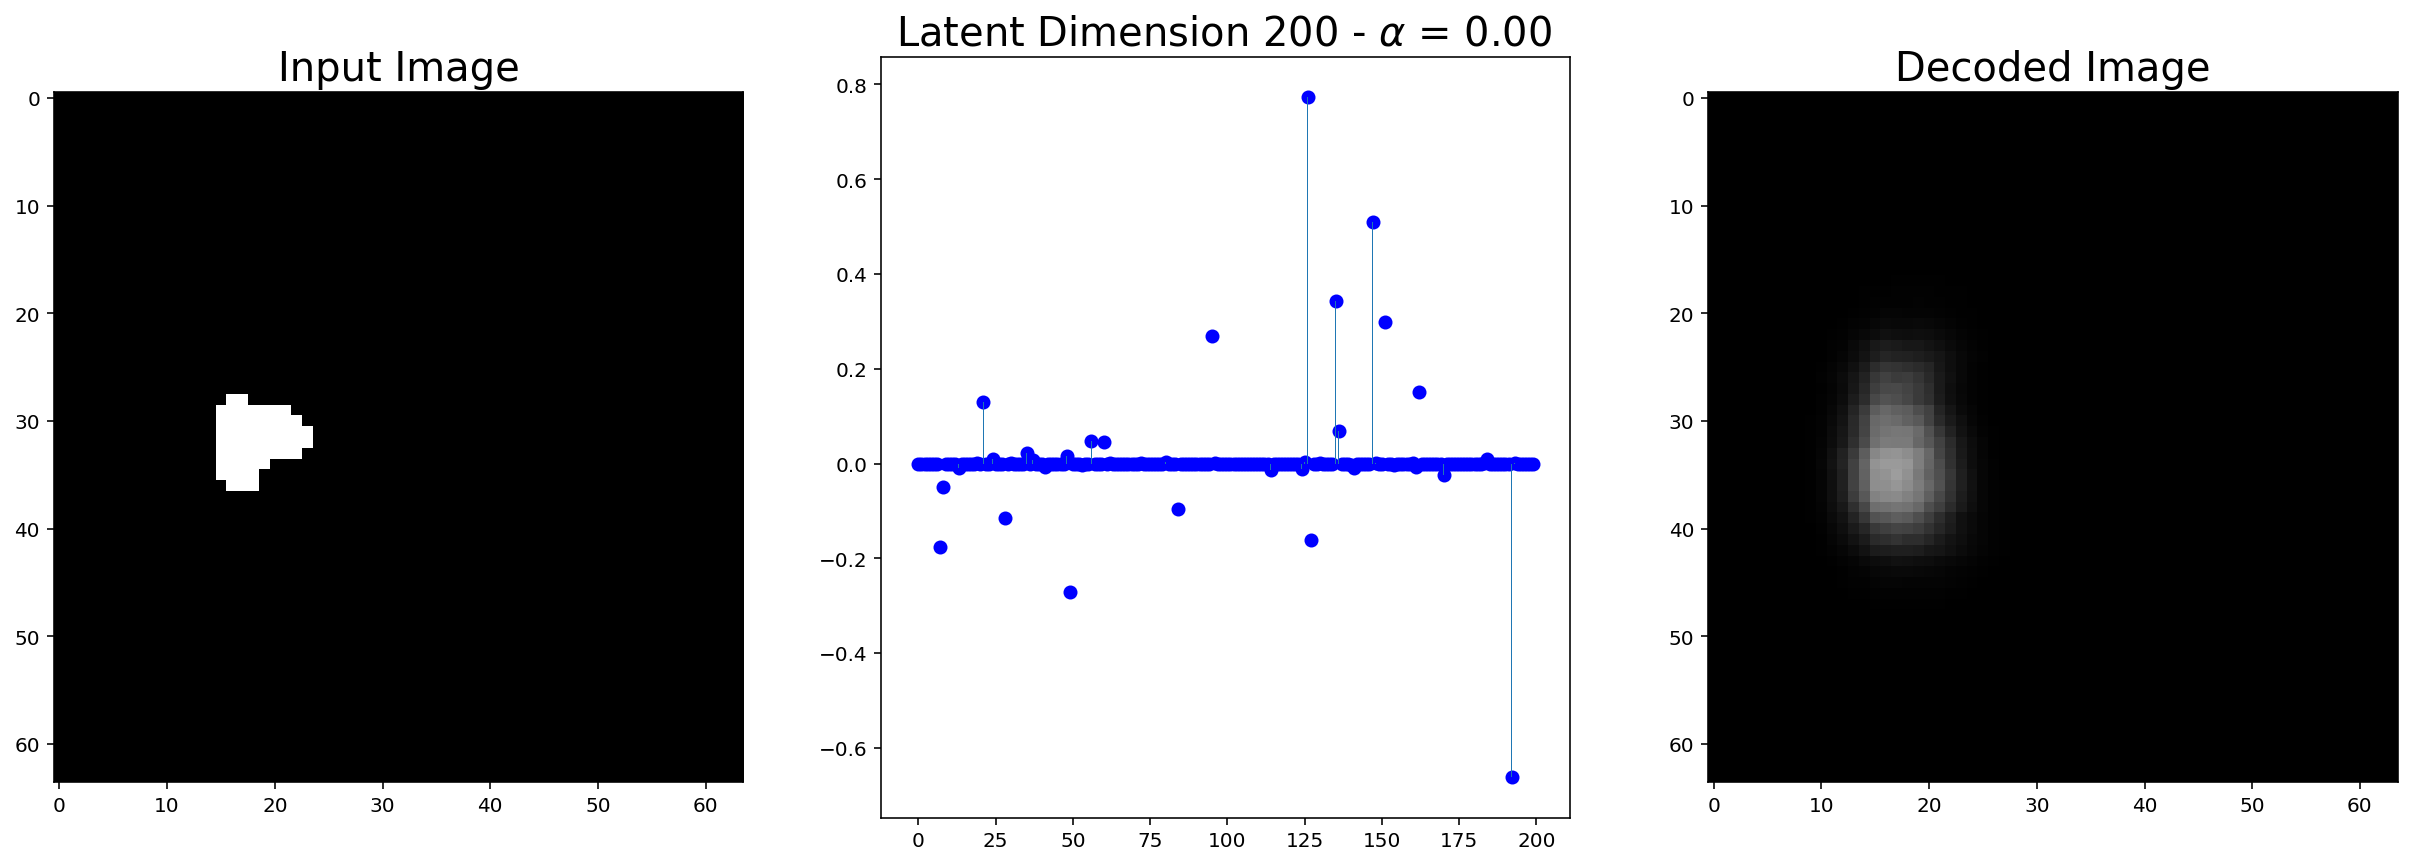

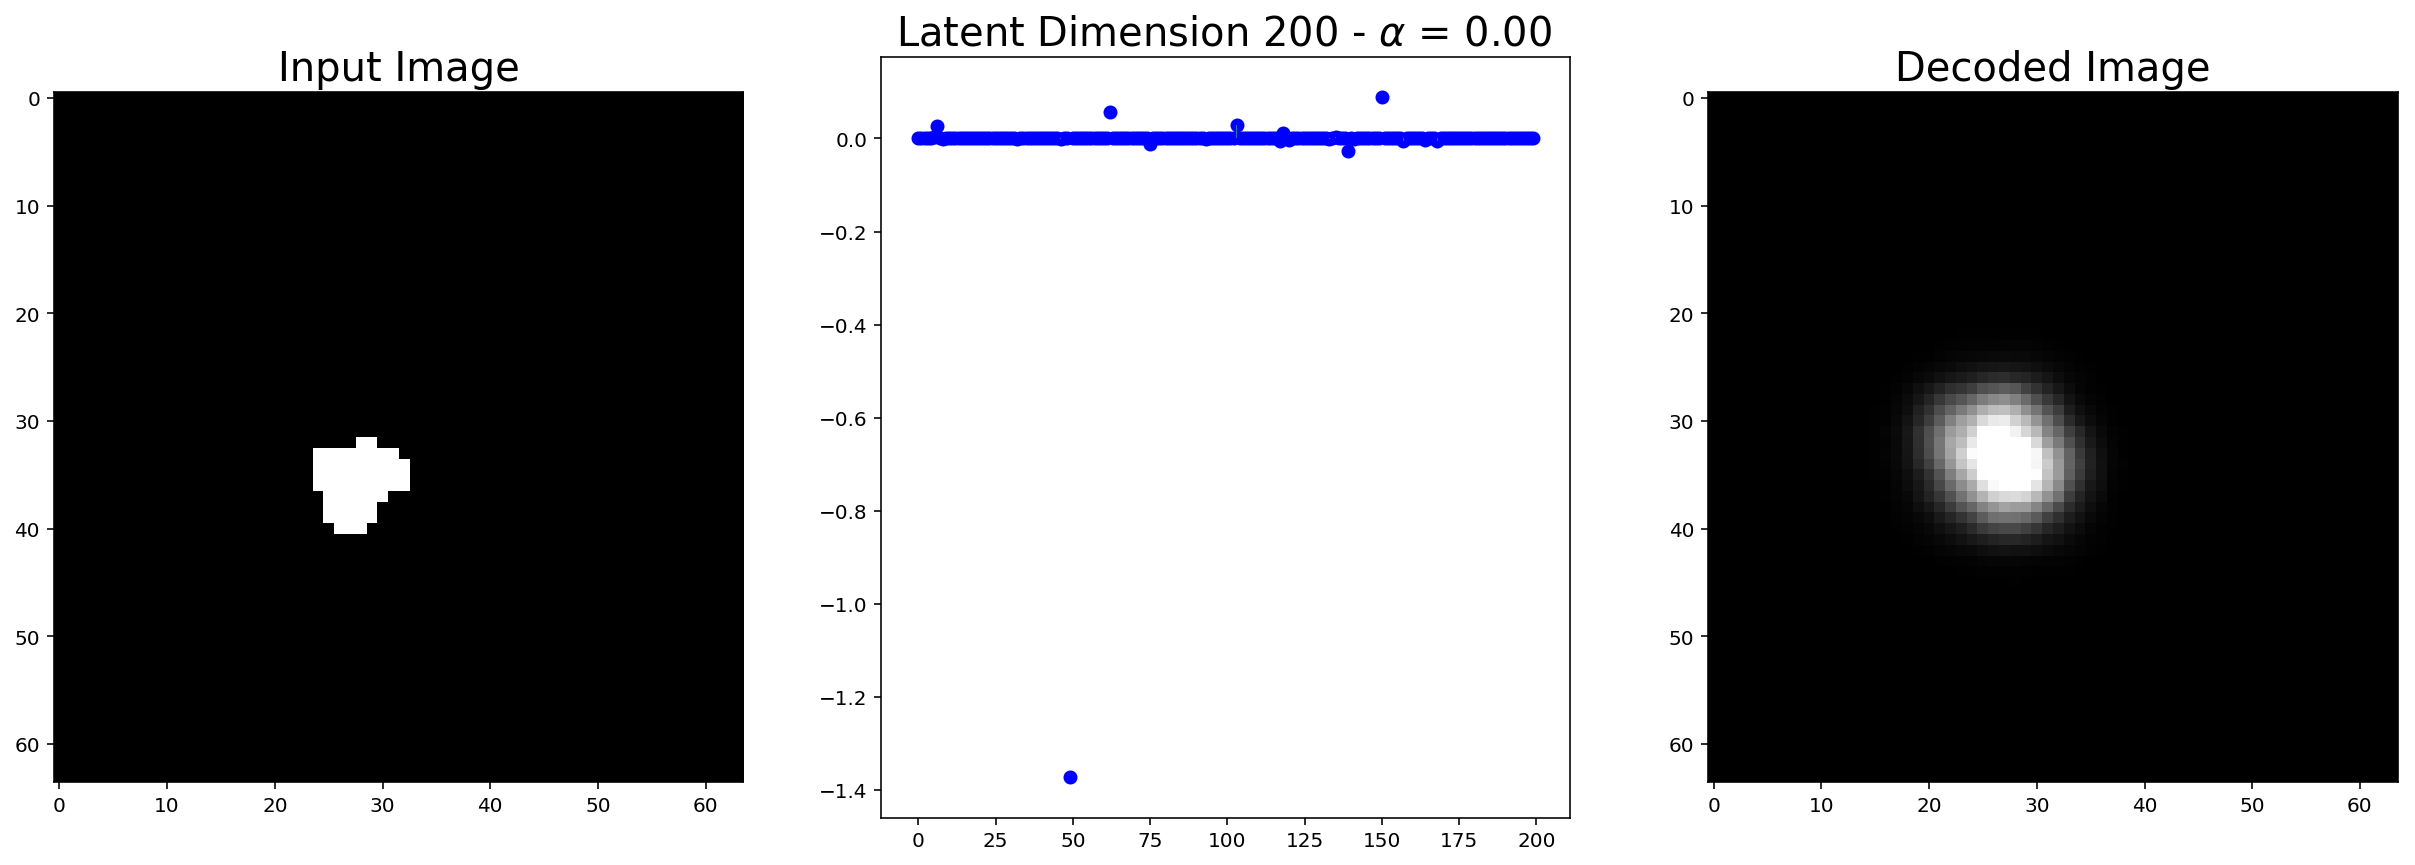

In [54]:
for i in range(15):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

In [14]:
images, _ = iter(test_loader).next()

In [57]:
import random

def plot_horizontal_traversal(image, vsc, latent_sz, length, 
                              delta, threshold=1e-4, plot_all=False, 
                              plot_list=None, width=1/4):
    image = vsc.transform(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.inverse_transform(vsc.model.decode(z))
    z_ = z.cpu().detach().numpy()[0]
    
    plt.bar(np.arange(latent_sz), height=z_, width=width, align='center')
    plt.scatter(np.arange(latent_sz), z_, color='blue')
    plt.show()
    
    non_zero = [i for i in range(latent_sz) if np.abs(z_[i]) > threshold]
    ind = random.choice(non_zero)
    print(ind, non_zero)
    
    if not plot_all:
        non_zero = [ind]
    if plot_list:
        non_zero = plot_list
    
    hor_traversal = []
    for ind in non_zero:
        images = []
        z1 = z.clone()
        for i in range(length):
            img = to_numpy(vsc.model.decode(z1), vsc)
            img = np.transpose(img, (1,2,0))
            img[:,0] = 1
            img[:,-1] = 1
            img[0,:] = 1
            img[-1,:] = 1
            images.append(img)
            z1[0, ind] = z1[0, ind] + delta if z[0,ind] < 0 else z1[0, ind] - delta

        hor_traversal.append(np.concatenate(images, axis=1))
    traversal = np.concatenate(hor_traversal, axis=0)
    plt.figure(figsize=(15,25))
    plt.axis('off')
    plt.imshow(traversal * 255)
    plt.show()
#     return traversal

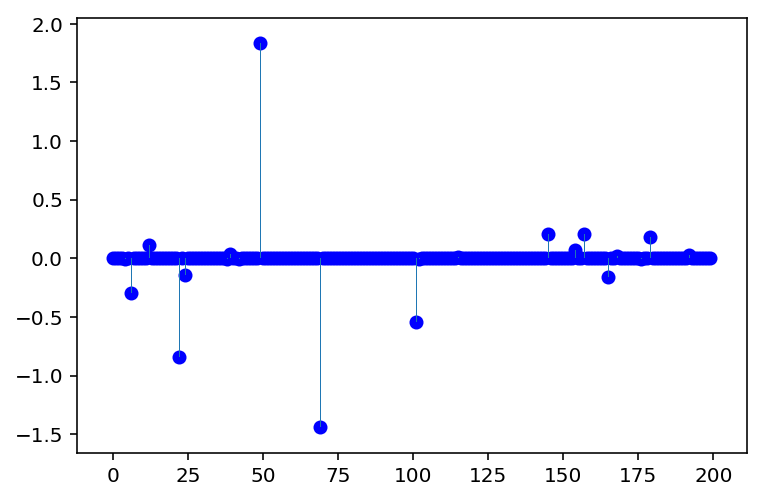

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


179 [6, 12, 22, 24, 39, 49, 69, 101, 145, 154, 157, 165, 179]


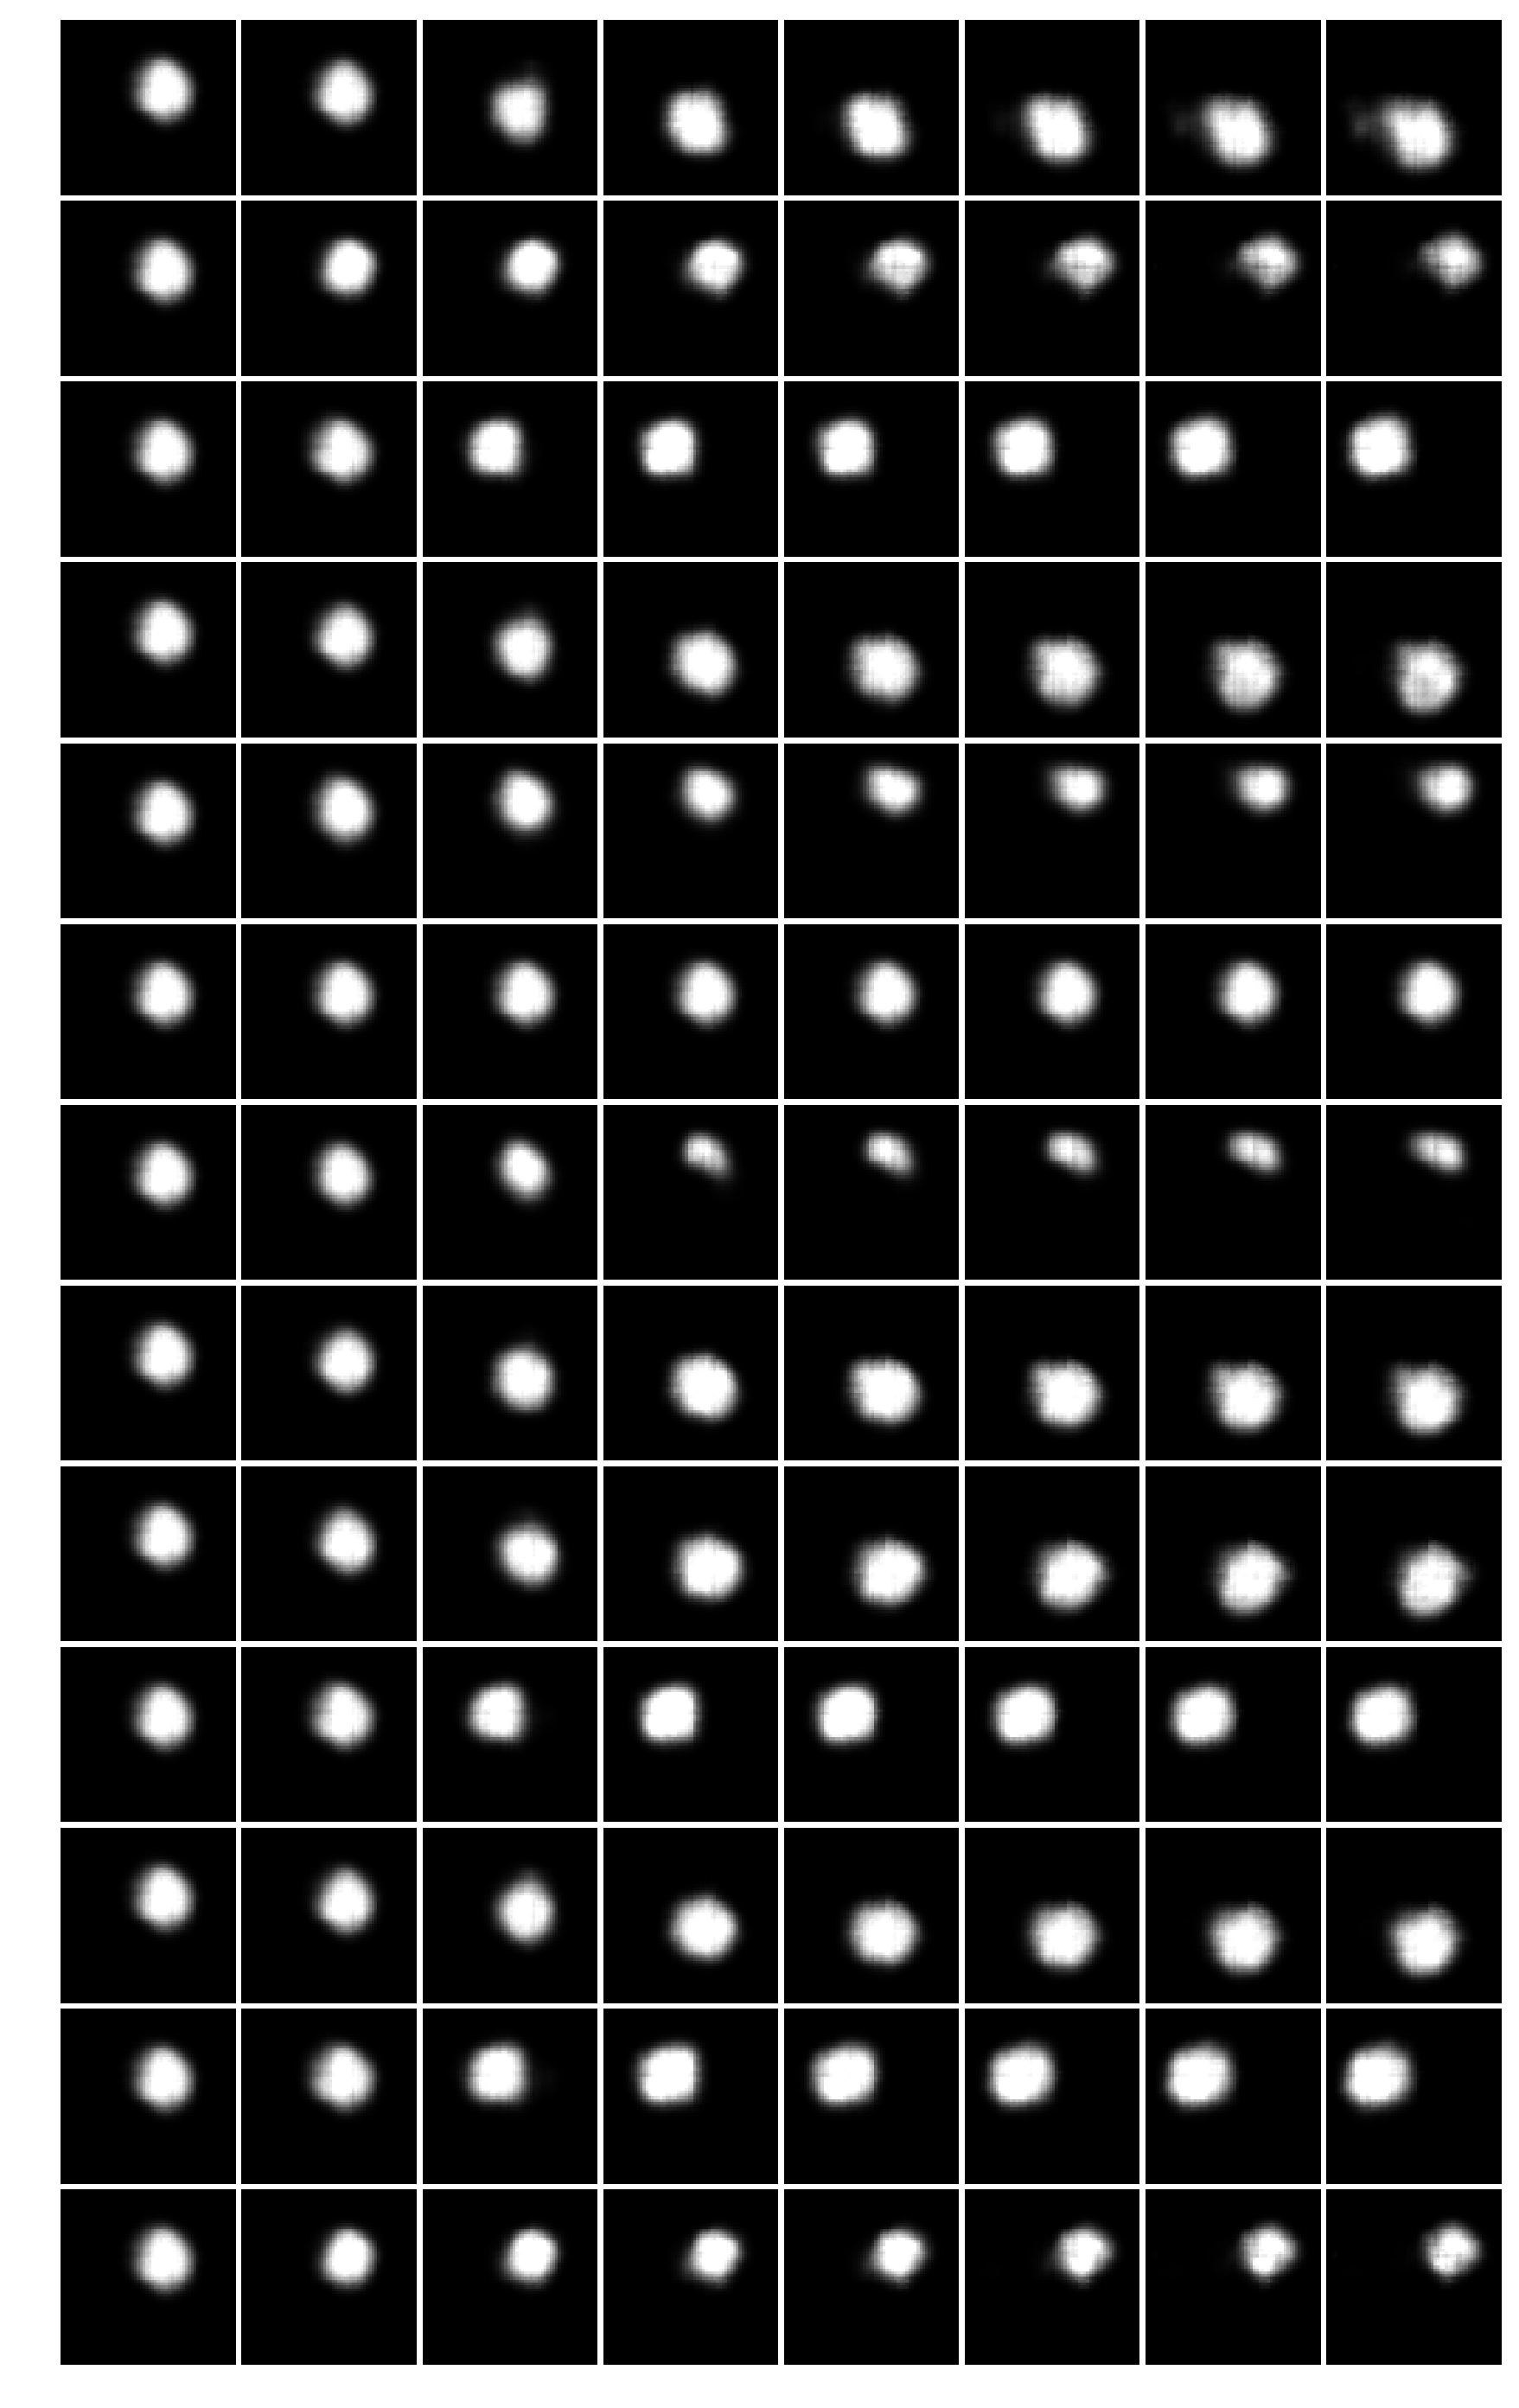

In [63]:
plot_horizontal_traversal(images[3][None,:], convvsc, 
                          model_params['latent_sz'], length=8, 
                          delta=0.7, threshold=3e-2,
                          plot_all=True, 
                          plot_list=None)

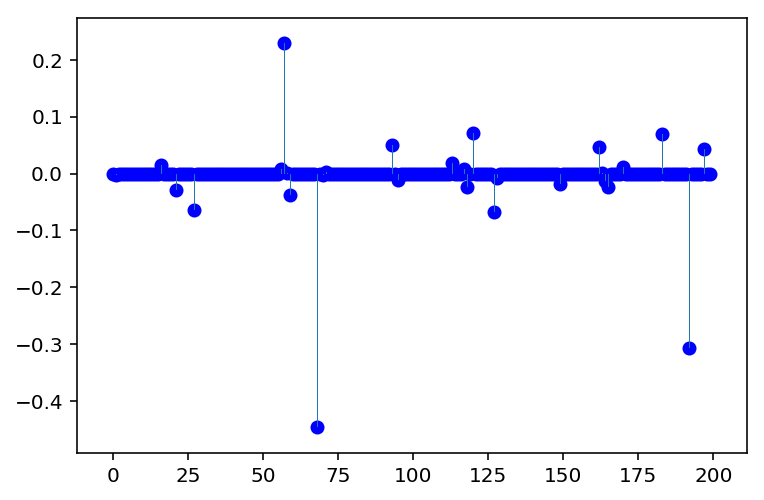

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


162 [27, 57, 59, 68, 93, 120, 127, 162, 183, 192, 197]


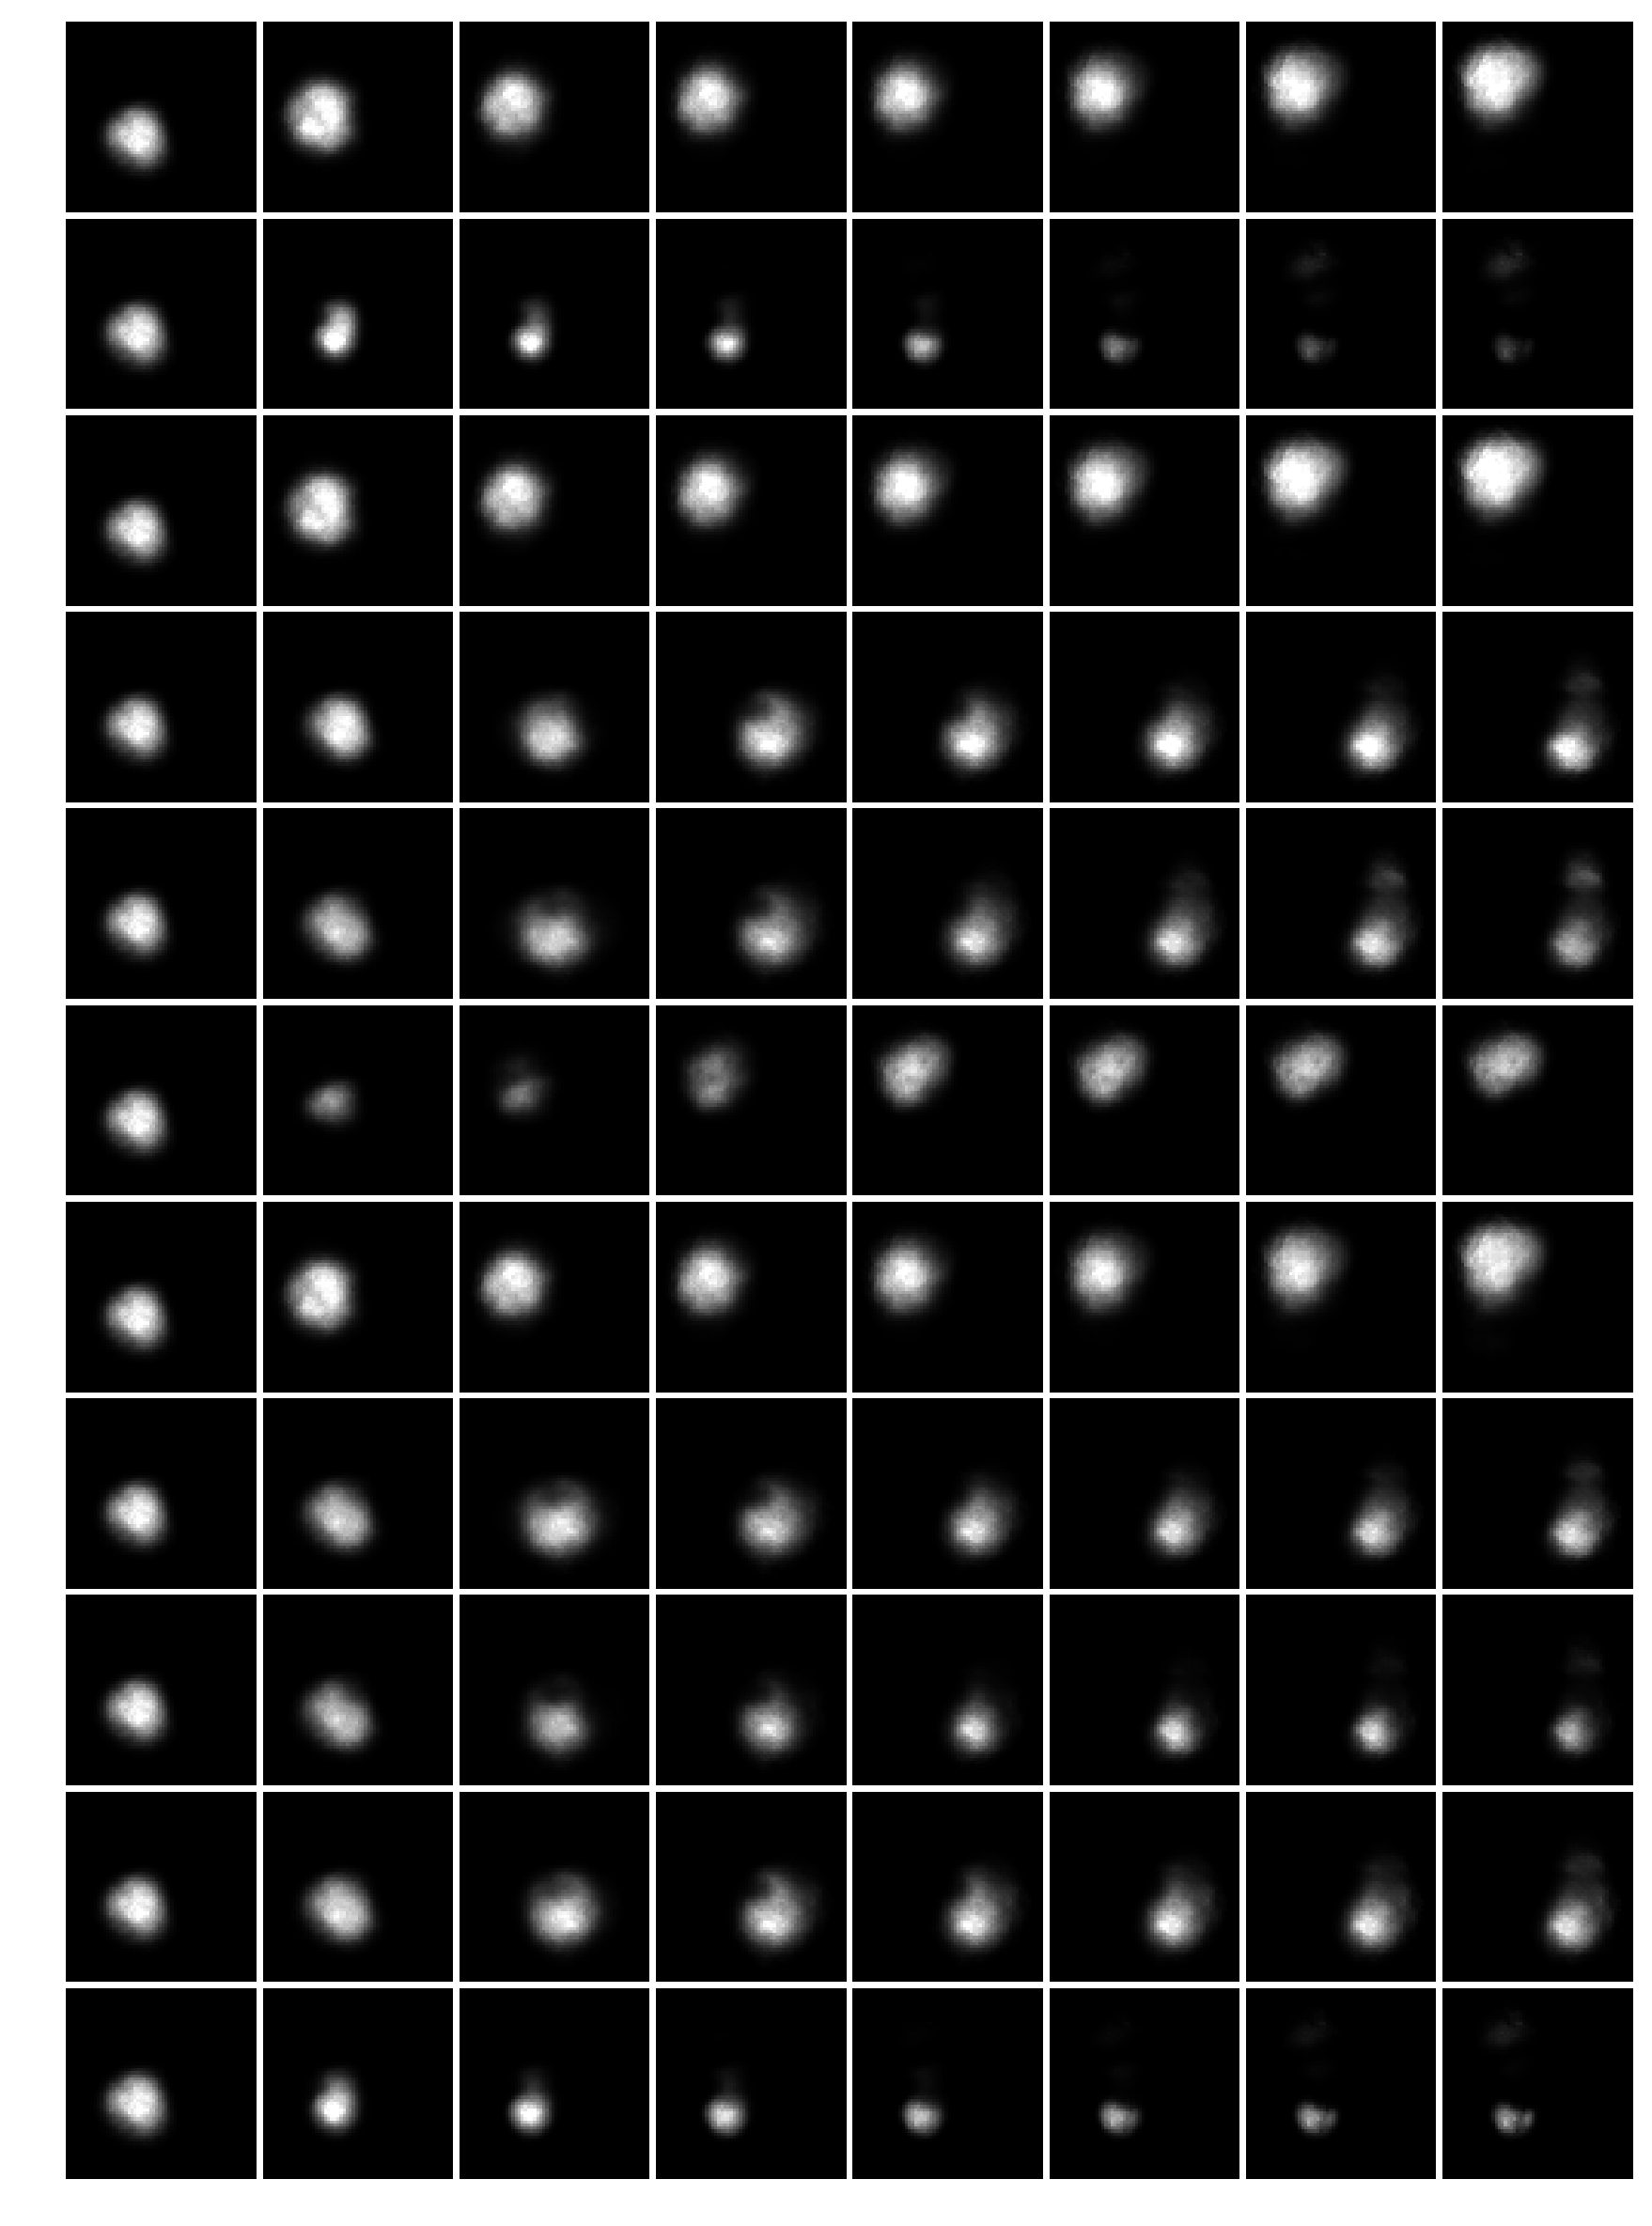

In [41]:
plot_horizontal_traversal(images[4][None,:], convvsc, 
                          model_params['latent_sz'], length=8, 
                          delta=0.5, threshold=3e-2,
                          plot_all=True, 
                          plot_list=None)

In [43]:
vsc = convvsc

## Beta ConvVSC

In [78]:
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 1024,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    
    'alpha': 1e-5,
    'beta': 1.5,
    'beta_delta': -1e-1,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)

In [ ]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 6034.414062
Train Epoch: 1 [160000/600000 (27%)]	Loss: 779.684875


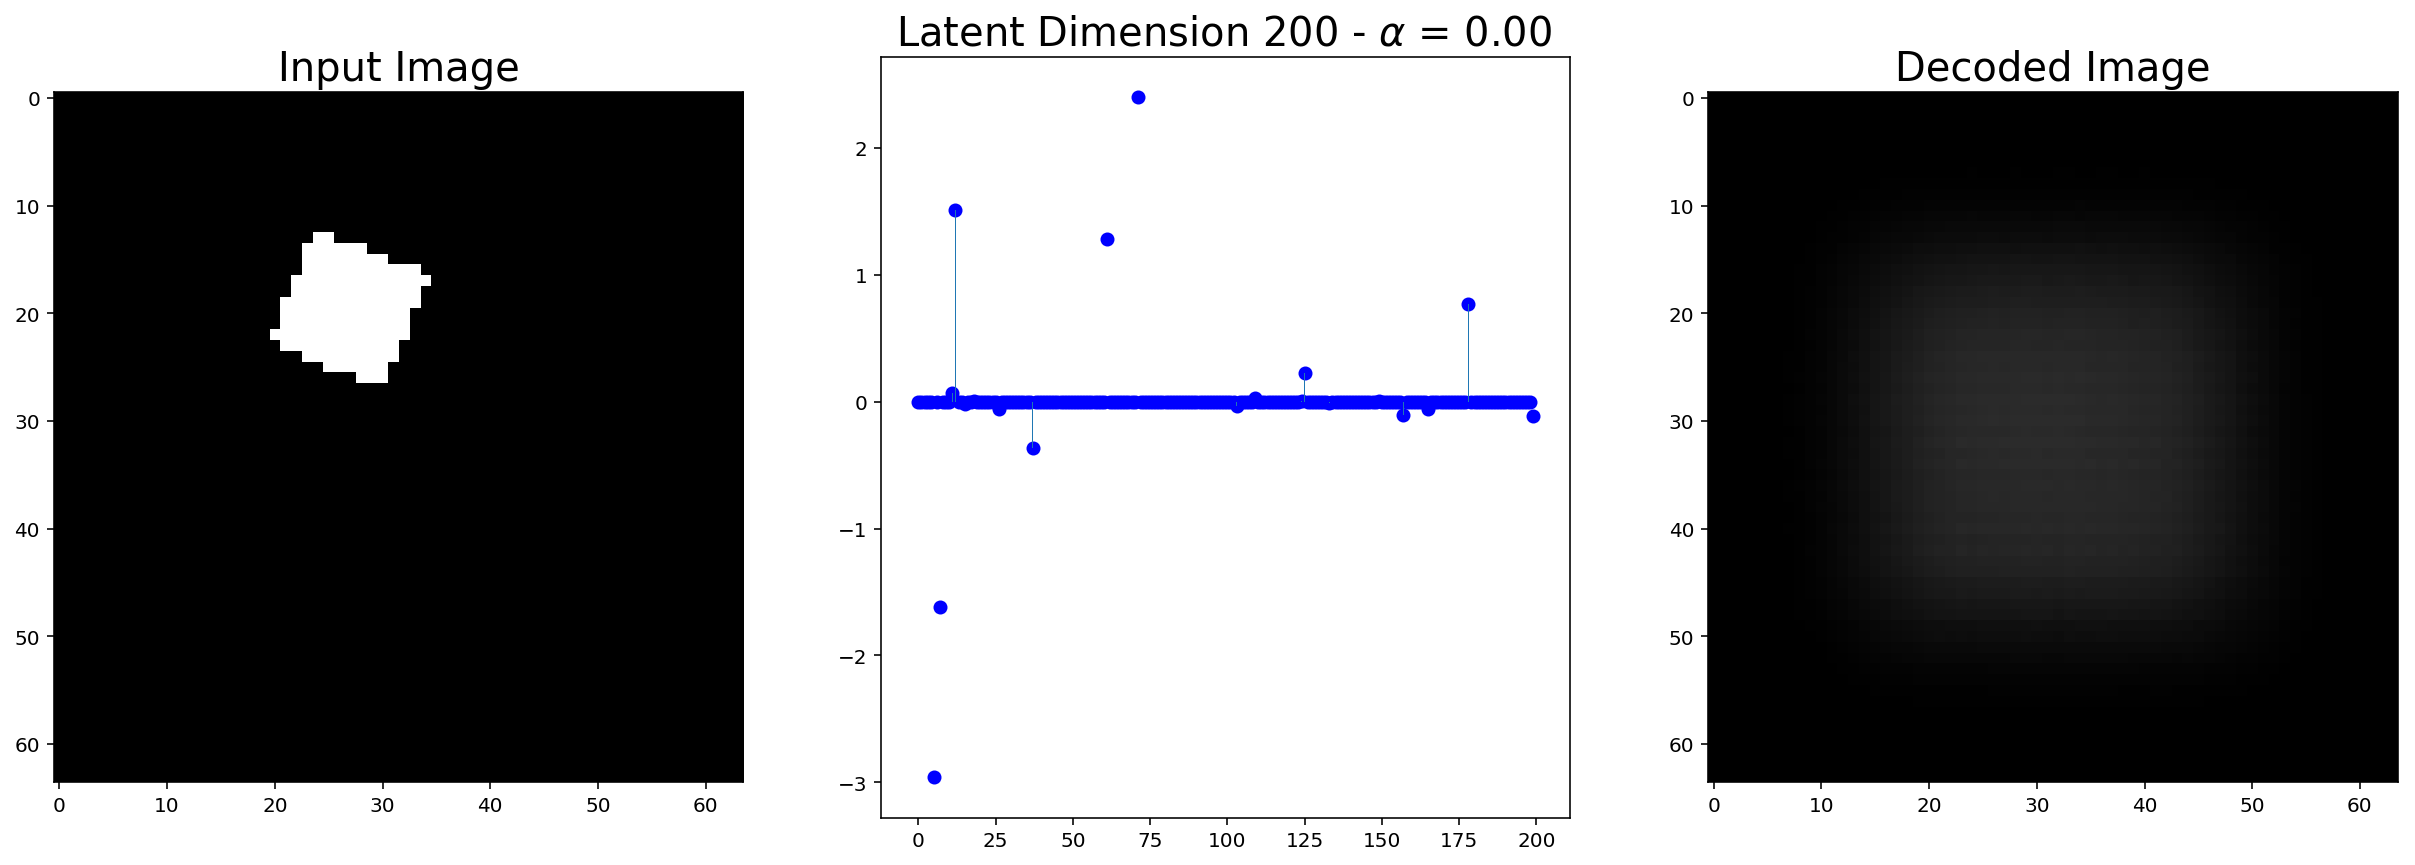

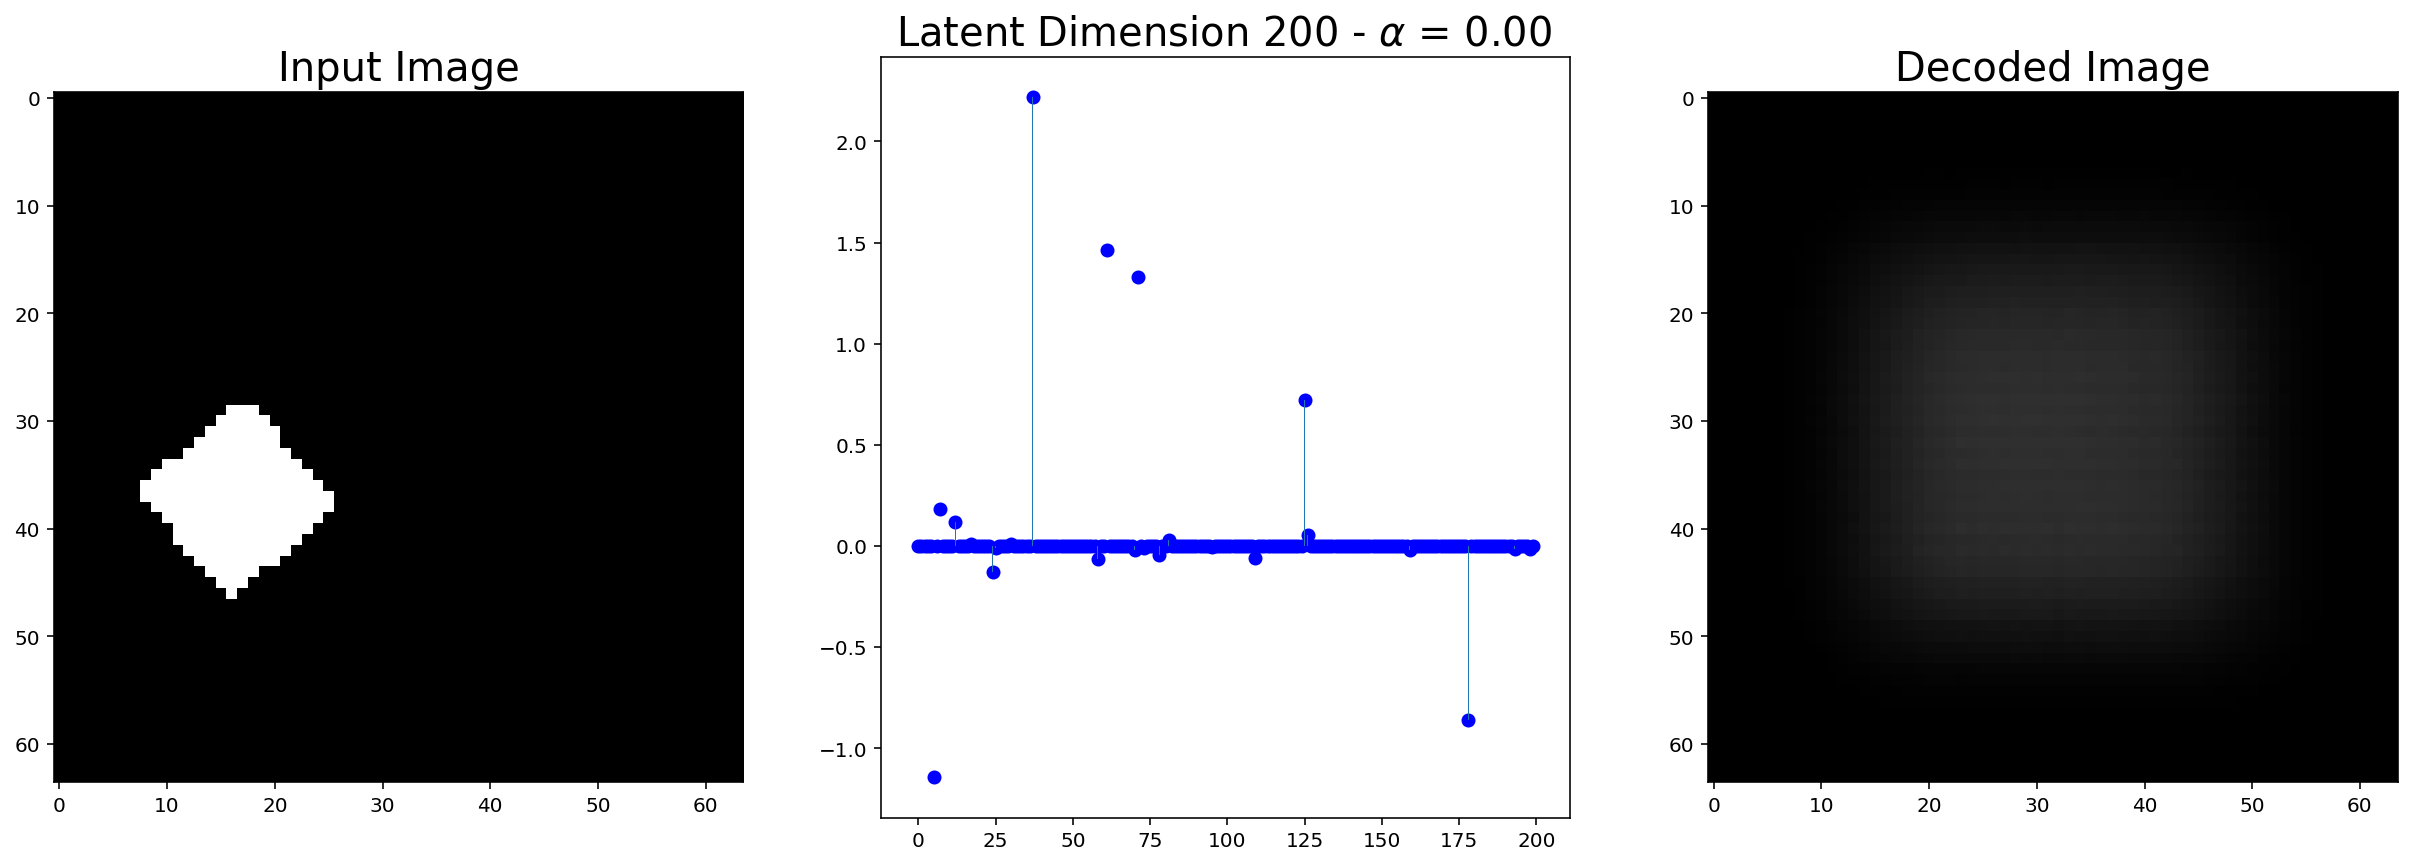

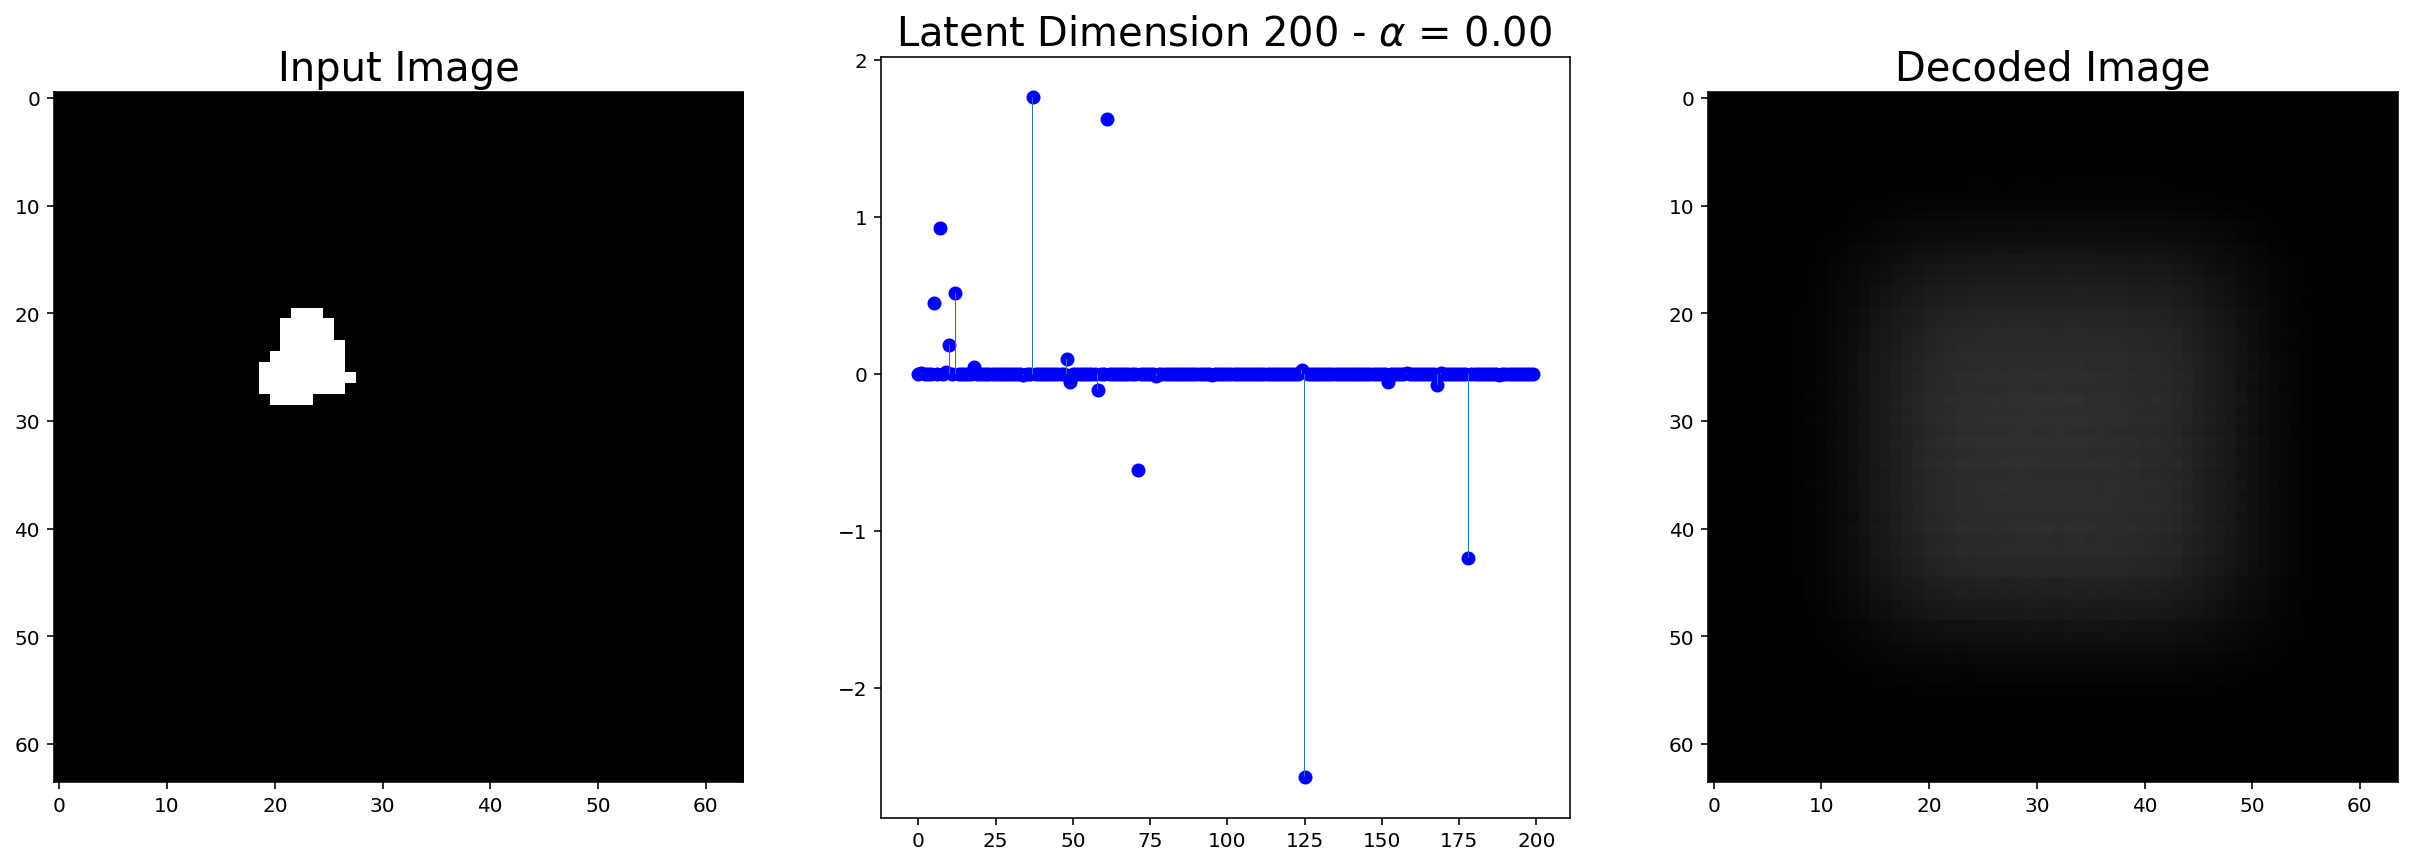

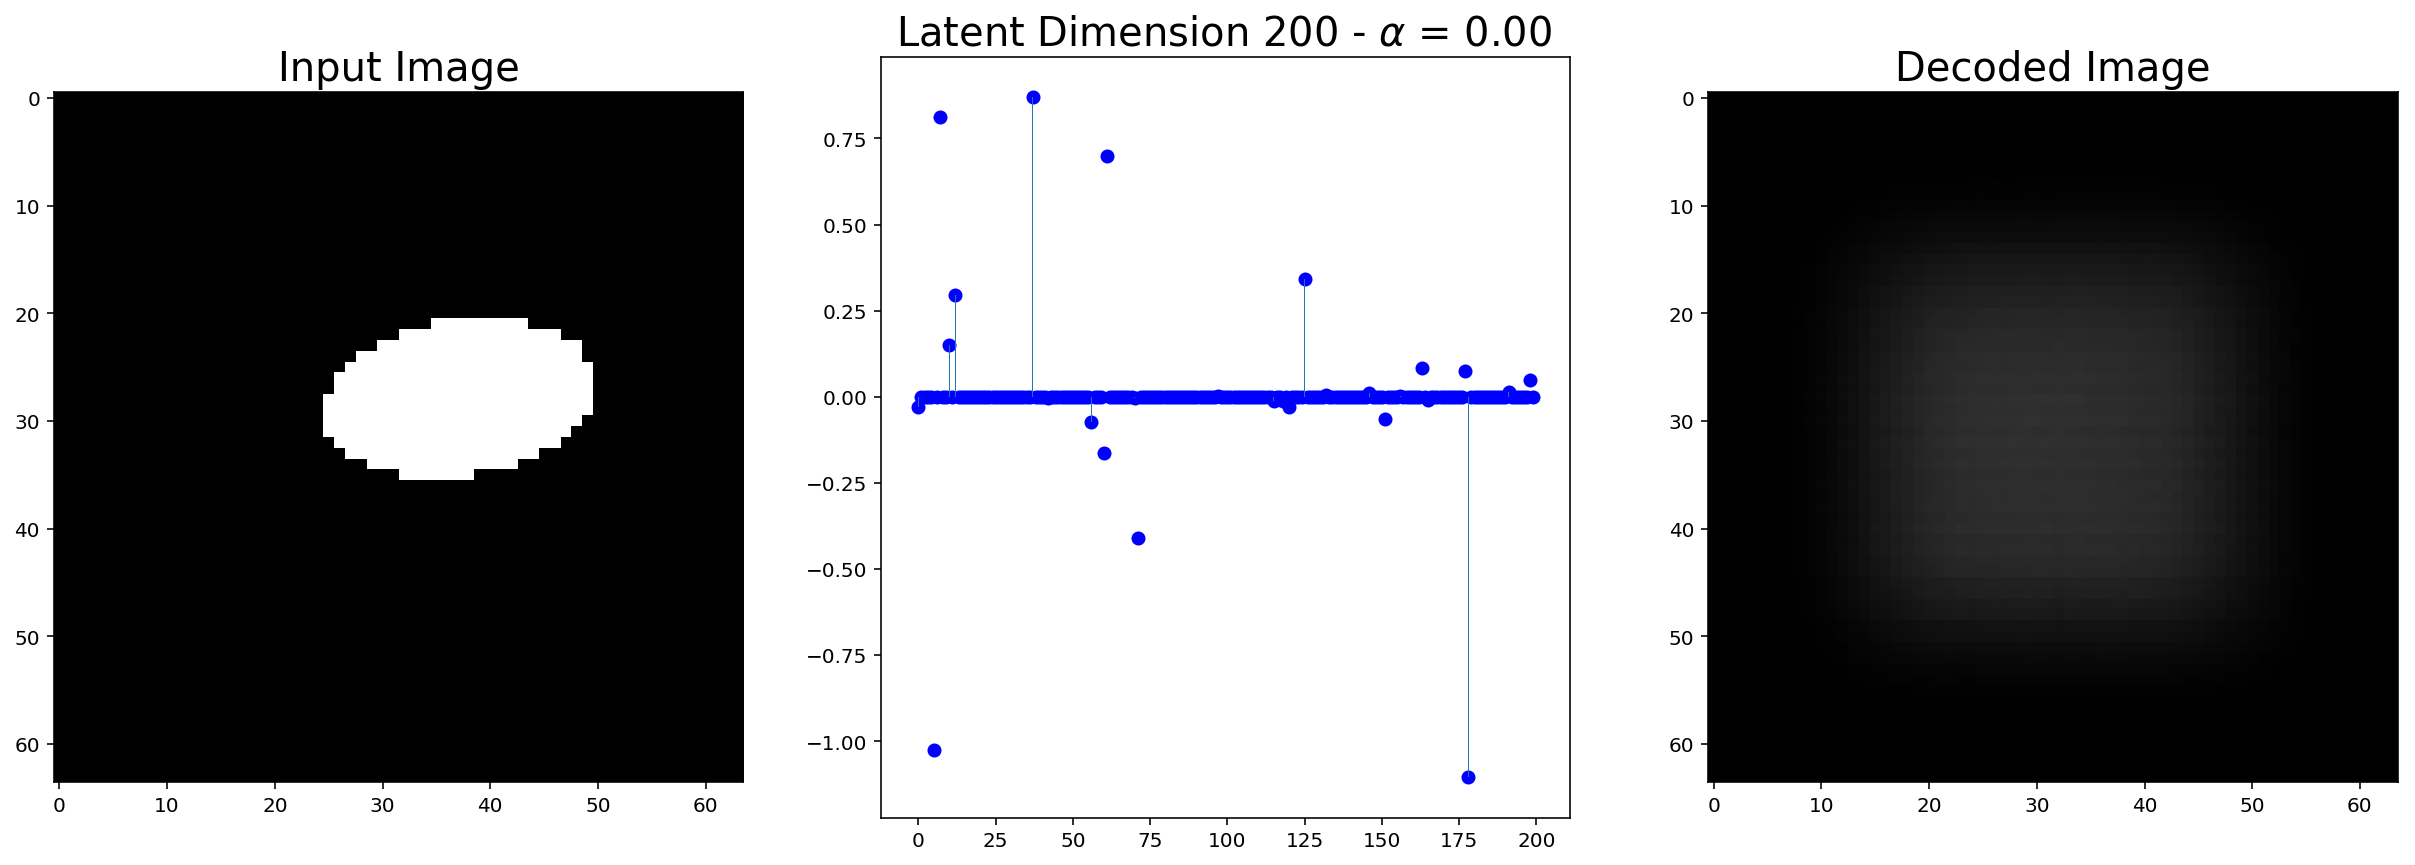

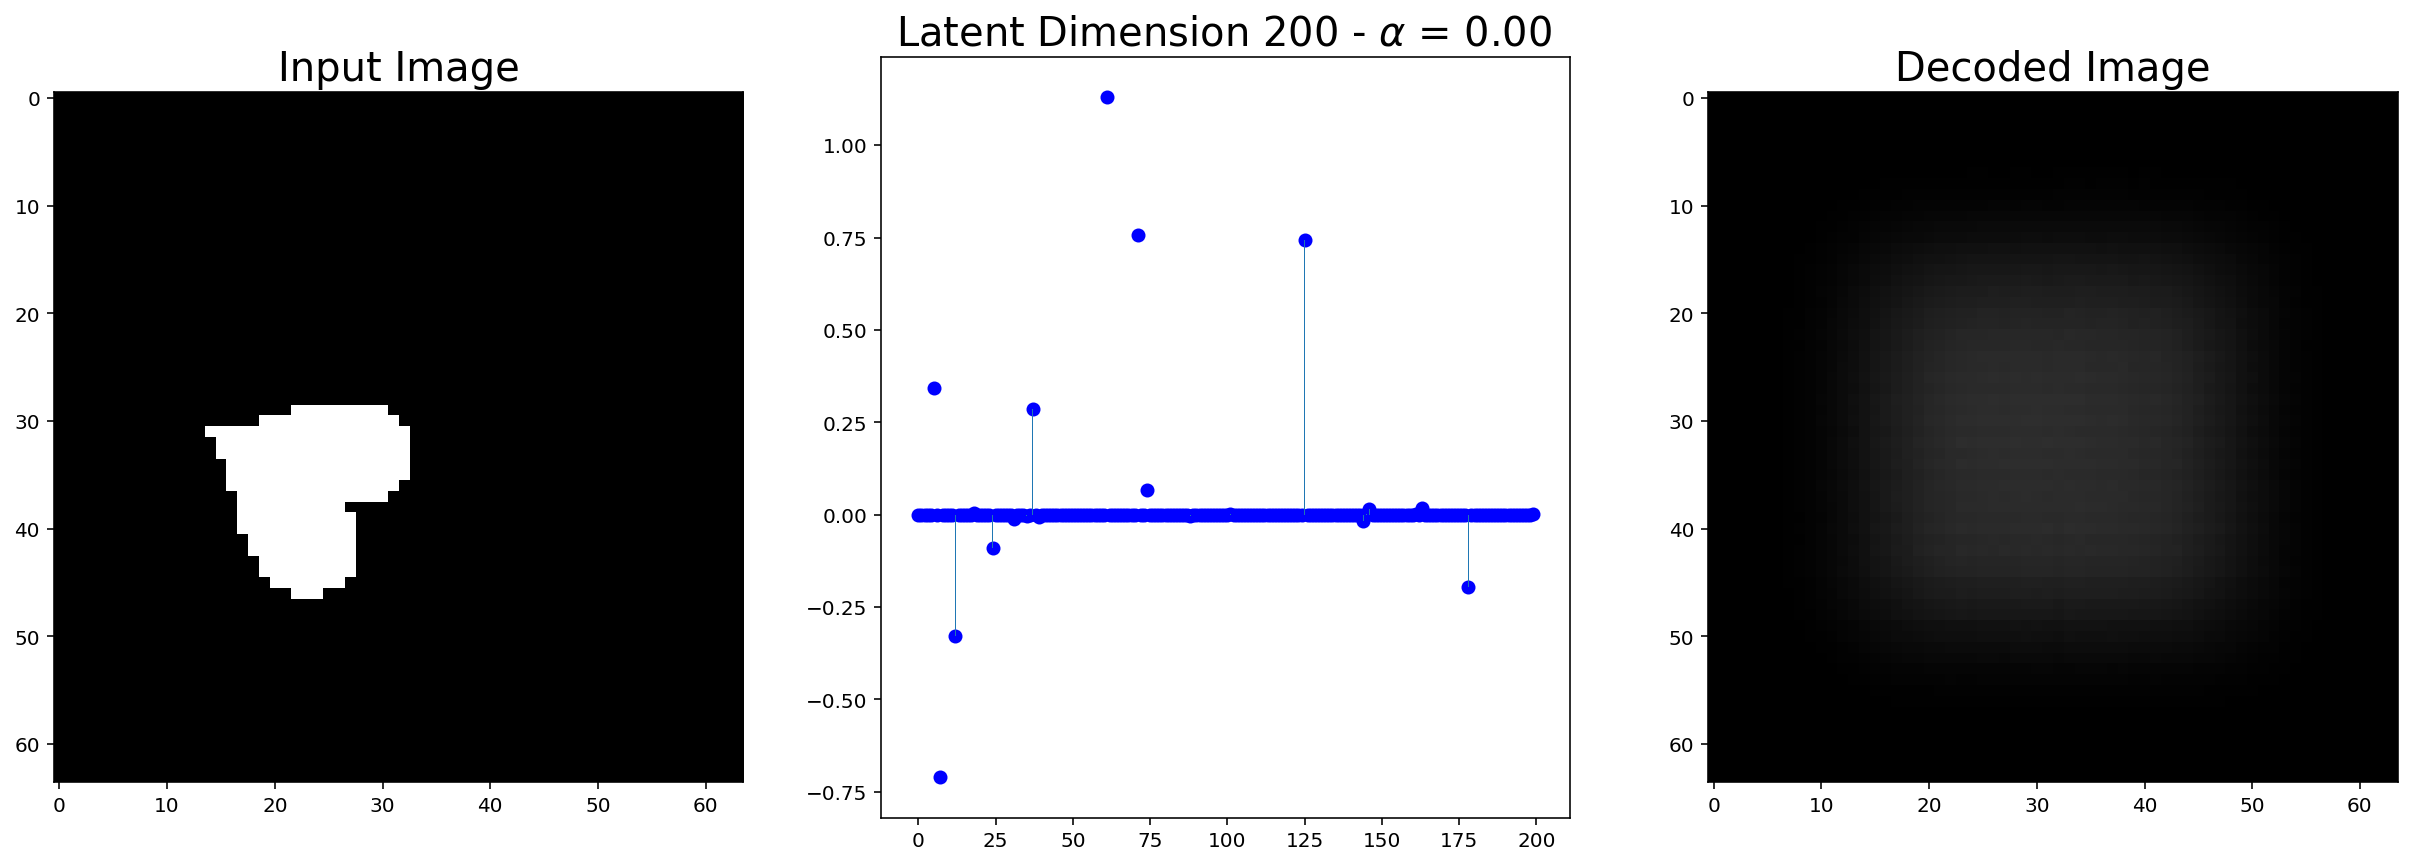

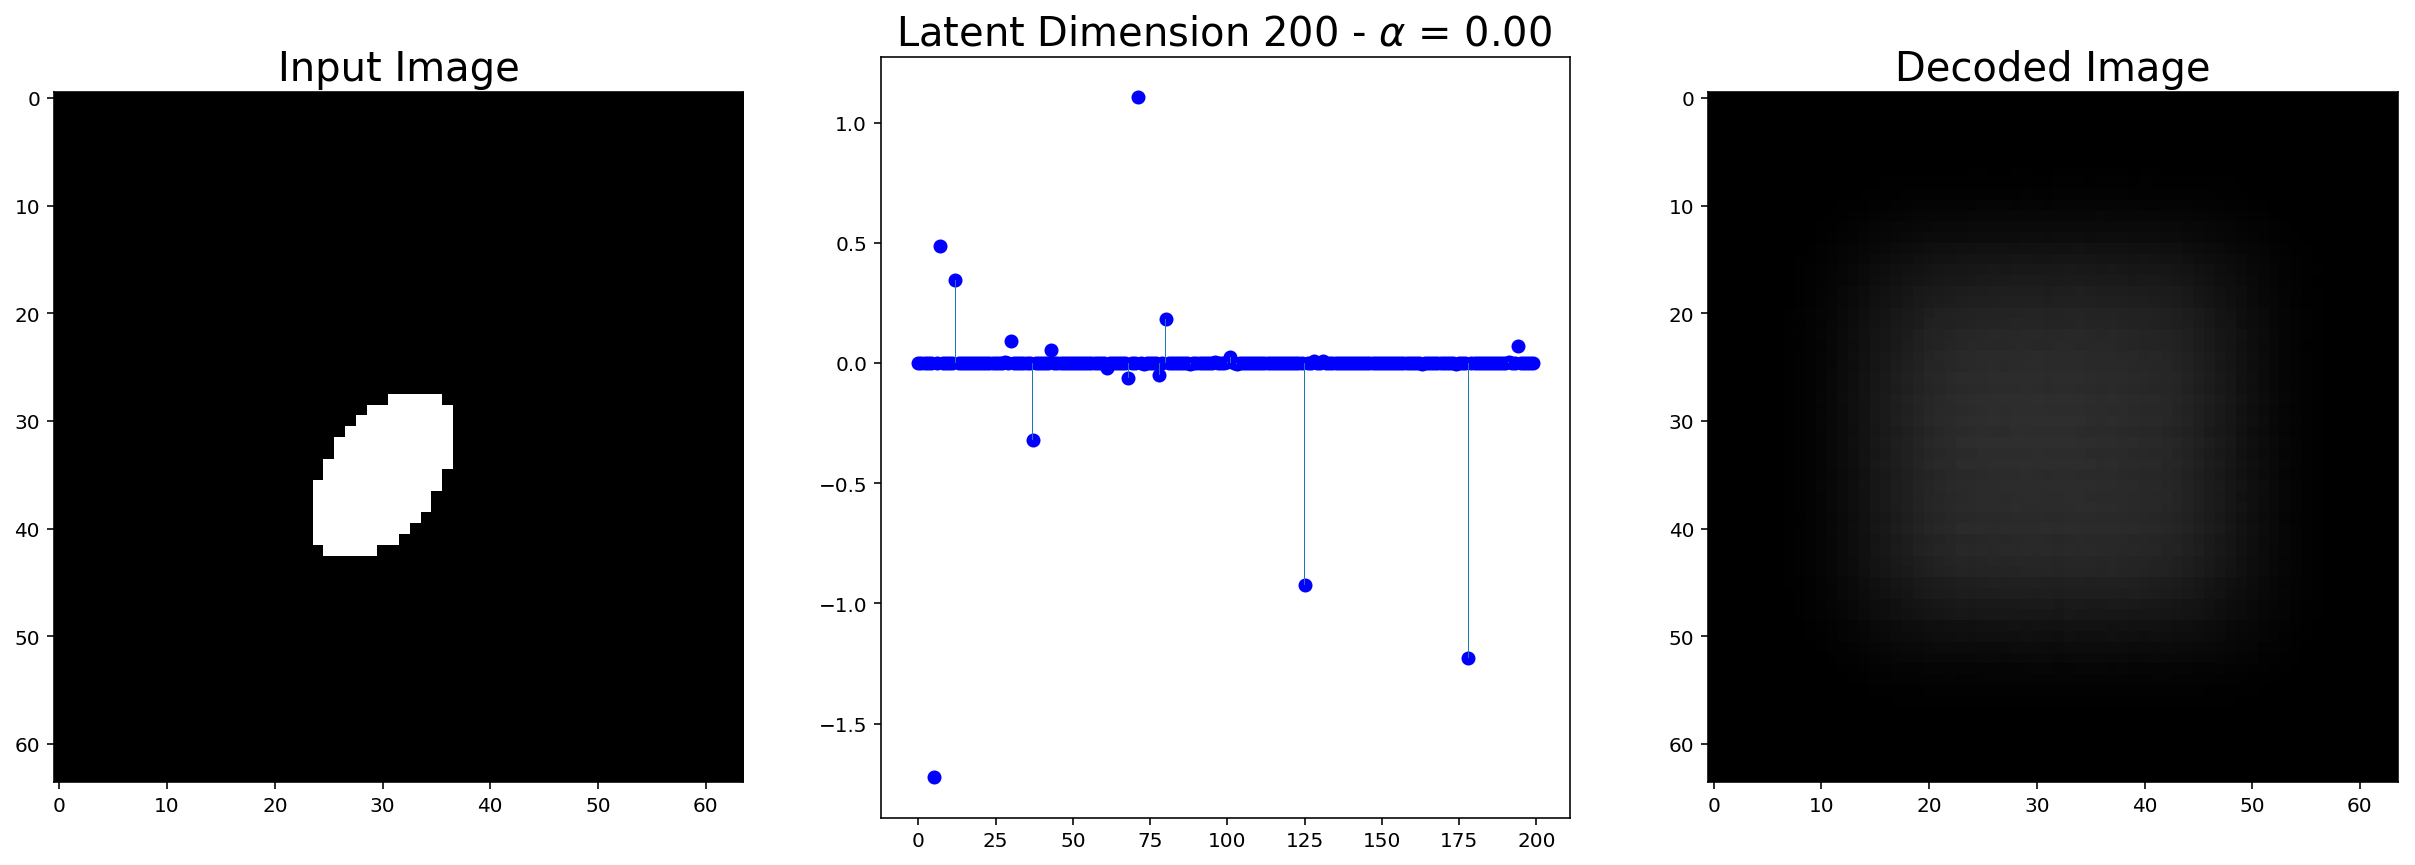

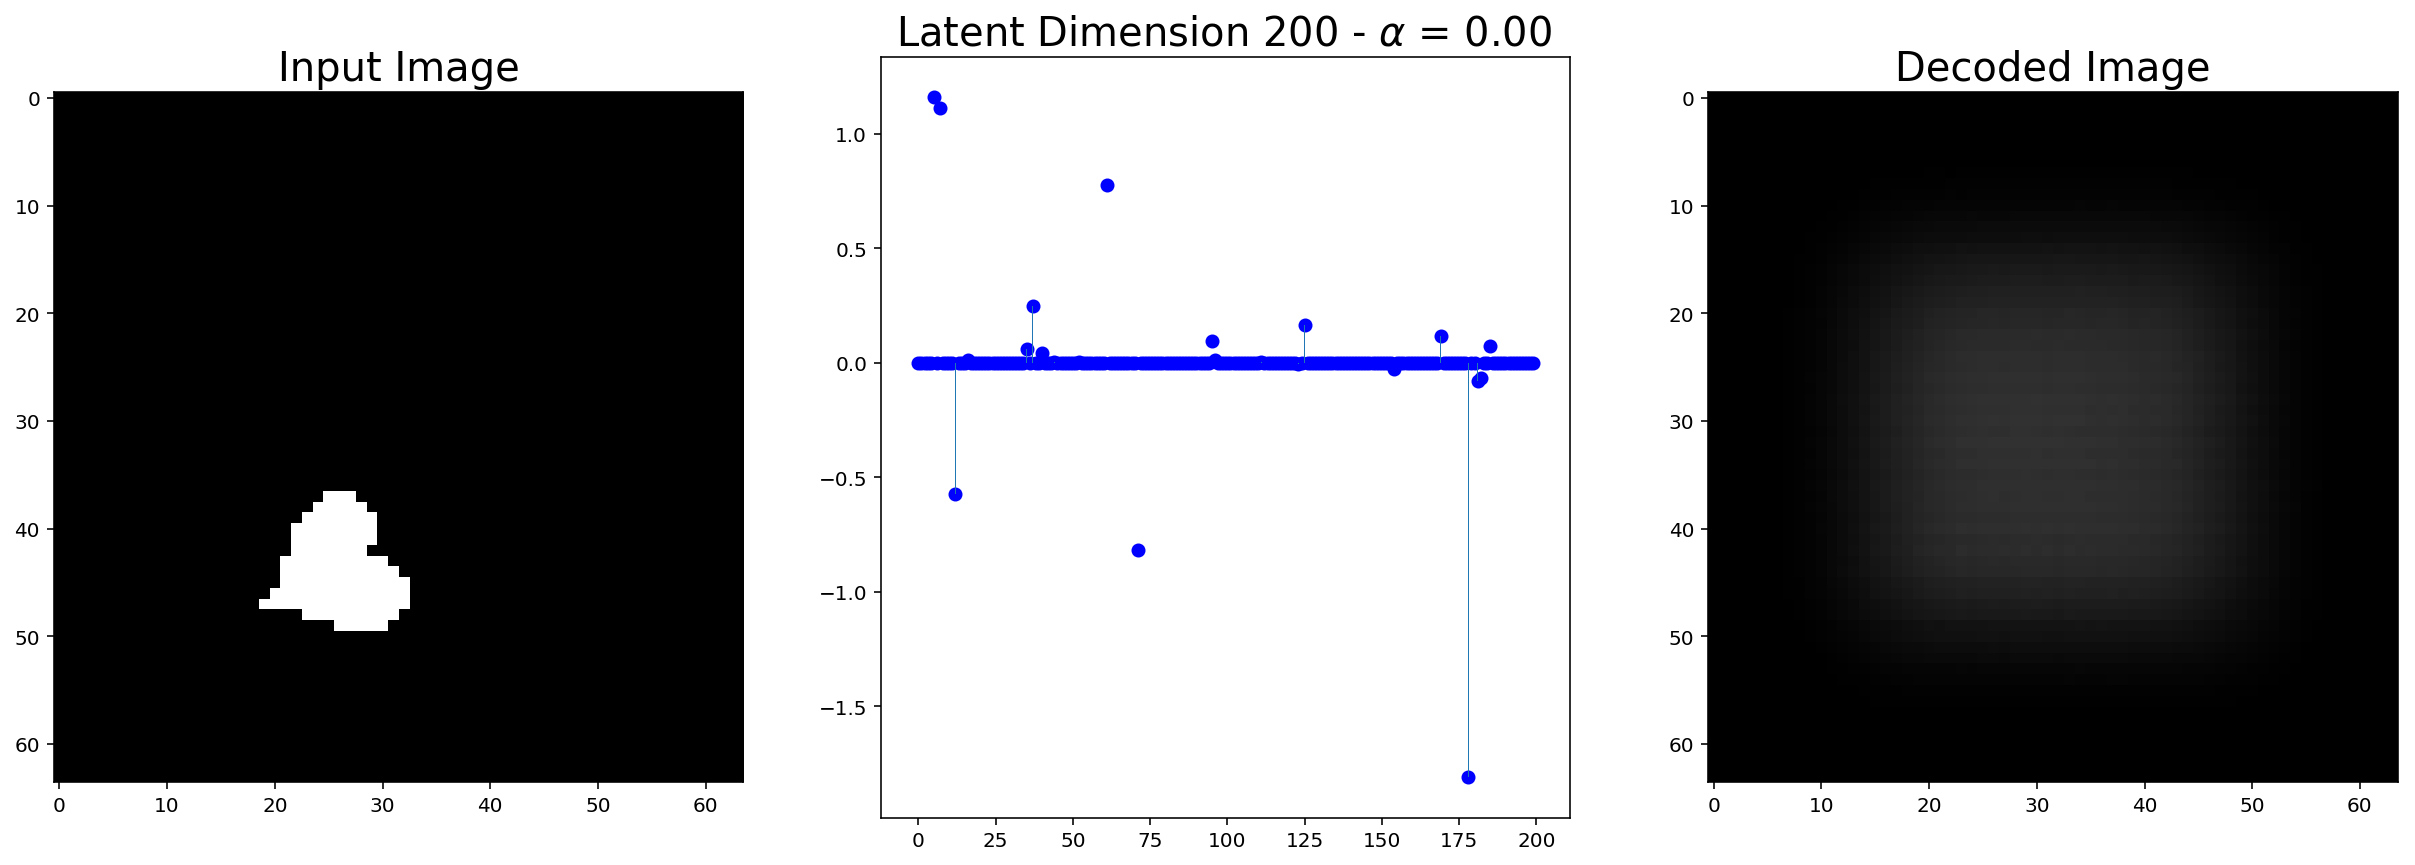

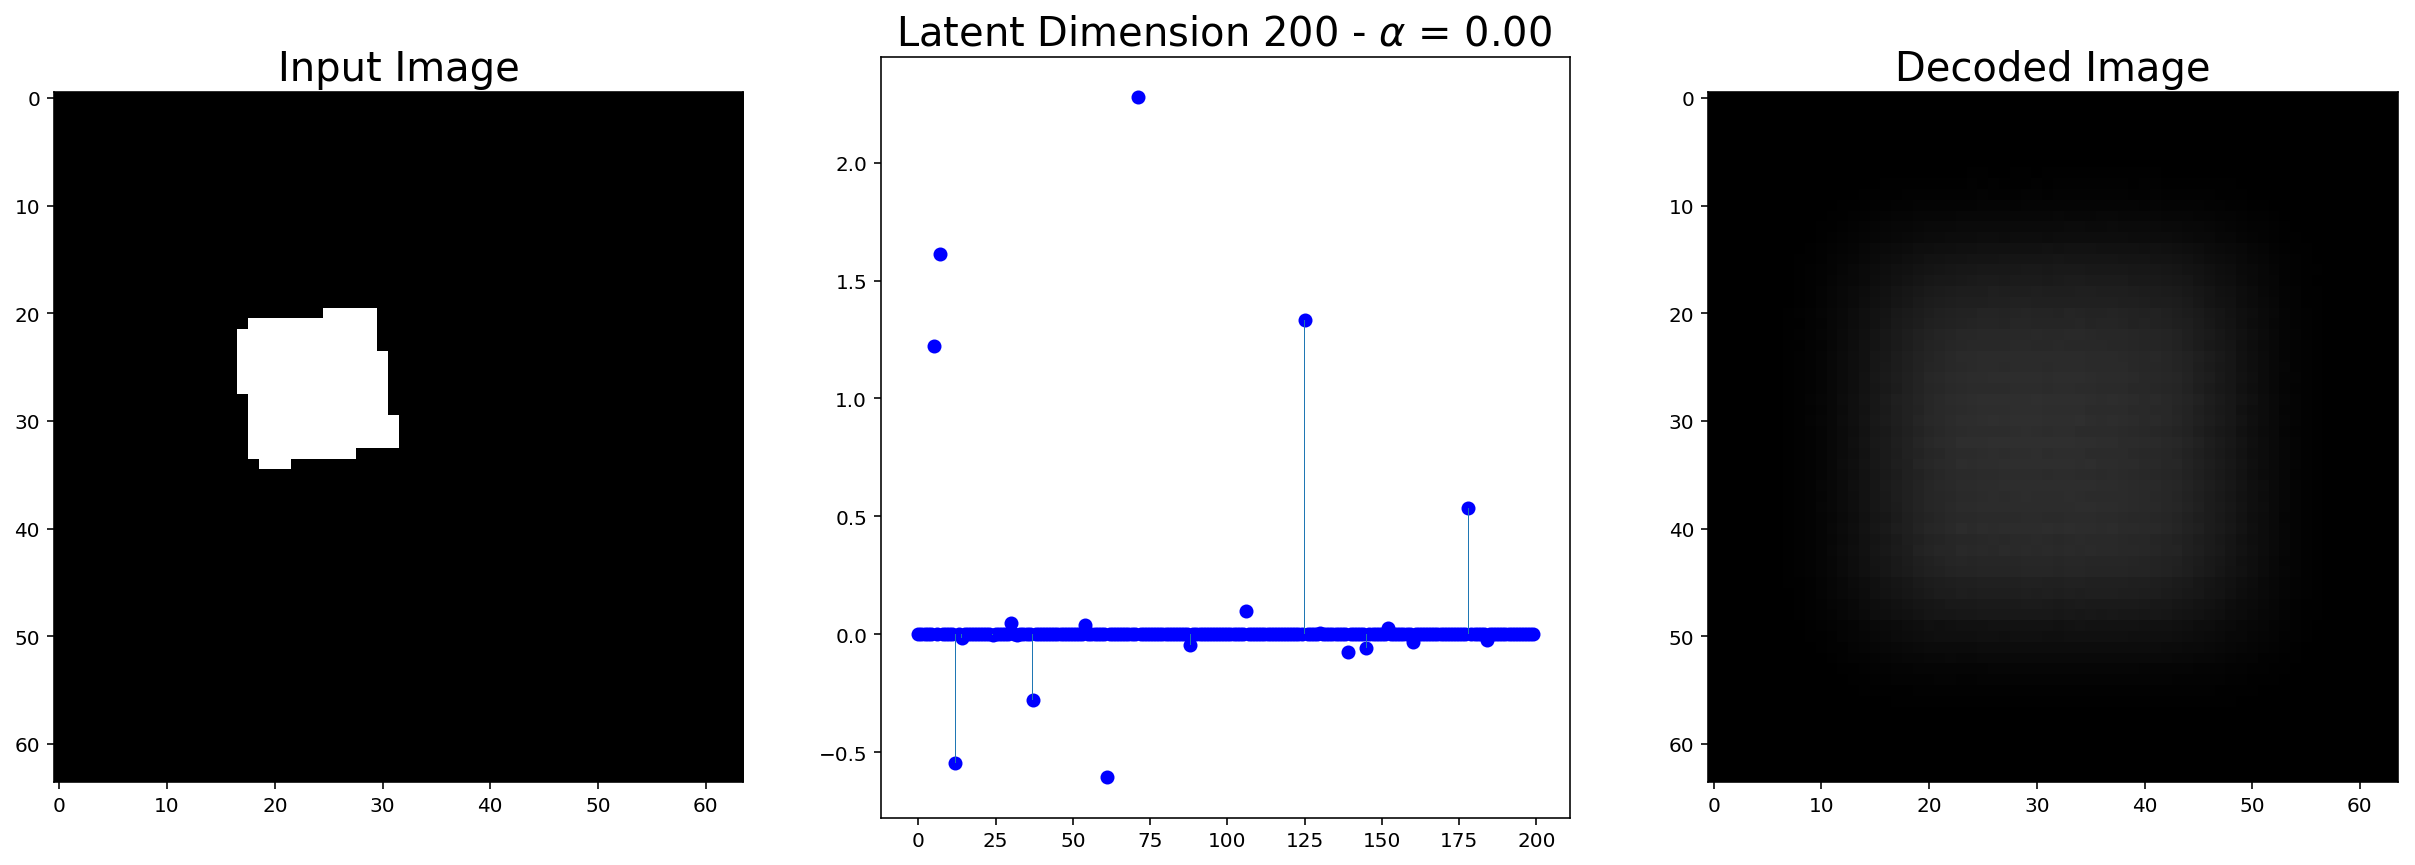

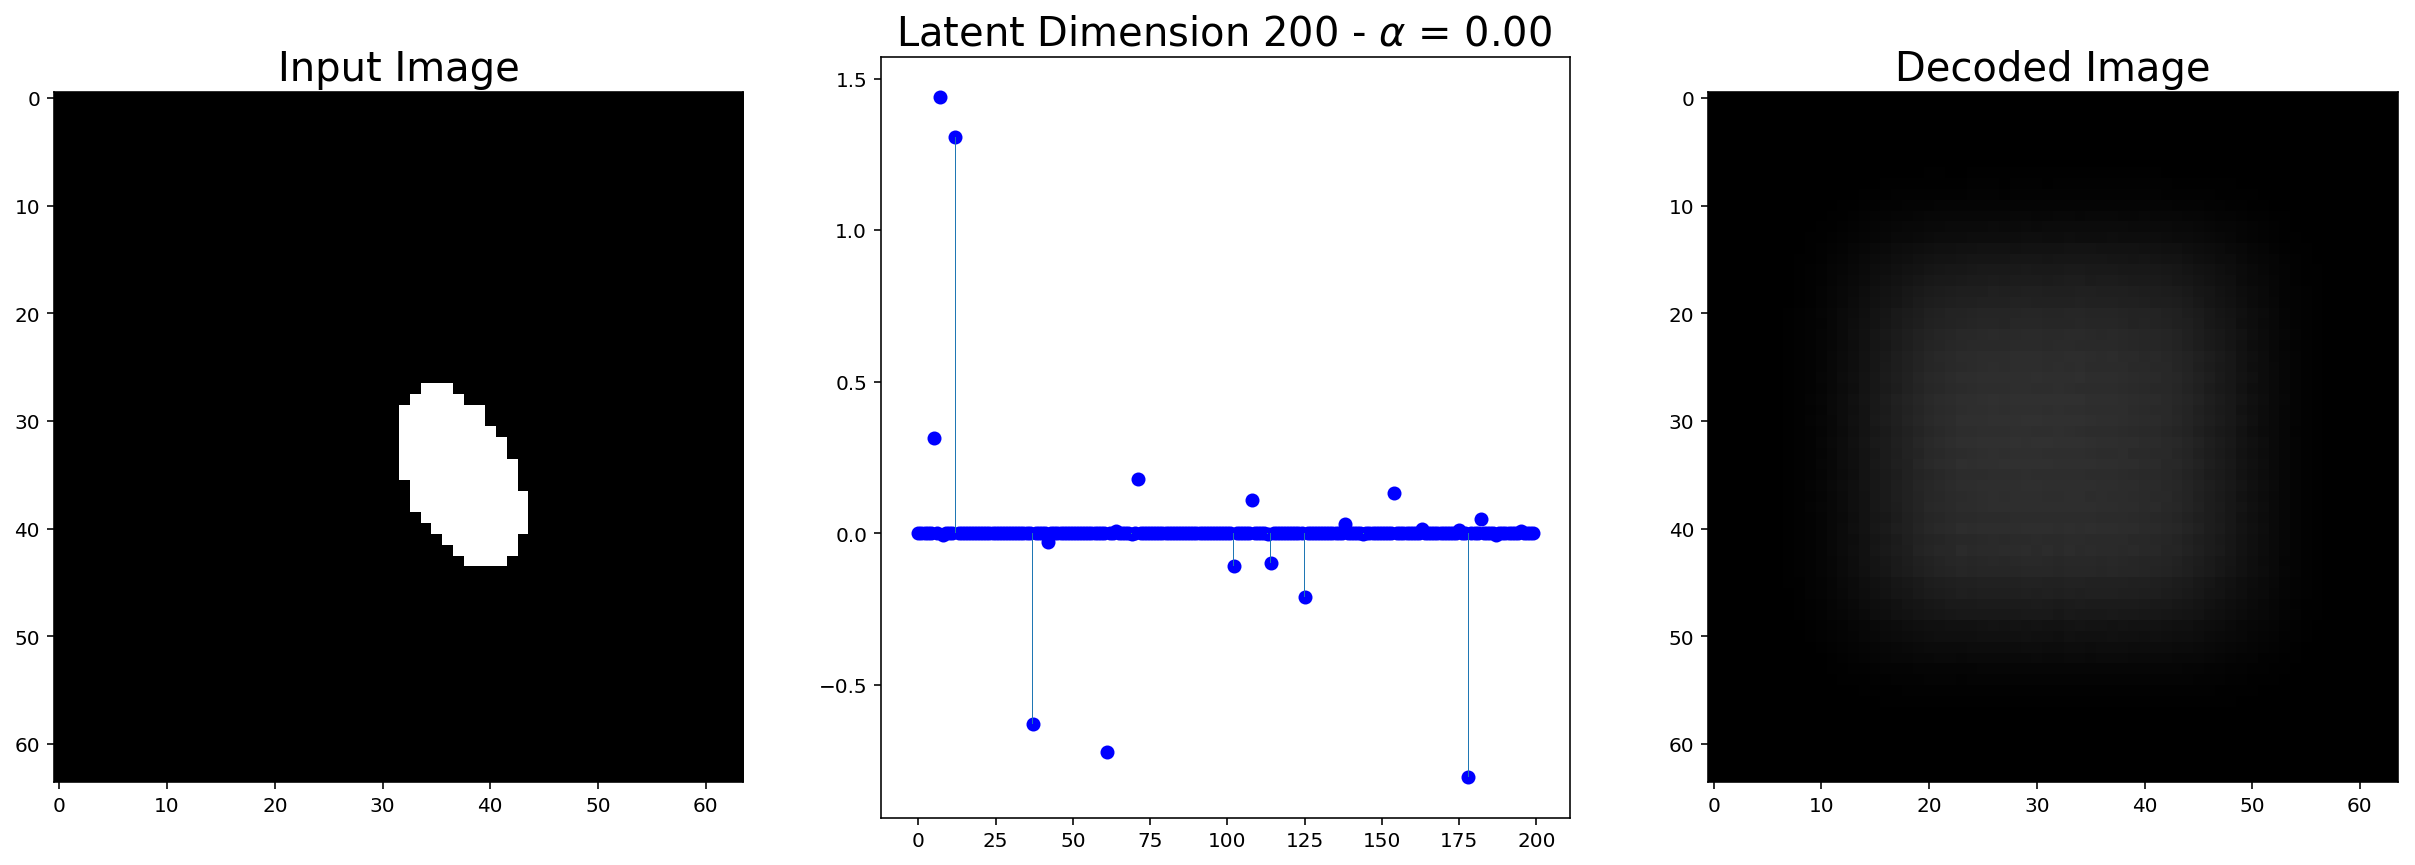

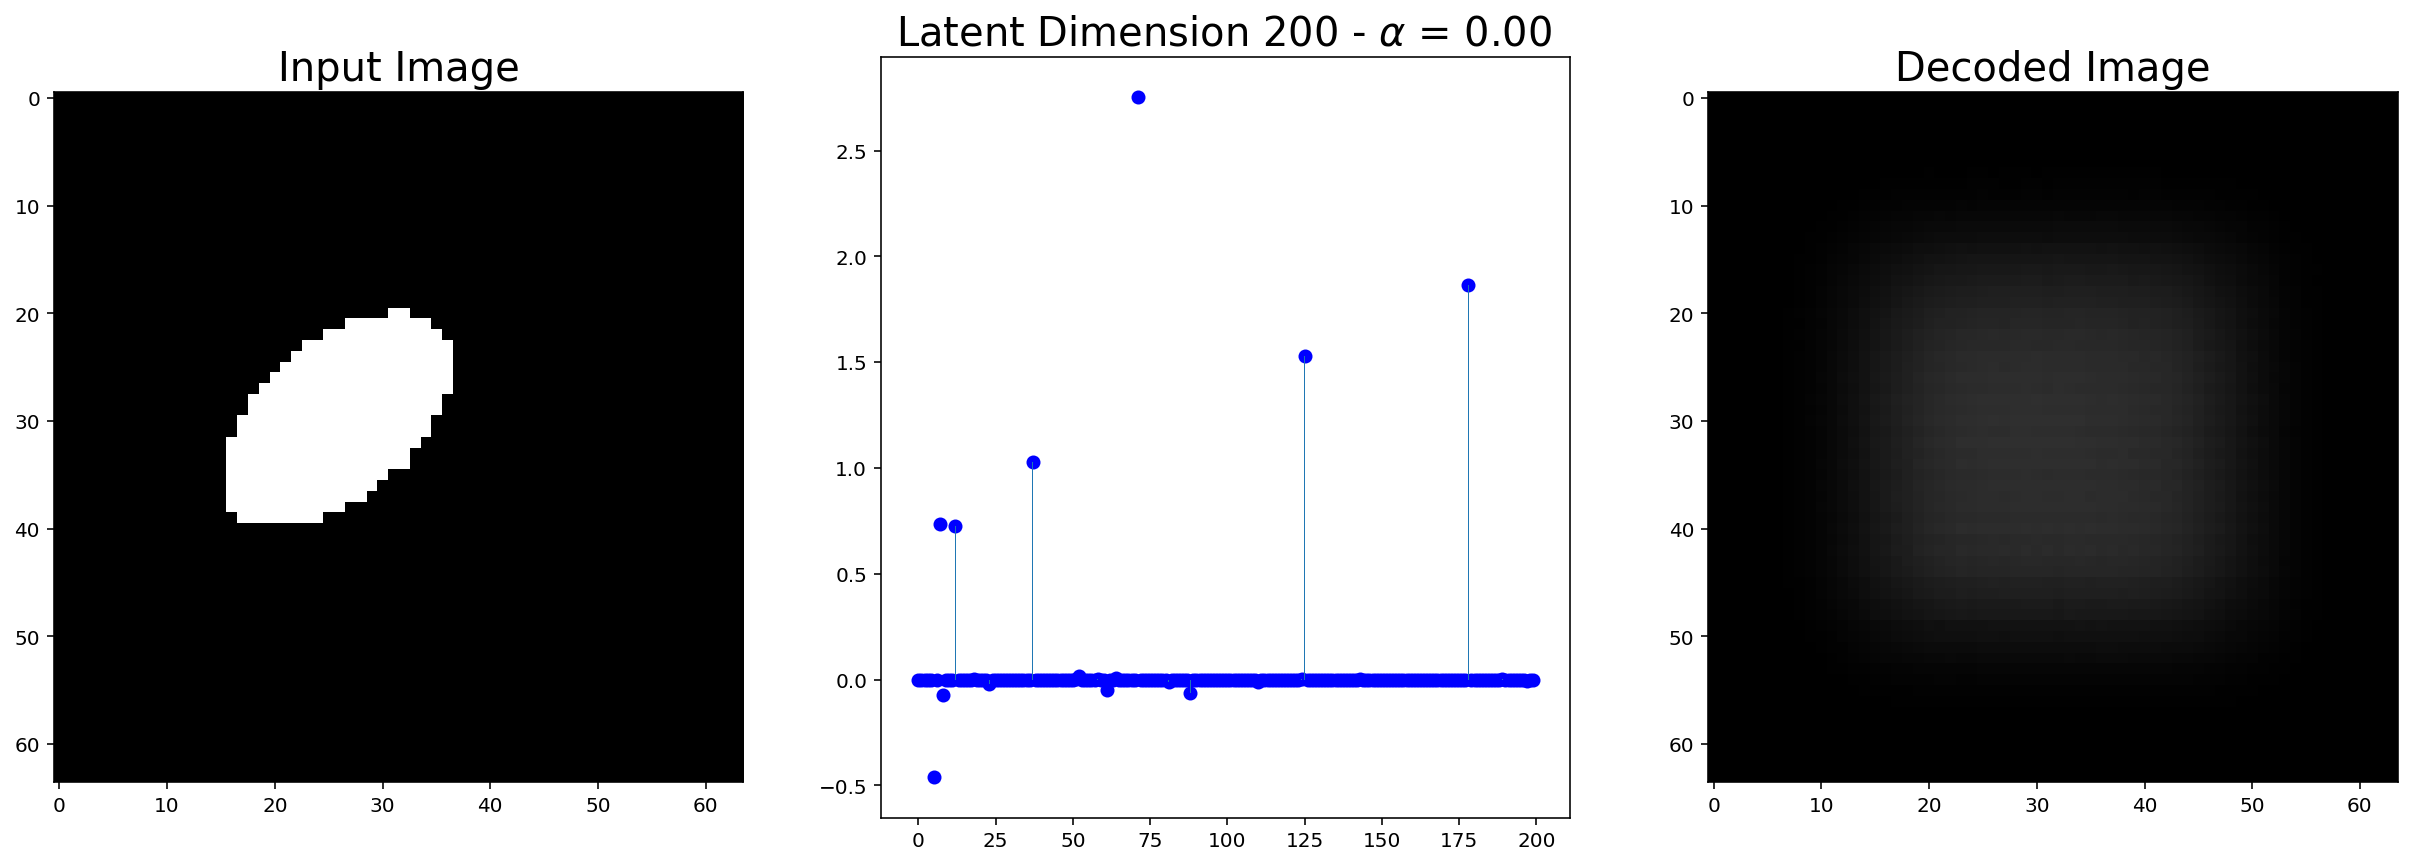

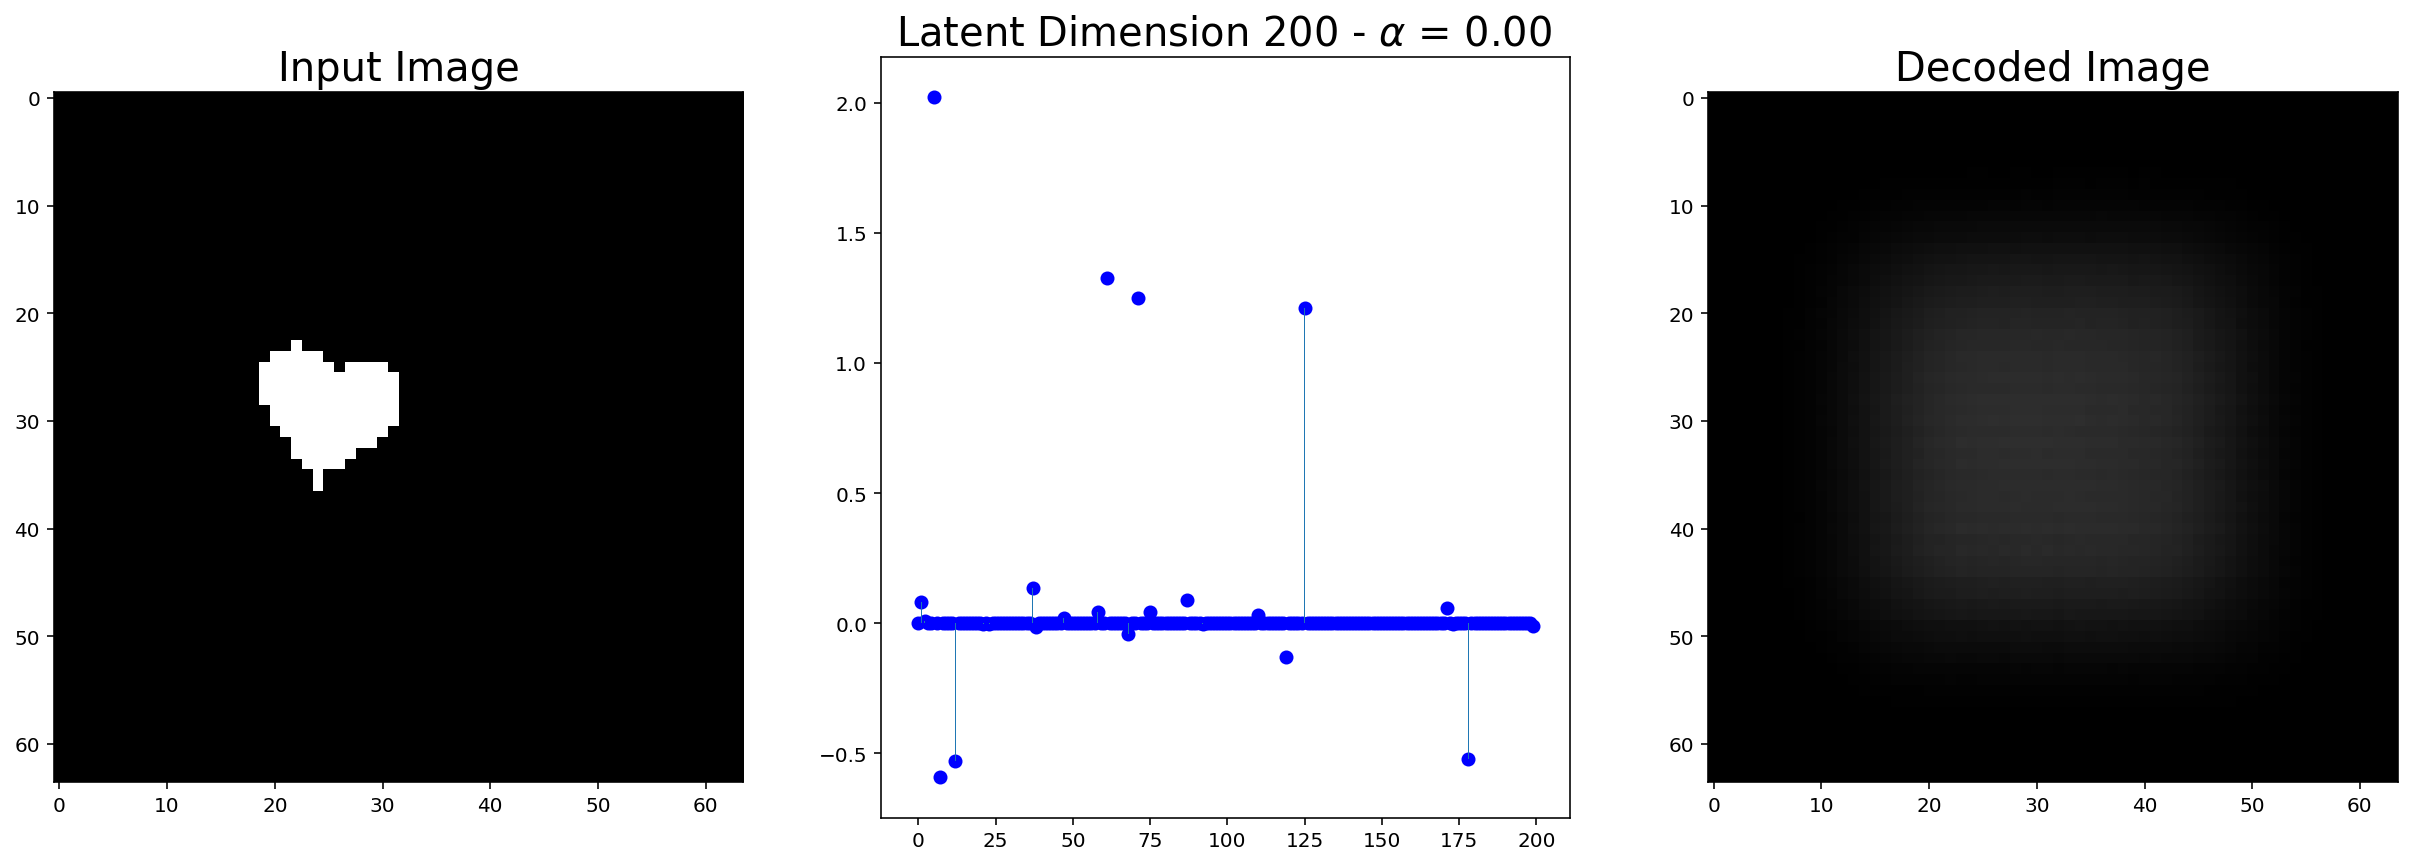

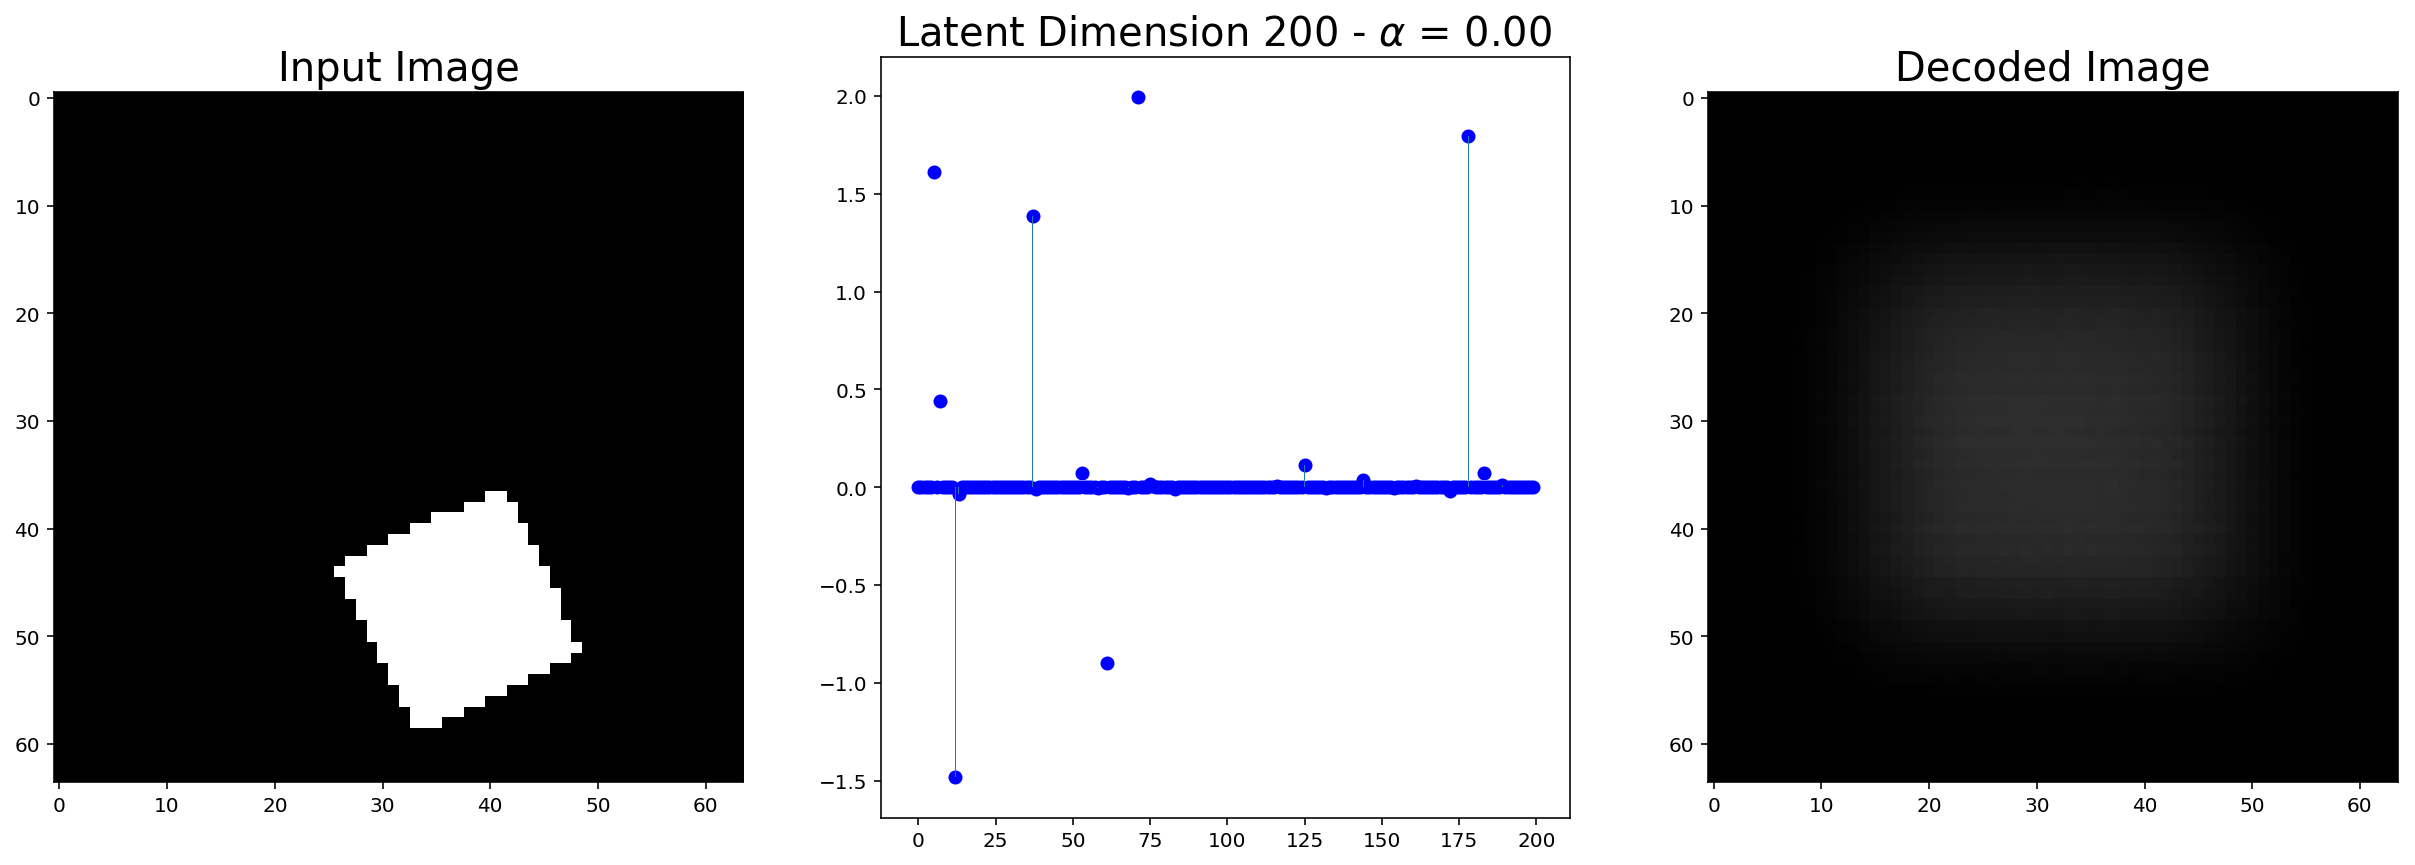

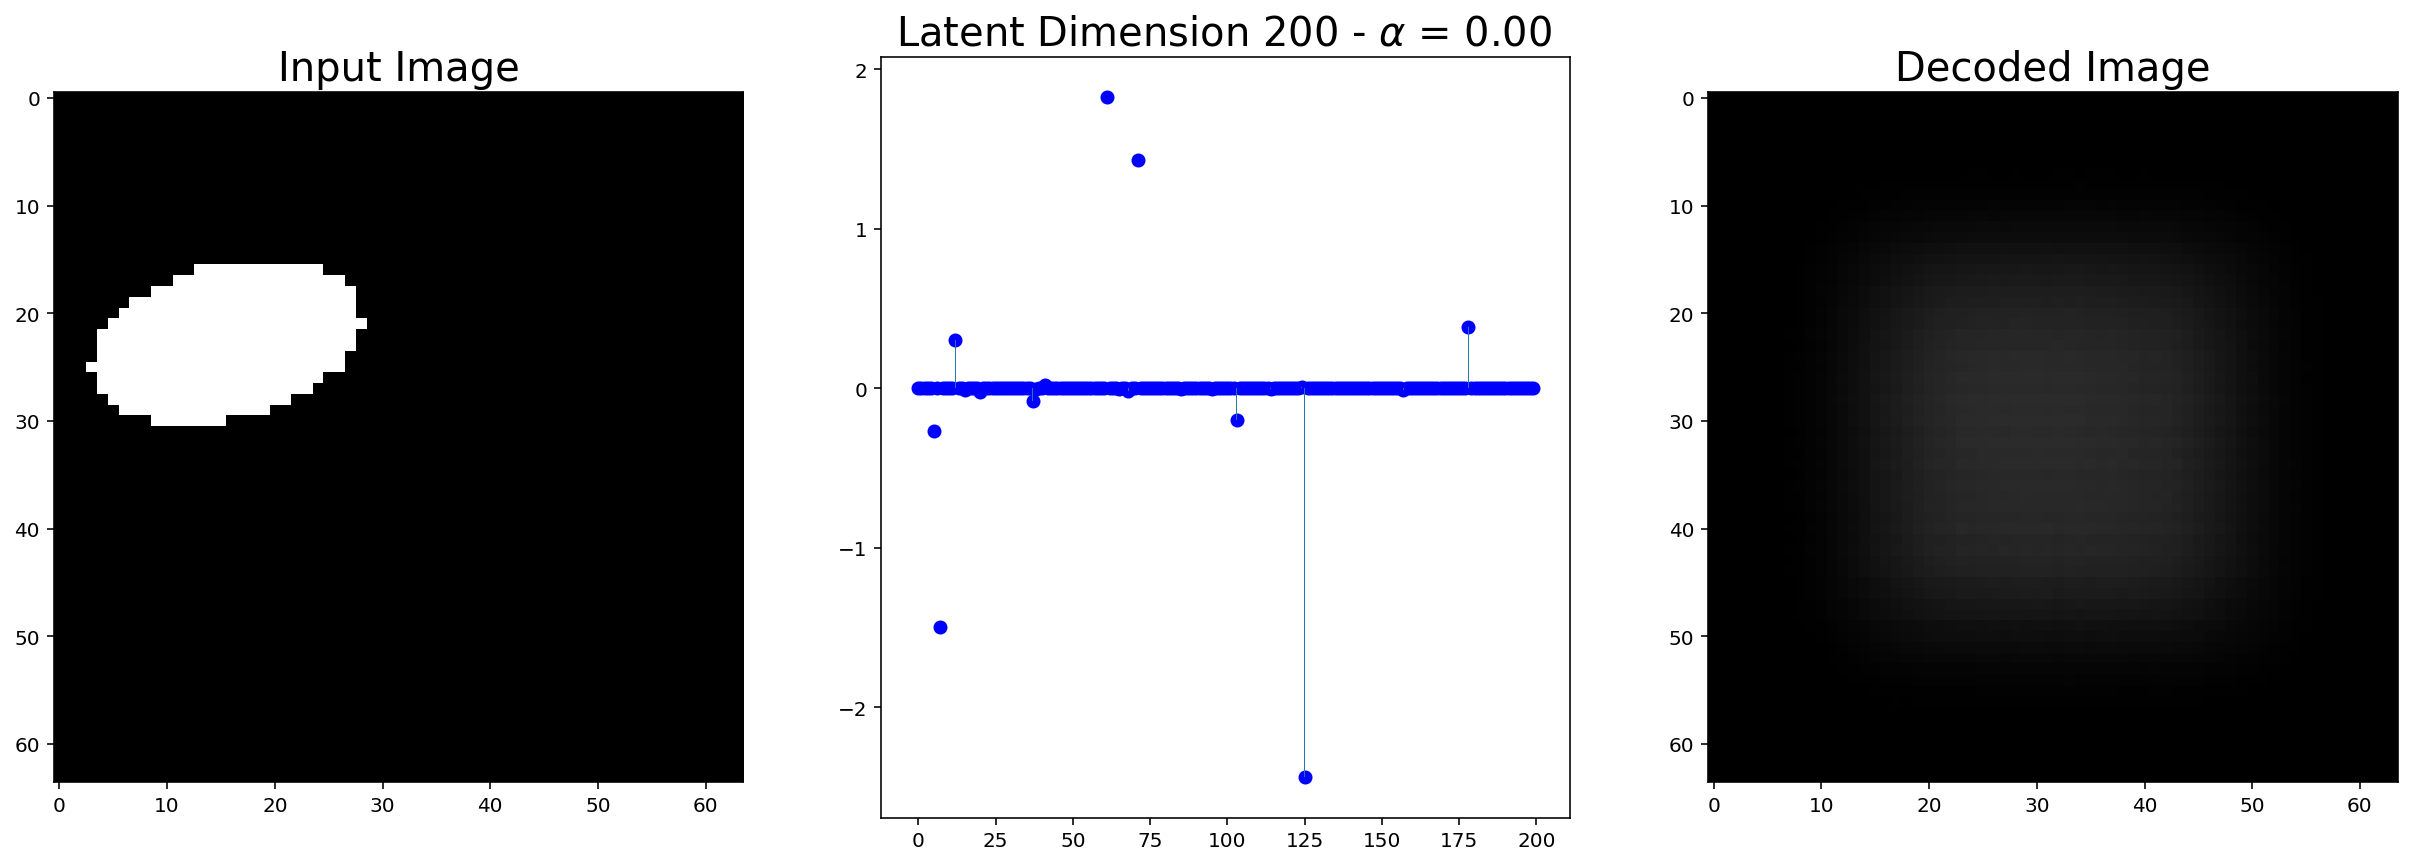

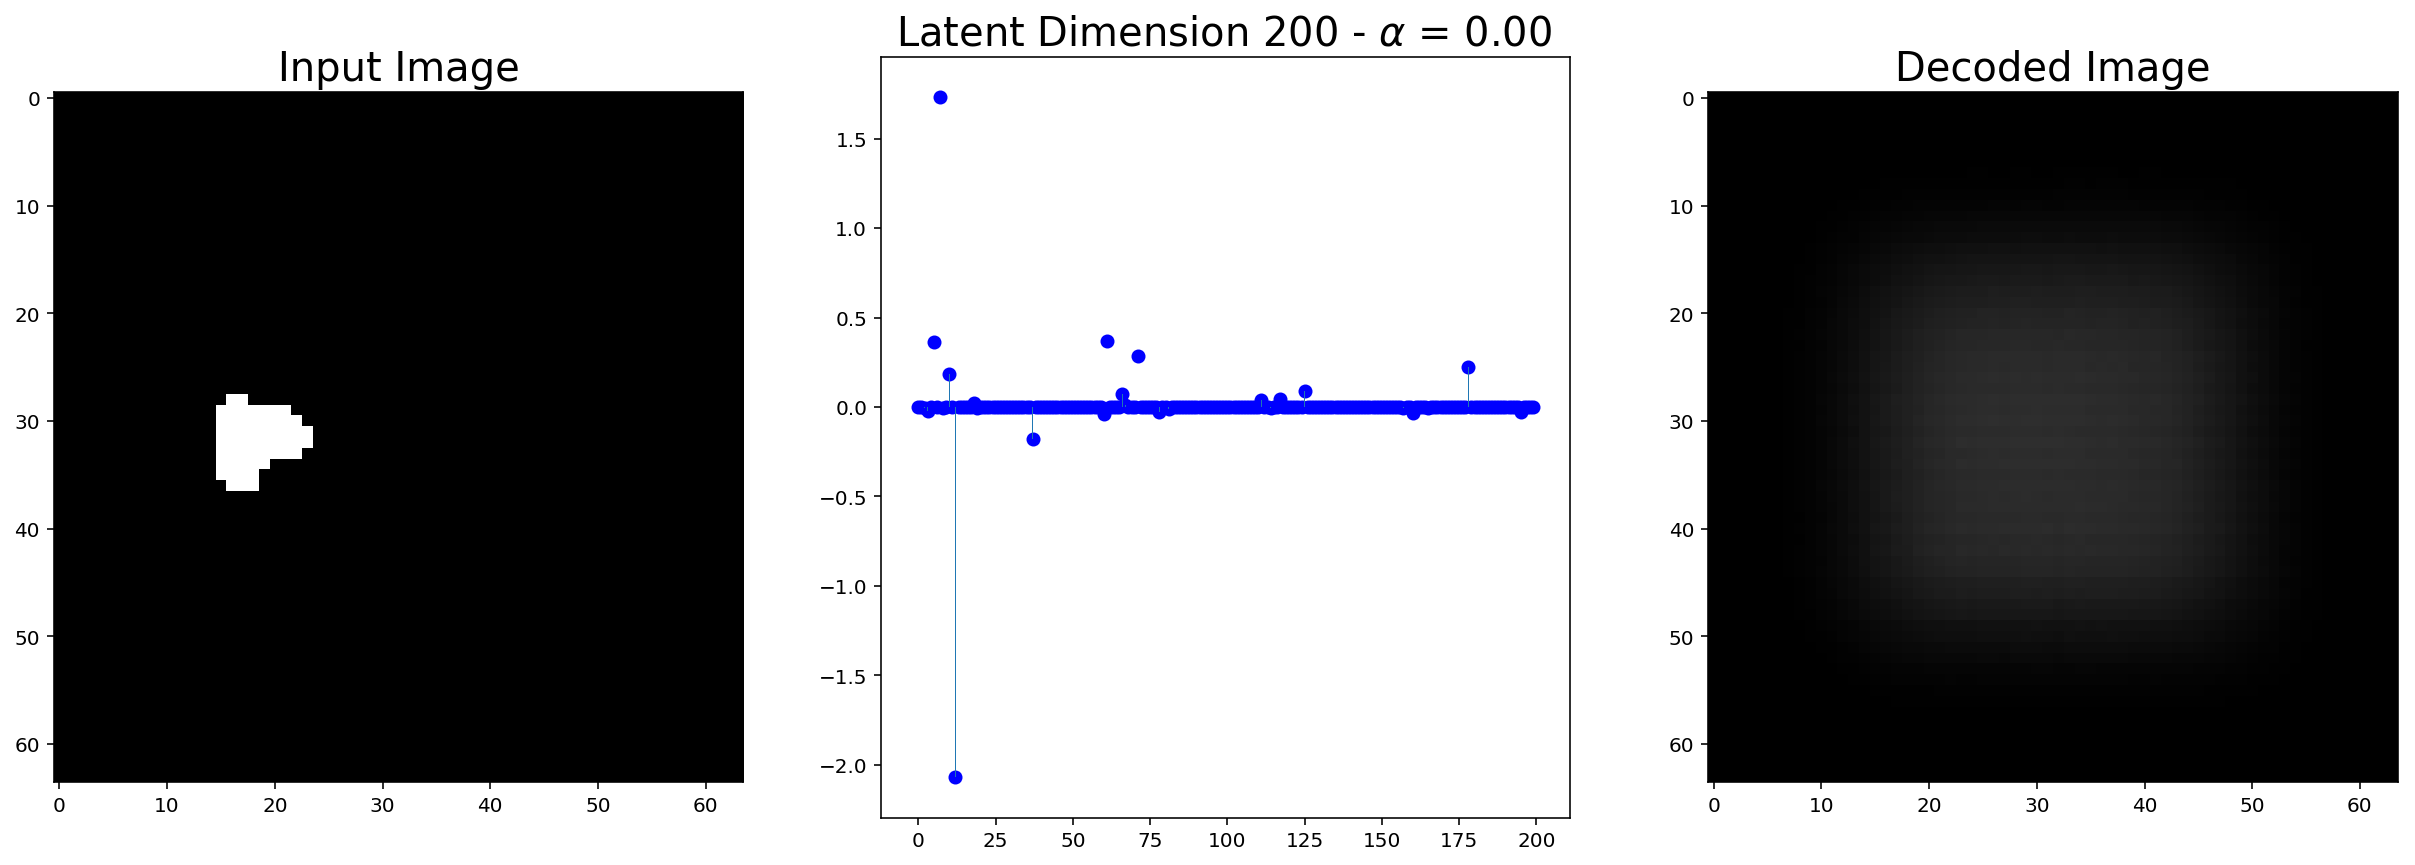

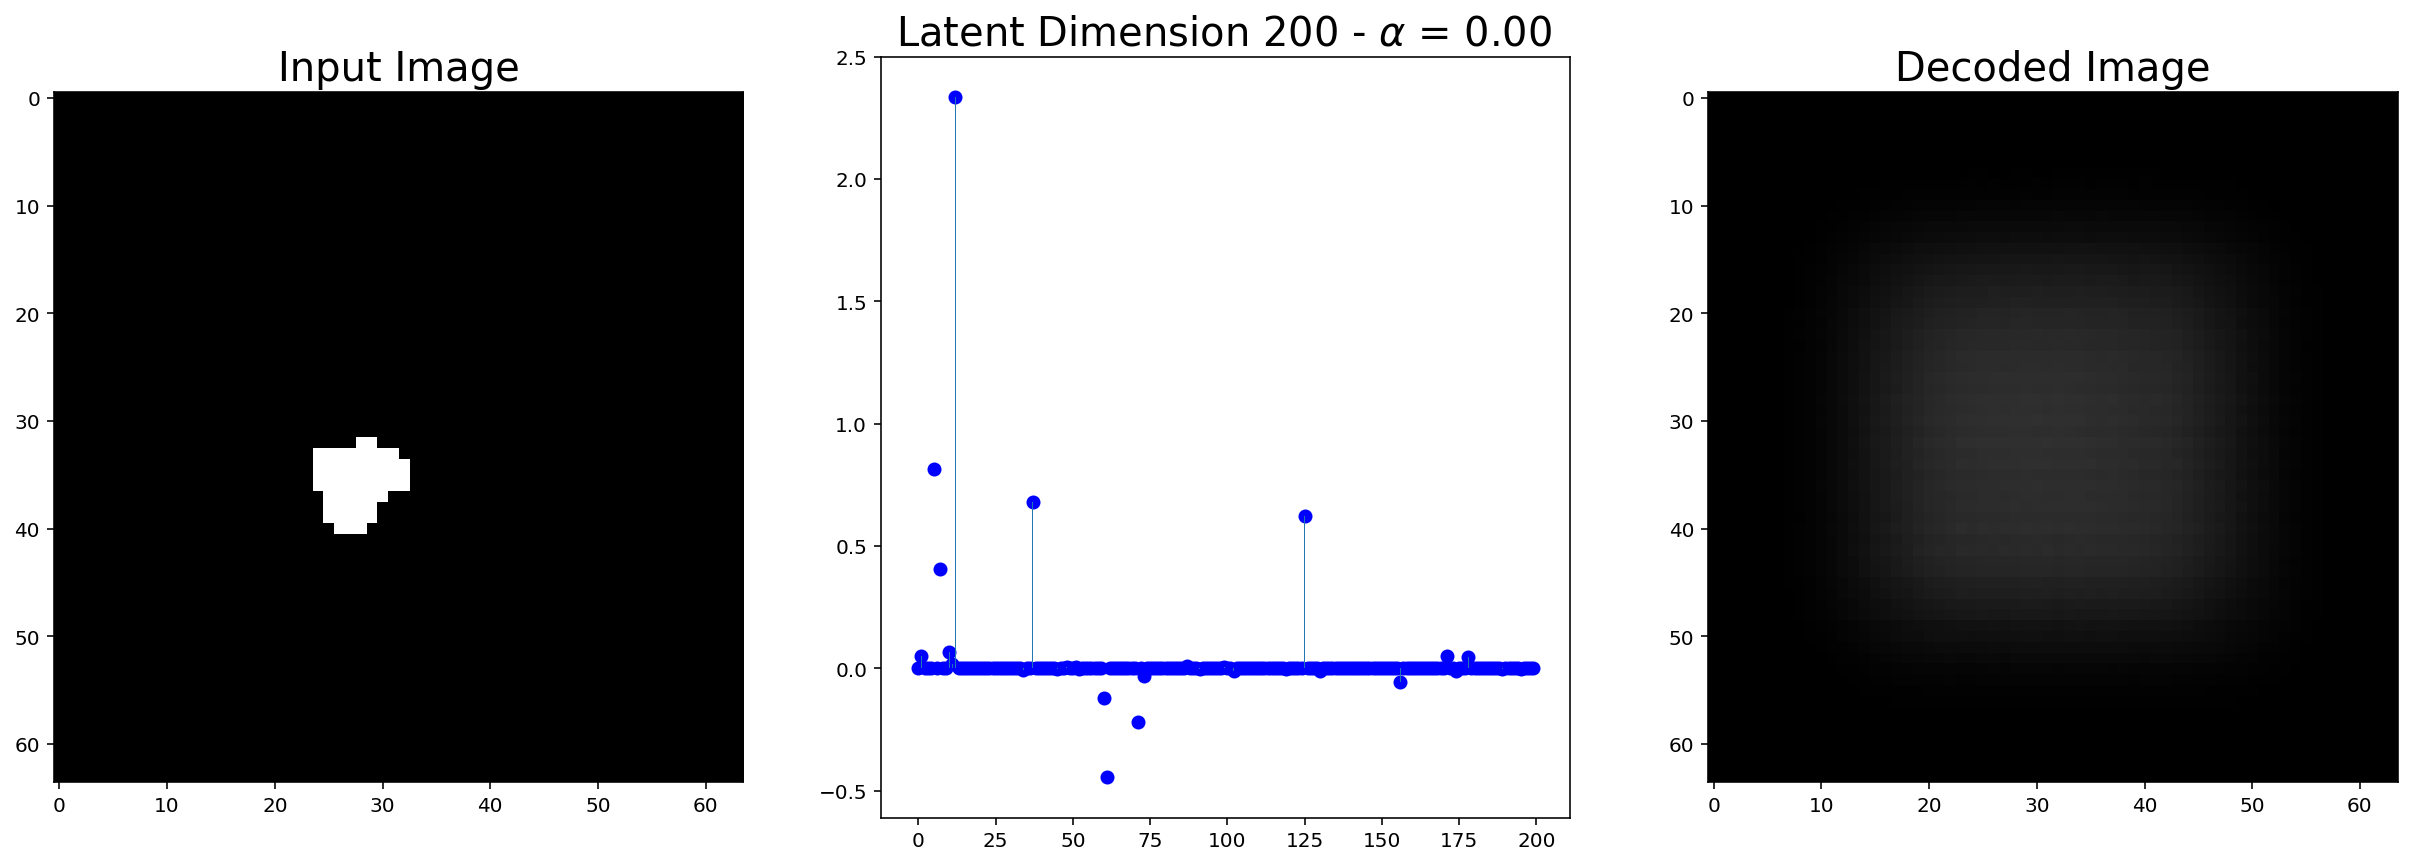

In [77]:
for i in range(15):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])